# Introduction

Ce projet a pour objectif de me faire évoluer d'un débutant en machine learning à un niveau avancé. La base de données utilisée dans ce projet va me suivre tout au long de cette aventure. Choisie sur Kaggle, elle possède une note de 10 en utilisabilité et plusieurs base de données. 

Le nom de cette base est **"Any Manufacturing Company"** et elle est composée de 6 dossiers csv tous très complets et avec beaucoup d'informations. Mon choix s'est donc porté sur cette base de donnée pour cette raison. D'une part par le fait qu'elle est extrêmement compléte mais aussi de par le nombre de données qu'elle possède. Permettant d'effectuer une ADE très poussée, mais aussi, de plus tard pouvoir tester énormement de modèles de machine learning, ou du moins de pouvoir avoir assez de profondeur pour faire des expériences.

Ce projet ne me fera en aucun évoluer sur l'aspect création de pipelines en ingénierie de données. Cependant c'est quelque chose que j'ai déjà prévu de travailler avec un autre projet qui aura lieu bien plus tard. Puisqu'il est bien connu, le domaine du Machine Learning est bien trop complèxe pour être compris et maîtrisé en 3 mois. Tout du moins, je veux devenir le meilleur possible avant Septembre 2025, soit la date de mon alternance. Ceci étant dit, commençons.

PS: le lien de la base de données: https://www.kaggle.com/datasets/bhanupratapbiswas/inventory-analysis-case-study/data?select=SalesFINAL12312016.csv

# Problématiques 
-	Problématique 1 : Comment pouvons-nous aider l'entreprise à améliorer le sourcing de ses fournisseurs ?
-	Problématique 2 : Quelle est la prévision de la demande pour les produits de l'entreprise ? 
-	Problématique 3 : Quelle est la quantité de stocks optimale pour l'entreprise ?
-	Problématique 4 : Commnent l'entreprise peut améliorer sa gestion du risque liée à ses fournisseurs et ses stocks ?

# Livre I: Analyse de Données Exploratoire (Exploratory Data Analysis (EDA))

Might look at pyskparksql
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName('name') \
    .getOrCreate()

query = """
query
"""

result = spark.sql(query)

In [1]:
# Importation des packages nécessaires
import pandas as pd # visualisation en spreadsheets de documents csv
import numpy as np # permet de transformer des base de données en arrays(tableaux)
import seaborn as sns # permet de créer de la visualisation de données
import matplotlib.pyplot as plt # permet de créer des graphiques très poussés

In [2]:
# Quelques manipulations de base
pd.set_option('display.max_columns', 200) # permet de visualiser toutes les données dans le tableur plutôt que d'avoir des "..." lorsqu'il y a trop de colonnes
plt.style.use('ggplot') # changement du style de pyplot. GGplot sera ma préférence sur ce projet

# Partie I: Analyse des fournisseurs

## Chapitre 1: Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

Cette section a pour but de comprendre la base de données. Dans ce cas précis nous nous concentrons que sur les prix d'achat de Décembre 2016. Le fichier csv contient 2017 dans le titre mais ceci indique que ce sont les prix pour 2017 émits en Décembre de l'année en cours. L'année en cours étant celle de 2016 puisque tous les autres fichiers csv montre des données de l'année 2016.

In [3]:
# Importation de la base de données. Son nom sera df (dataframe)
df = pd.read_csv('Data/2017PurchasePricesDec.csv')

In [4]:
# Visualisation de comment elle est construite (nombre de rangées, nombre de colonnes)
df.shape

(12261, 9)

In [5]:
# Visualisation des premières rangées de la base de données
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [6]:
# Visualisation des dernières rangées de la base de données
df.tail()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,750mL,750,2,24.32,10754,PERFECTA WINES


In [7]:
df.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

Nous pouvons observer qu'il existe le label brand qui est une numéro. La description qui indique les produits commandés. Le prix de vente. Leur taille et  volume respectif (qui représentent peut-être la même chose). Leur classification qui est dépendante du vendeur. Le prix d'achat, le nombre du vendeur et son nom.

Mes premières hypothèses sont:
* La colonne "Brand" est en fait l'unique ID de chauqe produit soit la primary key de cette base de données.
* La description est le ou les noms des produits que comprend l'unique ID. Ils peuvent être uniques ou plusieurs. Par exemple la première rangée comporte deux produits, "Gekkeikan Black" et "Gold sake". 
* La colonne size et volume représentent la même chose mais volume ne possède pas de symbole. Si c'est le cas, cela permettrait d'enlever une colonne.
* Le VendorNumber est l'uniqueID du vendeur, c'est peut être une foreign key. 

Concernant la deuxième hypothèse. Ceci était ma première impression, mais après avoir regardé le premier produit sur internet, nous observons que c'est en fait un seul produit. La description est don en effet le nom du produit correspondant à l'unique ID. Ceci valide donc la première hypothèse aussi.

La VendorNumber est bien une foreign key car c'est la primary key de la base de données "InvoicePurchases12312016".

In [8]:
# Les data types des données présentes dans la base
df.dtypes

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object

Les data types semblent normaux, sauf la colonne Volume qui est un string alors qu'elle devrait être une integer puisque c'est la taille sans le symbole. 

In [9]:
# Description rapide des données numériques rapides dans la base de données
df.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


Les seules colonnes assez intéressantes à regarder sont le prix d'achat et le prix de vente. Surtout la différence entre le prix d'achat et le prix de vente qui sert à estimer la marge moyenne qui ici est d'environ 12$.

## Chapitre 2: Préparation des donnnées

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [10]:
# Regarder la base de données à nouveau. Ceci aide à ne pas avoir à remonter en permanence pour avoir un apperçu de la base de données.
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [11]:
# Comparer les valeurs présentes dans size et volume
df['Size'].unique(), df['Volume'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
        '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
        '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
        '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk', nan,
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
        '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
        '650', '330', '18000', '180', '6000', '20', nan, '20000', '162.5',
        '400', '1100', '600', '1

Il est intéressant de noter que toues les colonnes qui ont just XmL ont tleur équivalent dans la colonnes Volume. Néanmoins, toutes celles qui possède l'appélation X Pk, ne semblent pas avoir d'équivalents.

In [12]:
# Regarder si du coup il y a des valeurs NA dans la colonne volume.
df.isna().sum() 

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

La commande au-dessus regarde s'il y a des valeurs nulles puis elles les cumules par colonnes.

Alors il y en a qu'une donc cela veut dire que ces valeurs x Pk ont un équivalent. D'ailleurs regardant à quoi correspond la colonne où il y a des valeurs nulles

In [13]:
# Colonne où il y a des valeur NA
df[df['Description'].isna()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


On observe que le produit n'a pas de description (nom), que son prix de vente est à 0 et que sa taille et son volume sont NA. Existe-t-il d'autre produits du même vendeur avec le même prix d'achat ? Dans cette base de données ou une autre ?

In [14]:
# Regarder s'il existe d'autres du même vendeur
df[df['VendorNumber'] == 480] # Cette commande fonctionne comme une clause where su SQL, elles renvoient les colonnes qui ont une valeur de 480

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
8,126,Grey Goose Vodka,32.99,1000mL,1000,1,20.14,480,BACARDI USA INC
39,443,St Germain Liqueur,33.99,750mL,750,1,24.45,480,BACARDI USA INC
45,508,Bacardi Superior Rum,12.99,1000mL,1000,1,9.77,480,BACARDI USA INC
68,743,Angels Envy Whiskey,45.99,750mL,750,1,36.50,480,BACARDI USA INC
76,802,Bacardi Torched Cherry Rum,11.99,750mL,750,1,7.99,480,BACARDI USA INC
...,...,...,...,...,...,...,...,...,...
10861,4024,Bacardi Razz,0.99,50mL,50,1,0.71,480,BACARDI USA INC
10863,4192,Havana Club Anejo Blanco Rum,19.99,750mL,750,1,15.03,480,BACARDI USA INC
10864,4216,Havana Club Anejo Clsco Gold,21.99,750mL,750,1,16.92,480,BACARDI USA INC
10866,4237,Havana Club Anejo Blanco Rum,0.99,50mL,50,1,0.76,480,BACARDI USA INC


In [15]:
# Regarde s'il existe d'autres produits du même vendeur et avec le même prix
random = df[df['VendorNumber'] == 480] 
random = random[random['PurchasePrice'] == 11.19]
random

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.00,NaN,NaN,1,11.19,480,BACARDI USA INC
10418,4092,Bacardi Grapefruit Rum,13.99,750mL,750,1,11.19,480,BACARDI USA INC


In [16]:
# Changer le produit 4202 et lui donner les caractéristiques du produit 4092. 
# Mais lui donner le nom missing afin de garder le fait que c'était une rangée où il y avait des valeurs NA.

df.loc[df['Brand'] == 4202, 'Description'] = 'Product Name Missing'
df.loc[df['Brand'] == 4202, 'Price'] = 13.99
df.loc[df['Brand'] == 4202, 'Size'] = '750mL'
df.loc[df['Brand'] == 4202, 'Volume'] = '750'
df.loc[df['Brand'] == 4202]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,Product Name Missing,13.99,750mL,750,1,11.19,480,BACARDI USA INC


In [17]:
# Vérification que cela s'est bien appliqué
random = df[df['VendorNumber'] == 480] 
random = random[random['PurchasePrice'] == 11.19]
random

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,Product Name Missing,13.99,750mL,750,1,11.19,480,BACARDI USA INC
10418,4092,Bacardi Grapefruit Rum,13.99,750mL,750,1,11.19,480,BACARDI USA INC


Maintenant que nous avons corrigé les valeurs NA, il faut revenir au problème initial qui était de savoir à quoi correspondent les valeurs x Pk

In [18]:
# Reprennons d'abord notre comparaison entre les deux colonnes
df['Size'].unique(), df['Volume'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', 'Unknown', '750mL 2 Pk', '250mL 4 Pk', '1500mL',
        '3000mL', '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL',
        '500mL', '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL',
        '250mL', '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', 'Unknown',
        '250', '1500', '3000', '5000', '4000', '187', '150', '500', '720',
        '650', '330', '18000', '180', '6000', '20', '20000', '162.5',
        '400', '1100', '600', '19500', '56

In [19]:
# Regardons d'abord les packs 4 Pk
df.loc[df['Size'] == '100mL 4 Pk'] # Localise les rangées ou la veleur de size est égale à "100mL 4 Pk"

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
113,1133,Glenmorangie Collection 4 Pk,31.99,100mL 4 Pk,100,1,23.01,8112,MOET HENNESSY USA INC
1717,8513,Baileys Irish Cream Mini's 4,10.99,100mL 4 Pk,100,1,6.56,3960,DIAGEO NORTH AMERICA INC


En fait la colonne size donne plutôt la quantité puisque lorsqu'il y a marqué 4 PK cela veut dire que c'est un carton contennant 4 bouteilles de 100ml. Donc la colonnes Volume est en fait le volume d'un produit présent dans le carton. Le carton peut soit contenir un produit unique dans ce cas là le volume et la taille sont égales. Ou alors il peut contenir plusieurs produits et dans ce cas le volume et la taille ne sont pas égaux.

Il faudrait donc transformer la colonnes Size en quantités et remplacer les valeures ml juste par des chiffres tel que 1 pour celle où il n'y a pas de x Pk signifiant qu'il n'y a qu'une seule bouteille. Et les autres par la valeur de x.
Ensuite il faudrait laisser la colonnes volume en tant que telle mais la renommer Volume unitaire.
Et crééer une valeur volume carton qui prendrait les valeur Size * Volume afin d'avoir le volume total du carton.

In [20]:
# Renommer les colonnes Volume et Quantity. Profiter pour renommer les autres colonnes aussi. 
# La commande rename prend l'argument 'columns' auquel il faut donner un dictionnaire avec l'ancien nom pour les keys et les nouveaux noms pour les values
df = df.rename(columns = {'Brand' : 'Product_ID',
                      'Size' : 'Quantity',
                      'Description' : 'Product_Name',
                      'Price' : 'Selling_Price',
                      'Volume' : 'Volume_Per_Unit',
                      'PurchasePrice' : 'Purchasing_Price',
                      'VendorNumber' : 'Vendor_ID',
                      'VendorName' : 'Vendor_Name'}).copy()
df.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [21]:
# Regarder les valeures présentes dans quantity et volume per unit
df['Quantity'].value_counts(), df['Volume_Per_Unit'].value_counts()

(Quantity
 750mL          9824
 1500mL          486
 1750mL          433
 1000mL          427
 375mL           318
 50mL            276
 3000mL          104
 187mL            52
 500mL            51
 187mL 4 Pk       48
 5000mL           44
 200mL            26
 300mL            24
 4000mL           16
 720mL            11
 1500ml           11
 100mL             8
 50mL 4 Pk         6
 750mL 2 Pk        6
 250mL 4 Pk        6
 180mL             5
 20000mL           5
 330mL             5
 50mL 3 Pk         5
 Unknown           4
 200mL 3 Pk        4
 187mL 3 Pk        4
 6000mL            4
 50mL 5 Pk         4
 375mL 2 Pk        3
 200mL 4 Pk        3
 250mL             3
 18000mL           3
 750mL 3 Pk        3
 100mL 4 Pk        2
 560mL             2
 600mL             2
 375mL 3 Pk        2
 150mL             2
 750mL + 3/        2
 750mL 6 Pk        2
 20mL 5 Pk         1
 1100ml            1
 650mL             1
 750mL  3          1
 3750mL            1
 19500mL           1
 75

On observe qu'il y a des valeurs unknown. Puisque nous ne possèdons pas les produits en physique, nous ne pouvons vérifier dans nos stocks, il faut trouver une autre solution. Ici ce sera peut-être d'y mettre la valeur mean après avoir formatté les deux colonnes.

In [22]:
# Regarder les valeurs unknown afin de regarder ce qu'il peut être fait
df[df['Quantity'] == 'Unknown']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


D'abord nous allons essayer de voir s'il n'existe pas des produits similaires afin de peut être trouver une solution en leur donnant les même valeurs

In [23]:
# Trouver les produits similaires au produit Angostura Bitters
df[df['Selling_Price'] == 7.49]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
760,3636,Dr McGillicuddy's Mentholmnt,7.49,375mL,375,1,5.03,8004,SAZERAC CO INC
1557,7978,M & R X Dry Vermouth,7.49,750mL,750,1,3.95,480,BACARDI USA INC
1558,7982,M & R Sweet Vermouth,7.49,750mL,750,1,3.95,480,BACARDI USA INC
2419,19507,Geyser Peak Svgn Bl,7.49,750mL,750,2,4.99,2000,SOUTHERN WINE & SPIRITS NE
2594,21691,Tracia Syrah,7.49,750mL,750,2,5.17,9165,ULTRA BEVERAGE COMPANY LLP
3136,39413,Mirassou Pnt Nr Cntrl Coast,7.49,750mL,750,2,5.06,3252,E & J GALLO WINERY
4645,21715,Gia Pnt Grigio,7.49,750mL,750,2,5.06,2000,SOUTHERN WINE & SPIRITS NE
4889,21533,10 Span Pnt Nr CC,7.49,750mL,750,2,5.13,9815,WINE GROUP INC
5090,17913,Thorny Rose Chard,7.49,750mL,750,2,5.03,1392,CONSTELLATION BRANDS INC


Nous observons que les produits avec le même prix de vente n'ont pas forcémment les mêmes caractéristiques communes. Regardons donc avec le prix d'achat.

In [24]:
# Regarder pour les prix d'achat
df[df['Purchasing_Price'] == 5.39]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


Rien ne sort. Nous allons donc regarder les autres produits du même vendeur

In [25]:
# Produits du même vendeur
df[df['Vendor_ID'] == 5895]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


C'est le seul produit malheuresement, donc pour celui-ci il faudra changer les valeurs Unknown avec le mean des produits dans le même catégorie de prix d'achat. Puisque c'est la seule fois où nous avons des produits qui sont sortis.

In [26]:
# Rappellons nous d'abord les produits unknown afin de tester sur le deuxième
df[df['Quantity'] == 'Unknown']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [27]:
# Regardons les produits du même vendeur pour les deuxième produit
df[df['Vendor_ID'] == 4425]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
15,211,Cold River Gin,24.99,750mL,750,1,19.83,4425,MARTIGNETTI COMPANIES
38,438,Licor 43 Vanilla Liqueur,19.99,750mL,750,1,12.77,4425,MARTIGNETTI COMPANIES
40,450,Vincent Van Gogh Double Esp,24.99,750mL,750,1,19.52,4425,MARTIGNETTI COMPANIES
143,1296,Tap 357 Maple Rye Whisky,26.99,750mL,750,1,20.60,4425,MARTIGNETTI COMPANIES
248,1997,Charles Goodnight Bourbon,42.99,750mL,750,1,30.93,4425,MARTIGNETTI COMPANIES
...,...,...,...,...,...,...,...,...,...
12238,28006,Priest Ranch Coach Gun Red,69.99,750mL,750,2,48.27,4425,MARTIGNETTI COMPANIES
12239,28007,Priest Ranch Sauvignon Blanc,18.99,750mL,750,2,12.41,4425,MARTIGNETTI COMPANIES
12240,28029,DLD Syrah -Les Gosses,29.99,750mL,750,2,20.54,4425,MARTIGNETTI COMPANIES
12253,42897,Twomey Merlot Napa,58.99,750mL,750,2,39.33,4425,MARTIGNETTI COMPANIES


Il y en a trop et à des prix trop. Cependant nous remarquons que dans le résumé ils ont tous la même quantité et le même volume par unité.
Regardons donc s'il n'existe bien que des 750mL.

In [28]:
# Value counts afin de savoir quelles sont les types de quantités proposées par le vendeur Martignetti companies
calcul = df[df['Vendor_ID'] == 4425] # Création d'une variable afin de pouvoir opérer value_counts dessus puisque cela ne marche pas directement sur cette commande
calcul['Quantity'].value_counts() # Value_counts()

Quantity
750mL         1518
1500mL          63
375mL           21
187mL            6
500mL            5
50mL             4
1000mL           4
200mL            4
3000mL           3
1750mL           2
Unknown          2
20mL 5 Pk        1
560mL            1
19500mL          1
720mL            1
250mL            1
187mL 4 Pk       1
1500ml           1
Name: count, dtype: int64

Nous observons que la plupart des produits proposés par ce vendeur font parti de la catégorie 750mL. Il serait donc judicieux de remplacer les valeurs Unknown par 750mL pour quantity et 750 pour volume_per_unit. Cependant vérifions tout de même les produits avec le même prix de vente et d'achat juste pour en être sûrs.

In [29]:
# Produit avec le même prix de vente
df[df['Selling_Price'] == 21.01]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES


In [30]:
# Produit avec le même prix d'achat
df[df['Purchasing_Price'] == 16.15]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
103,966,Patron Citronge Orange Liqu,20.99,750mL,750,1,16.15,9165,ULTRA BEVERAGE COMPANY LLP
5921,9908,Tito's Copper Mug 2 Pack,21.01,Unknown,Unknown,1,16.15,4425,MARTIGNETTI COMPANIES


Pour le prix de vente, il n'existe aucun produit. Cependant, pour le prix d'achat il existe un produit qui confirme notre théorie plus haute. Même si celui-ci n'est pas forcémment très conséquent.

In [31]:
# Remplacer donc les valeurs Unkonw avec la méthode loc
df.loc[df['Product_ID'] == 9908, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 9908, 'Volume_Per_Unit'] = '750'
df[df['Product_ID'] == 9908]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
5921,9908,Tito's Copper Mug 2 Pack,21.01,750mL,750,1,16.15,4425,MARTIGNETTI COMPANIES


In [32]:
# Regardons encore une fois les produits manquants afin de nous occuper du troisème produit (maintenant deuxième)
df[df['Quantity'] == 'Unknown']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [33]:
# Afficher les produits du même vendeur
df[df['Vendor_ID'] == 1703]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
4737,15540,Kourtaki Retsina Attica,9.99,750mL,750,2,6.49,1703,ALISA CARR BEVERAGES
5123,19593,Ch Ferran Pessac-Leognan 10,26.99,750mL,750,2,17.76,1703,ALISA CARR BEVERAGES
5244,28020,Quinta do Noval Tawny Porto,16.99,750mL,750,2,10.96,1703,ALISA CARR BEVERAGES
6854,90025,Ch Lagrange St Julien 11 GC,59.99,750mL,750,2,38.70,1703,ALISA CARR BEVERAGES
6855,90080,Ch Cantenac Brown Margaux 11,59.99,750mL,750,2,40.26,1703,ALISA CARR BEVERAGES
6856,90081,La Croix Beaucaillou 11 St J,49.99,750mL,750,2,33.11,1703,ALISA CARR BEVERAGES
6857,90082,Ch Brane Cantenac Margaux 11,64.99,750mL,750,2,41.93,1703,ALISA CARR BEVERAGES
6858,90084,Les Fiefs Lagrange St Jul 11,31.99,750mL,750,2,21.05,1703,ALISA CARR BEVERAGES
6859,90086,La Dame Montrose St Estep 11,51.99,750mL,750,2,34.20,1703,ALISA CARR BEVERAGES
7434,4323,Queequeg Spiced Rum,34.99,750mL,750,1,26.51,1703,ALISA CARR BEVERAGES


Ce ne sont que des produits de 750mL, nous allons tout de même regarder les produits avec le même prix d'achat et de vente juste pour en être sûrs.

In [34]:
# Prix de vente
df[df['Selling_Price'] == 1.99]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
372,2508,Crown Royal No Harvest Rye,1.99,50mL,50,1,1.59,3960,DIAGEO NORTH AMERICA INC
410,2626,Crown Royal Apple,1.99,50mL,50,1,1.42,3960,DIAGEO NORTH AMERICA INC
731,3571,Absolut Vanilia,1.99,50mL,50,1,1.47,17035,PERNOD RICARD USA
800,3727,Absolut Citron,1.99,50mL,50,1,1.47,17035,PERNOD RICARD USA
983,4241,Capt Morgan Spiced Rum,1.99,50mL,50,1,1.47,3960,DIAGEO NORTH AMERICA INC
1048,4413,Casamigos Blanco,1.99,50mL,50,1,1.44,6213,MHW LTD
1115,4798,Sambuca Romana Liqueur,1.99,50mL,50,1,1.54,3960,DIAGEO NORTH AMERICA INC
1146,5054,Jagermeister Spice,1.99,50mL,50,1,1.42,3089,SIDNEY FRANK IMPORTING CO
1214,5270,Southern Comfort,1.99,50mL,50,1,1.55,1128,BROWN-FORMAN CORP
1258,5399,Goldschlager Cinnamon Schna,1.99,50mL,50,1,1.45,3960,DIAGEO NORTH AMERICA INC


La plupart sont à 50mL mais les produits venant du même fournisseur ont une valeur plus importantes. Le fournisseur est plus important car ici le fournisseur ne propose que des bouteilels de 750ml. Pour moi cela veut dire qu'il a uniquement des machines et des méthodes pour cette taille de bouteilles. S'il proposait un seul produit à 50ml cela voudrait dire qu'il aurait fait des investissements afin d'acquérir des machines et des méthodes production et différentes pour un seul produit à 1.43€. D'un point de vue business cela n'a pas de sens.

In [35]:
# Prix d'achat
df[df['Purchasing_Price'] == 1.43]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
1770,8726,Baileys Irish Cream,1.99,50mL,50,1,1.43,3960,DIAGEO NORTH AMERICA INC
8795,8992,Group 92,1.99,Unknown,Unknown,1,1.43,1703,ALISA CARR BEVERAGES


Il y en a qu'un seul qui était déjà présent dans le prix de vente

In [36]:
# Remplacement des valeures unknown
# D'ailleurs cet commande .loc prend la colonne quantity où le product_id est égal 8992. Ensuite on dit que la valeure dans cette colonne est égale à ce qu'on veut
df.loc[df['Product_ID'] == 8992, 'Quantity'] = '750mL' 
df.loc[df['Product_ID'] == 8992, 'Volume_Per_Unit'] = '750'
df.loc[df['Product_ID'] == 8992]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
8795,8992,Group 92,1.99,750mL,750,1,1.43,1703,ALISA CARR BEVERAGES


In [37]:
# Regarder les produits qui ont encore des valeurs unknown. Concernant le premier, nous n'avons pas encore de solution
# Pour le deuxième nous allons nous y pencher maintenant
df[df['Quantity'] == 'Unknown']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."
10009,90590,Overture Champagne 2Glass Pk,19.95,Unknown,Unknown,2,13.12,4425,MARTIGNETTI COMPANIES


In [38]:
# Ceux qui ont le même vendeur
df[df['Vendor_ID'] == 4425]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
15,211,Cold River Gin,24.99,750mL,750,1,19.83,4425,MARTIGNETTI COMPANIES
38,438,Licor 43 Vanilla Liqueur,19.99,750mL,750,1,12.77,4425,MARTIGNETTI COMPANIES
40,450,Vincent Van Gogh Double Esp,24.99,750mL,750,1,19.52,4425,MARTIGNETTI COMPANIES
143,1296,Tap 357 Maple Rye Whisky,26.99,750mL,750,1,20.60,4425,MARTIGNETTI COMPANIES
248,1997,Charles Goodnight Bourbon,42.99,750mL,750,1,30.93,4425,MARTIGNETTI COMPANIES
...,...,...,...,...,...,...,...,...,...
12238,28006,Priest Ranch Coach Gun Red,69.99,750mL,750,2,48.27,4425,MARTIGNETTI COMPANIES
12239,28007,Priest Ranch Sauvignon Blanc,18.99,750mL,750,2,12.41,4425,MARTIGNETTI COMPANIES
12240,28029,DLD Syrah -Les Gosses,29.99,750mL,750,2,20.54,4425,MARTIGNETTI COMPANIES
12253,42897,Twomey Merlot Napa,58.99,750mL,750,2,39.33,4425,MARTIGNETTI COMPANIES


In [39]:
# Encore une fois il ne semble avoir que des 750mL. Donc nous allons compter les types de valeurs.
calcul = df[df['Vendor_ID'] == 4425]
calcul['Quantity'].value_counts()

Quantity
750mL         1519
1500mL          63
375mL           21
187mL            6
500mL            5
50mL             4
1000mL           4
200mL            4
3000mL           3
1750mL           2
Unknown          1
560mL            1
19500mL          1
720mL            1
20mL 5 Pk        1
250mL            1
187mL 4 Pk       1
1500ml           1
Name: count, dtype: int64

Cela est d'ailleurs normal puisque c'est le même producteur que le deuxième produit unknown initial. Nous allons donc appliquer la même méthode.

In [40]:
# Remplacement des valeurs unknown
df.loc[df['Product_ID'] == 90590, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 90590, 'Volume_Per_Unit'] = '750'
df[df['Product_ID'] == 90590]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
10009,90590,Overture Champagne 2Glass Pk,19.95,750mL,750,2,13.12,4425,MARTIGNETTI COMPANIES


Par contre j'ai remarqué quelque chose, c'est qu'il y a des produits avec 2 de classification et 1 de classification dans le producteur 4425. Et comme par hasard la somme des produits de 750mL moins ceux qu'on a ajouté est égale à la somme des produits de classification 1. Ce qui veut donc dire que nos produits appartennaient peut être à la catégorie 2 et donc n'était pas censés être à 750mL ?

In [41]:
# Somme des produits par classification
calcul = df[df['Vendor_ID'] == 4425]
calcul['Classification'].value_counts()

Classification
2    1518
1     121
Name: count, dtype: int64

In [42]:
# Nombre de produits qui ont pour classification 2
calcul = df[df['Vendor_ID'] == 4425]
calcul = calcul[calcul['Classification'] == 2]
calcul['Quantity'].value_counts()

Quantity
750mL         1414
1500mL          62
375mL           19
187mL            6
500mL            5
1000mL           3
3000mL           3
187mL 4 Pk       1
250mL            1
720mL            1
19500mL          1
560mL            1
1500ml           1
Name: count, dtype: int64

Alors en regardant l'historique, nous observons que le dernier produit que nous avons modifié a pour classification 2. Donc dans sa catégorie la valeur dominante est 750mL ce qui du coup lui permet de rester à 750mL. Cependant le deuxième est de classification 1. Nous allons donc regarder quelle est la quantité qui domine sa catégorie.

In [43]:
# Nombre de produits qui ont pour classification 1
calcul = df[df['Vendor_ID'] == 4425]
calcul = calcul[calcul['Classification'] == 1]
calcul['Quantity'].value_counts()

Quantity
750mL        106
50mL           4
200mL          4
375mL          2
1750mL         2
1000mL         1
1500mL         1
20mL 5 Pk      1
Name: count, dtype: int64

C'est tout de même 750mL donc nous allons garder ces deux données comme elles le sont. Il ne reste donc plus qu'une valuer Unknown que nous allons remplacer par la valuer la plus présente dans Qauntity.

In [44]:
# Produits avec les valeurs unknown restants
df[df['Quantity'] == 'Unknown']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,Unknown,Unknown,1,5.39,5895,"Mizkan Americas, Inc."


In [45]:
# Fréquences des valeurs dans la base de données
df['Volume_Per_Unit'].value_counts()

Volume_Per_Unit
750        9844
1500        497
1750        433
1000        428
375         323
50          292
187         104
3000        104
500          51
5000         44
200          34
300          24
4000         16
720          11
100          10
250           9
330           5
20000         5
180           5
6000          4
18000         3
150           2
600           2
560           2
650           1
Unknown       1
20            1
162.5         1
400           1
1100          1
19500         1
3750          1
9000          1
Name: count, dtype: int64

In [46]:
# Remplacement de la valeur unknown par la valeur la plus fréquente
df.loc[df['Product_ID'] == 2993, 'Quantity'] = '750mL'
df.loc[df['Product_ID'] == 2993, 'Volume_Per_Unit'] = '750'
df.loc[df['Product_ID'] == 2993]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
542,2993,Angostura Bitters,7.49,750mL,750,1,5.39,5895,"Mizkan Americas, Inc."


### Formatage des colonnes

In [47]:
df.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [48]:
# Reregardons encore les valeurs présentes dans la quantité et le volume
df['Quantity'].unique(), df['Volume_Per_Unit'].unique()

(array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
        '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
        '200mL 4 Pk', '750mL 2 Pk', '250mL 4 Pk', '1500mL', '3000mL',
        '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL', '500mL',
        '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL', '250mL',
        '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
        '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
        '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
        '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
        '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
       dtype=object),
 array(['750', '1000', '1750', '50', '375', '100', '200', '300', '250',
        '1500', '3000', '5000', '4000', '187', '150', '500', '720', '650',
        '330', '18000', '180', '6000', '20', '20000', '162.5', '400',
        '1100', '600', '19500', '560', '3750', '9000'], d

Que veulent dire les valeurs + x/ ?

In [49]:
# Colonnes où il y a un exemple de + x/
df[df['Quantity'] == '750mL + 3/']

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
3974,159,Glenmorangie Original VAP,34.99,750mL + 3/,750,1,27.99,8112,MOET HENNESSY USA INC
8844,1035,Pinnacle Vodka Gift Pak,12.99,750mL + 3/,750,1,8.59,12546,JIM BEAM BRANDS COMPANY


In [50]:
# Regarder les colonnes qui possèdent la notation + x/ 
# Fonctionne comme la commande IS LIKE sur SQL
df[df['Quantity'].str.contains('/')] 
#filtrer avec la colonne quantity, la mettant en type str pour pouvoir utiliser la fonction contains et ensuite on met le filtre que l'on souhaite

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
3974,159,Glenmorangie Original VAP,34.99,750mL + 3/,750,1,27.99,8112,MOET HENNESSY USA INC
5432,285,Red Stag VAP 750+4/50ml,18.99,750mL + 4/,750,1,12.49,12546,JIM BEAM BRANDS COMPANY
8844,1035,Pinnacle Vodka Gift Pak,12.99,750mL + 3/,750,1,8.59,12546,JIM BEAM BRANDS COMPANY
10191,2327,Crown Royal Shot Glass VAP,22.99,750mL + 1/,750,1,17.55,3960,DIAGEO NORTH AMERICA INC


In [51]:
# Regarder les colonnes qui possèdent la notation x Pk
df[df['Quantity'].str.contains('Pk')]

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
113,1133,Glenmorangie Collection 4 Pk,31.99,100mL 4 Pk,100,1,23.01,8112,MOET HENNESSY USA INC
115,1136,Malibu 50ml Sampler Pack,4.99,50mL 5 Pk,50,1,3.87,17035,PERNOD RICARD USA
160,1365,Stoli Mini Bar 5/50mLs Pack,7.99,50mL 5 Pk,50,1,6.05,8664,"STOLI GROUP,(USA) LLC"
330,2250,Jack Daniels Family 4 Pk/50m,12.99,50mL 4 Pk,50,1,9.69,1128,BROWN-FORMAN CORP
363,2453,Crown Royal Trio,5.99,50mL 3 Pk,50,1,4.31,3960,DIAGEO NORTH AMERICA INC
...,...,...,...,...,...,...,...,...,...
11805,1072,Bruichladdich Wee Laddie Box,59.99,200mL 3 Pk,200,1,44.11,7239,REMY COINTREAU USA INC
11812,1091,Casa Noble 3 Btl Club Pack,54.99,375mL 3 Pk,375,1,42.96,1392,CONSTELLATION BRANDS INC
11819,1132,Jack Daniels Honey & Fire Pk,25.99,375mL 2 Pk,375,1,18.56,1128,BROWN-FORMAN CORP
12041,26671,Catena Zapata 3pk 09-10-11 R,359.99,750mL 3 Pk,750,2,244.89,9552,M S WALKER INC


J'en déduit que les Pk sont donc des cartons ou "packages" en anglais. Ceci est d'ailleurs vérifiable à la page 60 du glossaire de la SupplyChain: https://cdn.ymaws.com/www.rvcf.com/resource/resmgr/docs/terms.pdf. Par contre, puisqu'il y en a que 4, je vais les compter comme des Pk puisque dans le pire des cas ce sont 3 packets avec 750ml per unit ce qui fait qu'ils sont dans la moyenne.

Il existe deux méthodes de pourvoir formatter la colonne quantités. La première serait de le faire à la main et dans l'absolu ça irait plus vite parce que je ne sais pas encore faire la deuxième méthode. Cependant la deuxième méthode me ferait aller plus vite dans l'absolu si je savais la faire. 

Donc afin d'apprendre, je vais faire la deuxième méthode et créer une function qui va remplacer toutes les valeurs mL par 1 et les valeurs x Pk et + x/ par la valeur de x.

In [52]:
# Copie de la base de données puisque nous allons modifier de manière brutale cette dernière
df_temp = df.copy() 

In [53]:
# Visualisation de la base de données
df_temp

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.
...,...,...,...,...,...,...,...,...,...
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS


In [54]:
# Visualisation des valeurs uniques existantes dans la colonne Quantity dans la base de données
df_temp['Quantity'].unique()

array(['750mL', '1000mL', '1750mL', '50mL', '375mL', '100mL 4 Pk',
       '50mL 5 Pk', '100mL', '200mL', '50mL 4 Pk', '50mL 3 Pk', '300mL',
       '200mL 4 Pk', '750mL 2 Pk', '250mL 4 Pk', '1500mL', '3000mL',
       '5000mL', '4000mL', '187mL 4 Pk', '150mL', '187mL', '500mL',
       '720mL', '650mL', '200mL 3 Pk', '187mL 3 Pk', '330mL', '250mL',
       '750mL + 3/', '18000mL', '180mL', '750mL + 4/', '6000mL',
       '1000mL 2 Pk', '750mL 12 P', '750mL 6 Pk', '20mL 5 Pk',
       '375mL 2 Pk', '20000mL', '50mL 12 Pk', '750mL 3 Pk', '375mL 3 Pk',
       '750mL + 1/', '200mL 5 Pk', '162.5mL', '400mL', '1100ml', '600mL',
       '19500mL', '560mL', '3750mL', '750mL  3', '1500ml', '9000mL'],
      dtype=object)

In [55]:
# Fonction qui remplace les string par la quantité présente dans la commande. Si pas x alors par défaut 1 si x alors la quantité est égal à x
# Définition de la fonction avec son nom et les variables qu'elle prend en compte
def remplacement(dataframe, colonne):
    # Loop à travers l'array juste au-dessus
    for c in dataframe[colonne].unique():
        # Création d'un pointer afin de pouvoir se balader dans chaque valeur string
        i = 0 
        # Création d'une variable afin de pouvoir stocker les valeurs x Pk et + x/ afin qu'elles ne soient pas prises en compte dans la transformation par défaut
        space = [] 
        # Permet de ne pas rester bloqué dans une string.
        # Si le pointer i dépasse la taille de la string alors il n'y en a plus et la fonction passe à la suivante.
        while i < len(c):
            # Si le pointer trouve un espace alors c'est forcémment un x Pk ou + x/ puisque lors que c'est xmL il n'y a aucun espace. 
            # L'espace distinct donc les x Pk et + x/ des xmL
            # Cependant dans + x/, la valeur juste après n'est pas x mais un +.
            # Pour faire face à ce problème nous demandons de vérifier que la valeur après l'espace est comprise entre 0 et 9. Sinon il passe à la lettre suivante
            if c[i] == ' ' and ord('0') <= ord(c[i + 1]) <= ord('9'):
                # Ajout de la valeur à la variable space pour plus tard
                space.append(c)
                # On remplace dans la base de données les valeurs par leur quantités
                dataframe.replace(c, int(c[i + 1]), inplace = True)
            # Ceci permet de passer à la lettre suivante si un espace n'a pas été trouvé
            i += 1
        # Permet de prendre en compte juste les xmL
        if c not in space:
            # Les remplacent par quantité par défaut
            dataframe.replace(c, int(1), inplace = True)
# Cette fonction a un problème, c'est qu'elle ne trie pas les cartons avec une quantité strictement supérieure à 9 ce qui est assez problématique. 
# Lorsque j'essaye de faire if c[i] == ' ' and ord('0') <= ord(c[i + 1]) <= ord('9') and ord('0') <= ord(c[i + 2]) <= ord('9'): afin de filtrer les cartons supérieurs à 9
# J'obtient l'erreur suivante: IndexError: string index out of range

In [56]:
# Vérification que la fonction fonctionne bien. J'ai effectué plusieurs tests avant que cela ne marche
calcul = df_temp.copy() # création du dataframe de test
remplacement(dataframe = calcul, colonne = 'Quantity') # Lancement de la fonciton
calcul['Quantity'].value_counts() # Visualisation des résultats

C:\Users\frdi\AppData\Local\Temp\ipykernel_19024\3461201418.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(c, int(1), inplace = True)


Quantity
1    12156
4       66
3       21
2       10
5        6
6        2
Name: count, dtype: int64

In [57]:
# Remplacement des valeurs dans la colonne quantity par leur quantité.
remplacement(dataframe = df_temp, colonne = 'Quantity') # Lancement de la fonction
calcul['Quantity'].value_counts() # Visualisation des nouvelles valeurs dans Quantity

C:\Users\frdi\AppData\Local\Temp\ipykernel_19024\3461201418.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(c, int(1), inplace = True)


Quantity
1    12156
4       66
3       21
2       10
5        6
6        2
Name: count, dtype: int64

In [58]:
# Correction du problème pour les cartons > 10 quantités de manière manuelle.
# Heuresement il n'y en avait que deux dans la base de données
df_temp.loc[df_temp['Product_ID'] == 3003, 'Quantity'] = 12
df_temp.loc[df_temp['Product_ID'] == 1007, 'Quantity'] = 12

In [59]:
# Visualisation des nouvelles données dans la colonne quantity
df_temp['Quantity'].value_counts()

Quantity
1     12154
4        66
3        21
2        10
5         6
12        2
6         2
Name: count, dtype: int64

In [60]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [61]:
# Précision dans le titre de Volume_Per_Unit parce qu'on manque de précision dans la métrique
df_temp.rename(columns = {'Volume_Per_Unit' : 'Volume_Per_Unit_(ML)'}, inplace = True)
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_(ML),Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [62]:
df_temp.dtypes

Product_ID                int64
Product_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)     object
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
dtype: object

In [63]:
# Formattage des valeurs aux bons types
# Formattage de Volume_per_unit_ml en float car une valeur a un .5
df_temp['Volume_Per_Unit_(ML)'] = df_temp['Volume_Per_Unit_(ML)'].astype(float)
df_temp.dtypes

Product_ID                int64
Product_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)    float64
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
dtype: object

In [64]:
# Création de la colonne volume total
df_temp['Total_Volume_(ML)'] = df_temp['Quantity'] * df_temp['Volume_Per_Unit_(ML)']
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_(ML),Classification,Purchasing_Price,Vendor_ID,Vendor_Name,Total_Volume_(ML)
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,750.0
1,62,Herradura Silver Tequila,36.99,1,750.0,1,28.67,1128,BROWN-FORMAN CORP,750.0
2,63,Herradura Reposado Tequila,38.99,1,750.0,1,30.46,1128,BROWN-FORMAN CORP,750.0
3,72,No. 3 London Dry Gin,34.99,1,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,750.0
4,75,Three Olives Tomato Vodka,14.99,1,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,750.0


In [65]:
# Vérification du data type de volume total
df_temp.dtypes

Product_ID                int64
Product_Name             object
Selling_Price           float64
Quantity                  int64
Volume_Per_Unit_(ML)    float64
Classification            int64
Purchasing_Price        float64
Vendor_ID                 int64
Vendor_Name              object
Total_Volume_(ML)       float64
dtype: object

In [66]:
# Vérification des valeurs présentes
df_temp['Total_Volume_(ML)'].value_counts()

Total_Volume_(ML)
750.0      9832
1500.0      503
1000.0      434
1750.0      433
375.0       318
50.0        276
3000.0      105
187.0        52
500.0        51
748.0        48
5000.0       44
200.0        32
300.0        24
4000.0       16
720.0        11
100.0         9
150.0         7
250.0         7
600.0         7
2250.0        6
180.0         5
20000.0       5
330.0         5
6000.0        4
561.0         4
800.0         3
18000.0       3
400.0         3
9000.0        2
4500.0        2
1125.0        2
560.0         2
650.0         1
2000.0        1
162.5         1
1100.0        1
19500.0       1
3750.0        1
Name: count, dtype: int64

In [67]:
# J'enlève les paranthèses des noms car elles pourraient poser des problèmes plus tard
df_temp.rename(columns = {'Total_Volume_(ML)' : 'Total_Volume_ml',
                         'Volume_Per_Unit_(ML)' : 'Volume_Per_Unit_ml'}, inplace = True)

In [68]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name,Total_Volume_ml
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD,750.0
1,62,Herradura Silver Tequila,36.99,1,750.0,1,28.67,1128,BROWN-FORMAN CORP,750.0
2,63,Herradura Reposado Tequila,38.99,1,750.0,1,30.46,1128,BROWN-FORMAN CORP,750.0
3,72,No. 3 London Dry Gin,34.99,1,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP,750.0
4,75,Three Olives Tomato Vodka,14.99,1,750.0,1,10.94,7245,PROXIMO SPIRITS INC.,750.0


In [69]:
# Changement de place de la colonne volume total afin que cela ait plus de sens à la lecture
df_temp.insert(5, 'Total_Volume_mll', df_temp['Total_Volume_ml'].values) # Changement de place

In [70]:
df_temp.drop('Total_Volume_ml', axis = 1, inplace = True) # Suppression de la colonne en trop à la fin
df_temp.rename(columns = {'Total_Volume_mll' : 'Total_Volume_ml'}, inplace = True) # Redonner à la colonne son originel

In [71]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [72]:
df_temp.tail()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
12256,44917,Ferreira 10-Yr Tawny Port,24.99,1,750.0,750.0,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,1,750.0,750.0,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,1,750.0,750.0,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1,1500.0,1500.0,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,1,750.0,750.0,2,24.32,10754,PERFECTA WINES


In [73]:
# Vérification des doublons
df_temp['Product_ID'].value_counts(), df_temp.shape

(Product_ID
 58       1
 23968    1
 23355    1
 24451    1
 24452    1
         ..
 7439     1
 7454     1
 7740     1
 8011     1
 46964    1
 Name: count, Length: 12261, dtype: int64,
 (12261, 10))

Le taille de l'array qui compte les valeurs est égal à celle de la base de données, il n'existe donc aucun doublon.

## Chapitre 3: Compréhension des caractéristiques

Dans cette section nous allons créer des graphiques démontrat la distribution des caractéristiques.

In [74]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [75]:
# Commençons d'abord par les vendeurs et le nombre de produits qu'ils fournissent
df_temp['Vendor_Name'].value_counts()

Vendor_Name
MARTIGNETTI COMPANIES                  1631
ULTRA BEVERAGE COMPANY LLP              965
M S WALKER INC                          960
PERFECTA WINES                          897
E & J GALLO WINERY                      527
                                       ... 
BLACK ROCK SPIRITS LLC                    1
WHYTE & MACKAY                            1
ALISA CARR BEVERAGES                      1
VINEDREA WINES LLC                        1
HALO DISTILLERY                           1
Name: count, Length: 136, dtype: int64

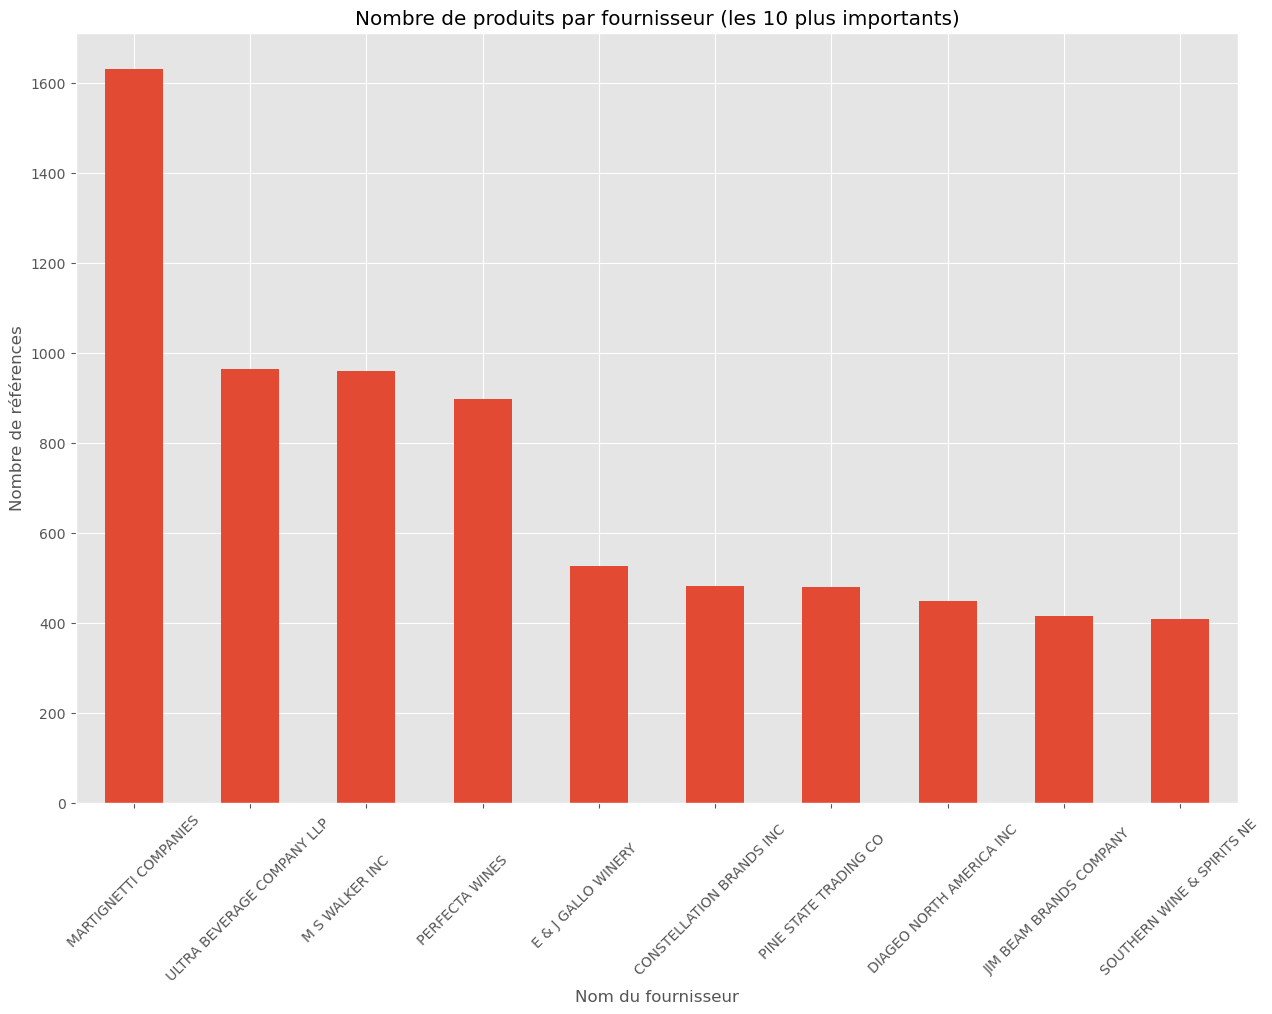

In [76]:
# Créons un diagramme avec les 10 fournisseurs les plus importants. En réalité c'est surtout les 10 qui fournissent le plus de produits
figure, ax = plt.subplots(figsize = (15, 10)) # Création de la figure et de l'ax
# Définition de l'ax la valeur, la limite de 10 fournisseurs et le type de graphique
ax = df_temp['Vendor_Name'].value_counts() \
        .head(10)\
        .plot(kind = 'bar')
ax.set_title('Nombre de produits par fournisseur (les 10 plus importants)') # Titre du graphique
ax.set_xlabel('Nom du fournisseur') # Titre de l'axe X
ax.set_ylabel('Nombre de références') # Titre de l'axe Y
ax.tick_params(axis ='x', labelrotation = 45); # Rotation des noms des fournisseursa fin qu'ils ne soient pas à la verticale

In [77]:
# Ensuite regardons la distribution des prix d'achat et de prix de vente
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


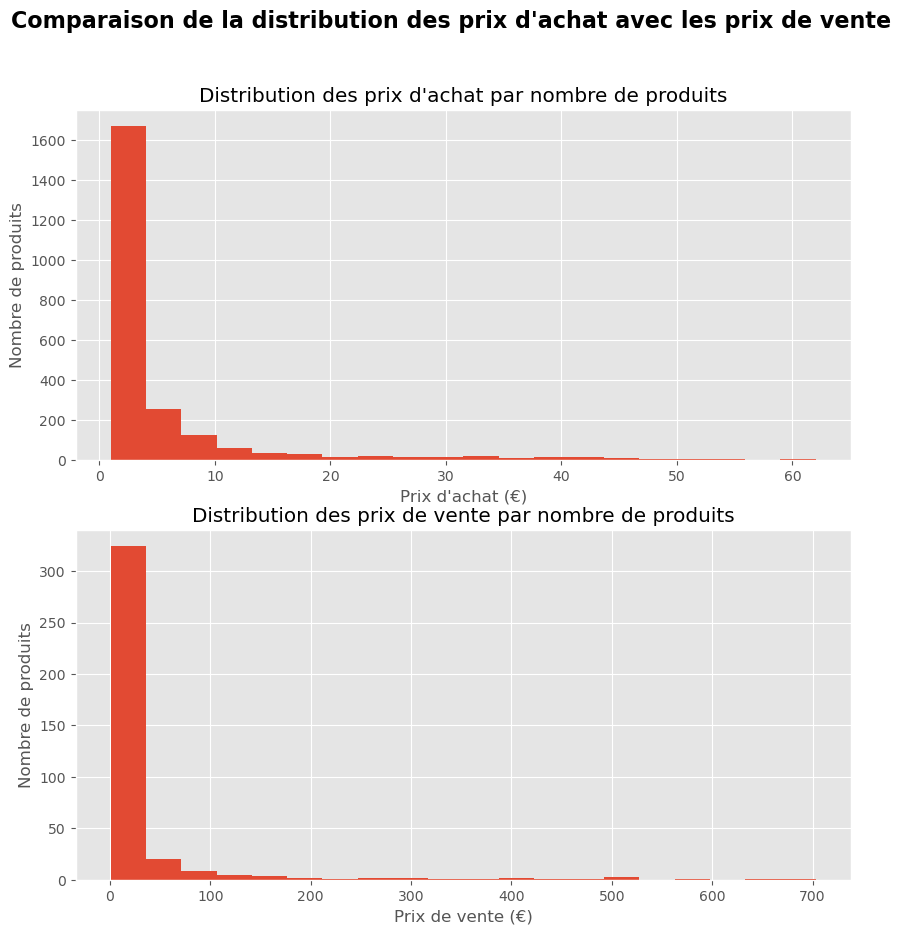

In [78]:
# Créons donc un graphique pour les prix d'achat et les prix de vente
# Création du cadre
fig, (ax0, ax1) = plt.subplots(ncols = 1,
                                 nrows = 2,
                                 figsize = (10,10))

# Création du premier graphique (prix d'achat)
Achat = ax0.hist(df_temp['Purchasing_Price'].value_counts(), 
                 bins = 20)
ax0.set(title = '''Distribution des prix d'achat par nombre de produits''',
        ylabel = 'Nombre de produits',
        xlabel = '''Prix d'achat (€)''');

# Création du premier graphique (prix d'achat)
Vente = ax1.hist(df_temp['Selling_Price'].value_counts(), 
                 bins = 20)
ax1.set(title = '''Distribution des prix de vente par nombre de produits''',
        ylabel = 'Nombre de produits',
        xlabel = '''Prix de vente (€)''');

# Titre du cadre
fig.suptitle("Comparaison de la distribution des prix d'achat avec les prix de vente", fontsize = 16, fontweight = 'bold');

In [79]:
# Maintenant regardons la distribution des quantités et du volume
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


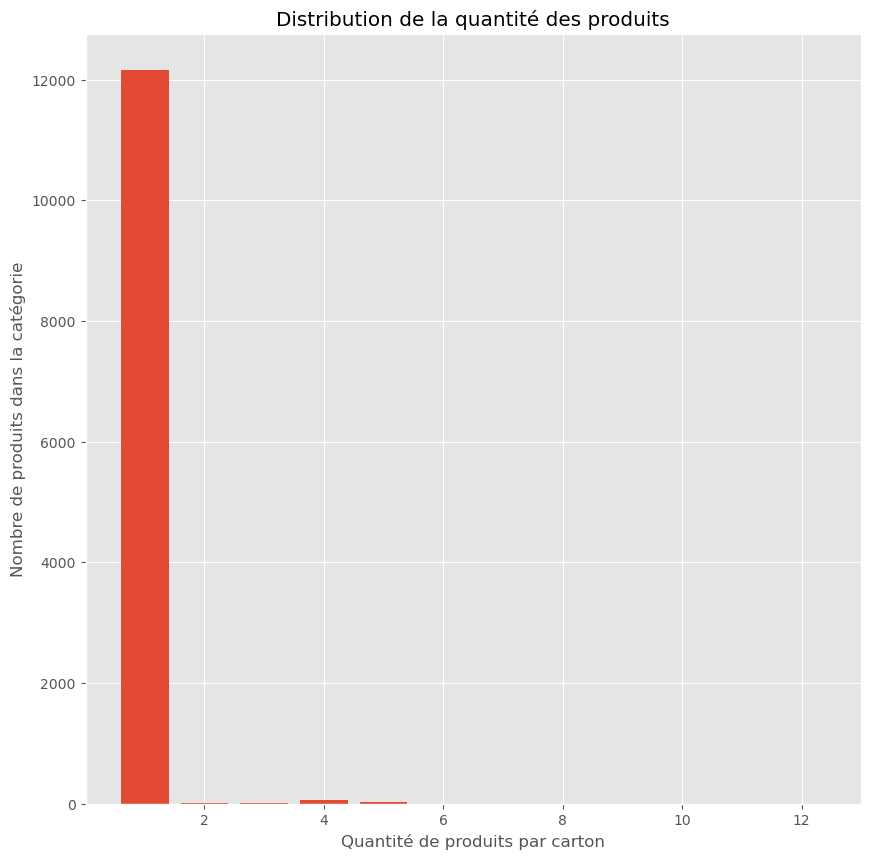

In [80]:
# Visualisatons d'abord la quantité
# Créons le cadre
fig, ax = plt.subplots(figsize = (10, 10))

# Créons le graphique
graphique = ax.bar(df_temp['Quantity'].unique(), df_temp['Quantity'].value_counts())
ax.set(title = "Distribution de la quantité des produits",
       xlabel = "Quantité de produits par carton",
       ylabel = "Nombre de produits dans la catégorie");

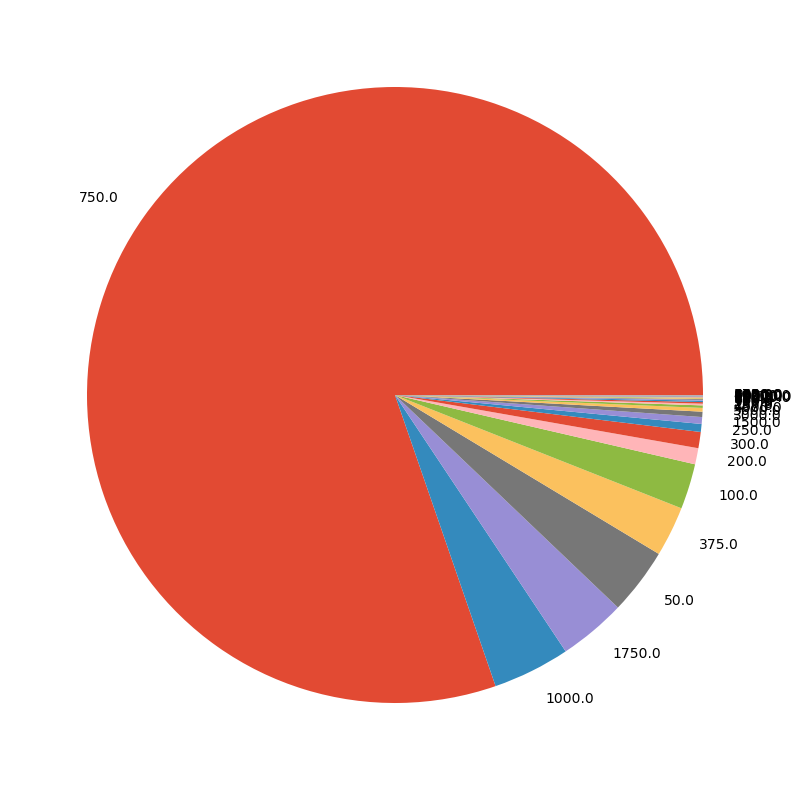

In [81]:
# Visualisation du Volume par produit
# Création du cadre
fig, ax = plt.subplots(figsize = (10,10))

# Création du graphique
graphiuqe = ax.pie(df_temp['Volume_Per_Unit_ml'].value_counts(), labels = df_temp['Volume_Per_Unit_ml'].unique())

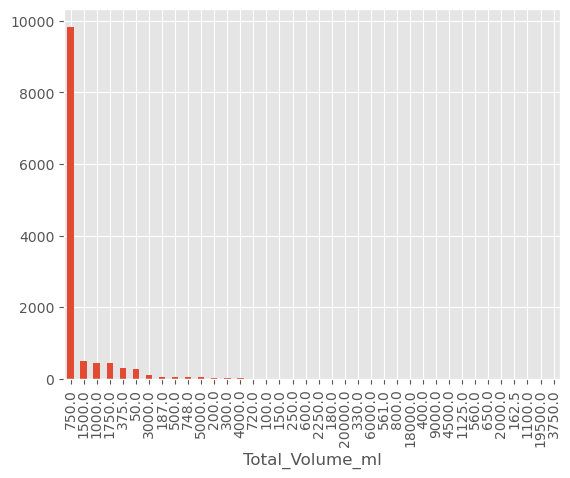

In [82]:
# Création rapide via la commande .plot
df_temp['Total_Volume_ml'].value_counts().plot(kind = 'bar');

## Chapitre 4: Relations entre les caractéristiques

In [83]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


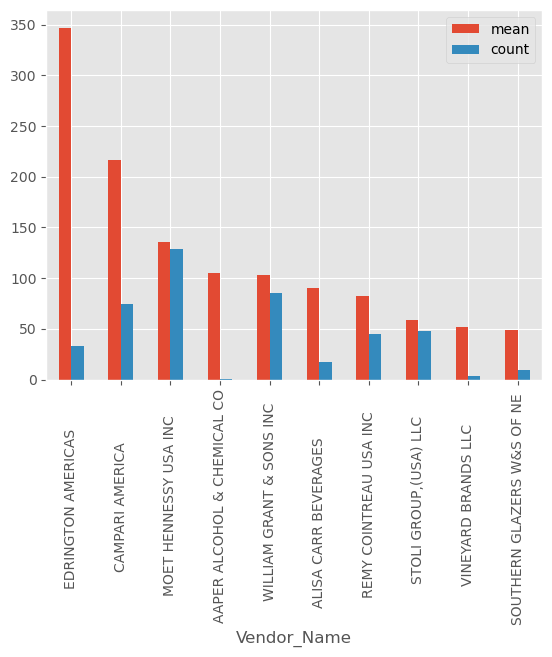

In [84]:
# Etudions le prix d'achat en fonction du fournisseurs
# Groupons d'abord la base de données par les vendeurs et ajoutons-y que le prix d'achat
# Ensuite prenons la moyenne et le nombre de produits
# Puis mettons les dans l'ordre décroissant
# Ensuite affichons que les 10 prémière valeurs
# Puis créons le graphique 
df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

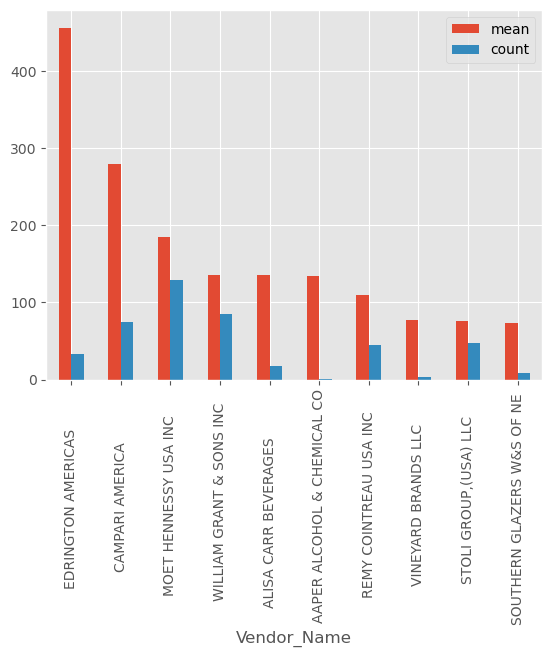

In [85]:
# Etudions maintenant la même chose mais en fonction du prix de vente moyen
df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

In [86]:
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [87]:
# Etudions maintenant la même chose mais en fonciton de la marge donc prix d'achat vs prix de vente
# Pour cela créons donc un colonne marge
df_temp.insert(3, 'Profit', df_temp['Selling_Price'].values - df_temp['Purchasing_Price'].values)
df_temp.head()

,Product_ID,Product_Name,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Purchasing_Price,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,12.99,3.71,1,750.0,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,8.32,1,750.0,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,8.53,1,750.0,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,8.88,1,750.0,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,4.05,1,750.0,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [88]:
# Changeons aussi de place la colonne prix d'achat afin que cela soit mieux organisé et plus instictif
# Rename de la colonnes afin de pouvoir créer celle qui sera au bon endroit directement avec le bon nom
df_temp.rename(columns = {'Purchasing_Price' : 'Purch'}, inplace = True)
# Déplacement de la colonne en créant une nouvelle avec ses valeurs
df_temp.insert(2, 'Purchasing_Price', df_temp['Purch'].values)
# Suppréssion de la colonnes au mauvais endroit
df_temp.drop('Purch', axis = 1, inplace = True)
df_temp.head()

,Product_ID,Product_Name,Purchasing_Price,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,9.28,12.99,3.71,1,750.0,750.0,1,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,28.67,36.99,8.32,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,30.46,38.99,8.53,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,26.11,34.99,8.88,1,750.0,750.0,1,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,10.94,14.99,4.05,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.


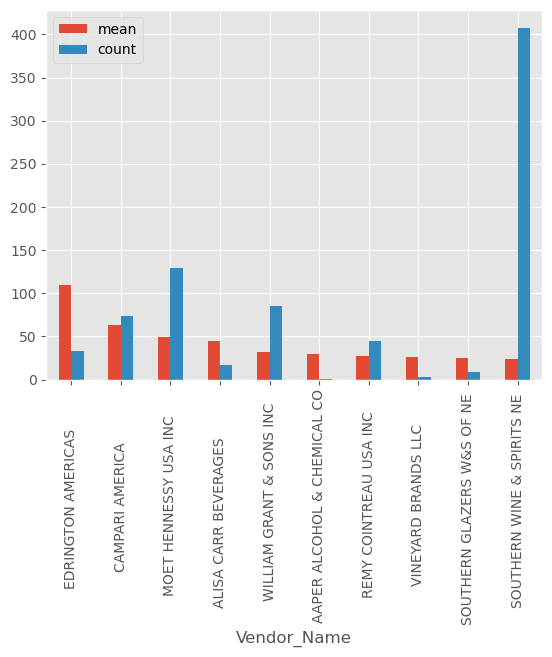

In [89]:
# Création du graphique
df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

### Maintenant analysons cela en fonction du volume par carton par vendeur

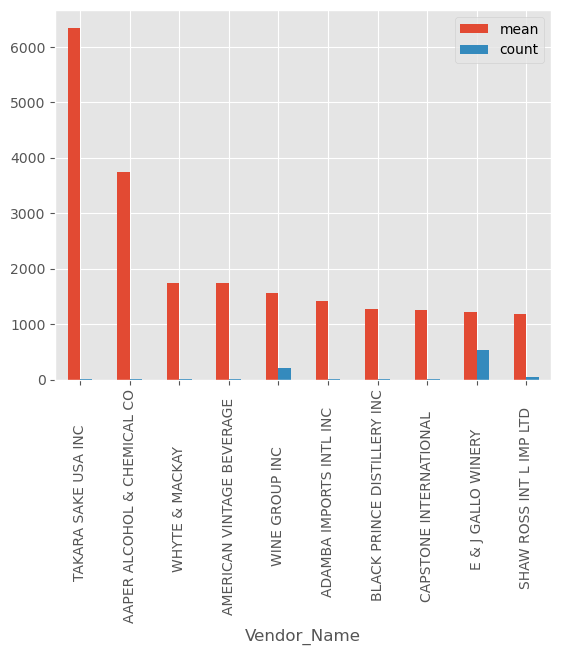

In [90]:
# Création du graphique total_volume par vendeur
df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean', 'count']) \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

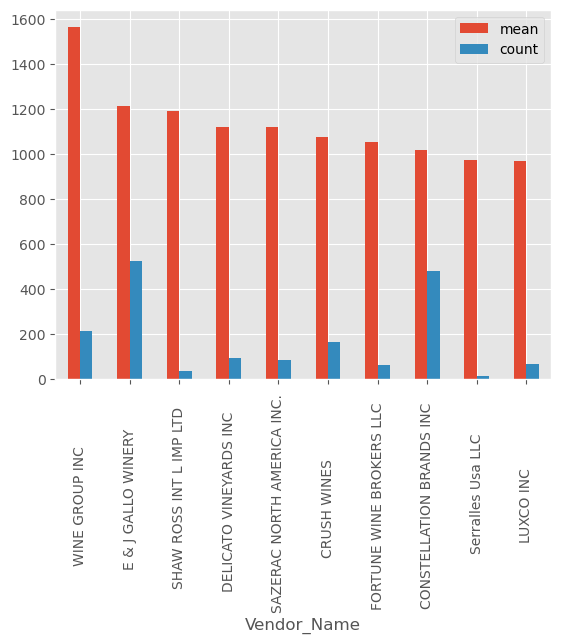

In [91]:
# Le graphique au-dessus n'est pas super représentatif puisque les vendeurs avec les plus gros volume totaux sont ceux qui n'ont qu'un produit. 
# Il faut donc analyser en fonction de ceux qui nous vendent déjà pas mal de produits pour que cela soit représentatif.
# Le code est le même, nous allons juste ajouter un filtre en plus.
df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean', 'count']) \
    .query('count > 10') \
    .sort_values('mean', ascending = False) \
    .head(10) \
    .plot(kind = 'bar');

#### Observons en fonction du nombre de produits 
(Cela nous aidera à savoir si nos fournisseurs sont assez variés ou, au contraire, si nous nous fournisson surtout parmis un fournisseur) 

(Ceci a déjà été vu plus haut donc ici j'utiliserai une autre manière de coder le graphique)

<Axes: xlabel='Vendor_Name'>

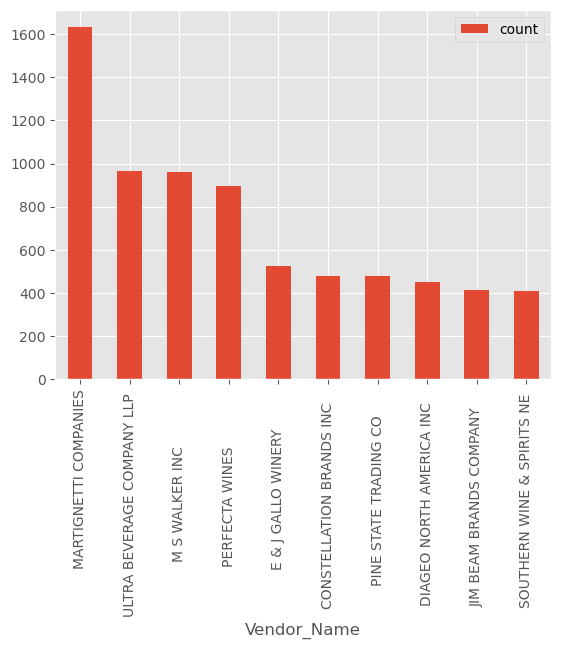

In [92]:
# Création du graphique
df_temp.groupby(by = 'Vendor_Name')['Product_ID'] \
    .agg(['count']) \
    .sort_values('count', ascending = False) \
    .head(10) \
    .plot(kind = 'bar')

In [93]:
df_temp.head(10)

,Product_ID,Product_Name,Purchasing_Price,Selling_Price,Profit,Quantity,Volume_Per_Unit_ml,Total_Volume_ml,Classification,Vendor_ID,Vendor_Name
0,58,Gekkeikan Black & Gold Sake,9.28,12.99,3.71,1,750.0,750.0,1,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,28.67,36.99,8.32,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,30.46,38.99,8.53,1,750.0,750.0,1,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,26.11,34.99,8.88,1,750.0,750.0,1,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,10.94,14.99,4.05,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
5,77,Three Olives Espresso Vodka,10.39,12.99,2.60,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
6,79,Three Olives Loopy Vodka,9.62,14.99,5.37,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.
7,115,Belvedere Vodka,21.37,27.99,6.62,1,1000.0,1000.0,1,8112,MOET HENNESSY USA INC
8,126,Grey Goose Vodka,20.14,32.99,12.85,1,1000.0,1000.0,1,480,BACARDI USA INC
9,168,Three Olives Strawberry,8.95,12.99,4.04,1,750.0,750.0,1,7245,PROXIMO SPIRITS INC.


Est-ce que plus le prix d'achat est élevé, plus la marge l'est aussi ?

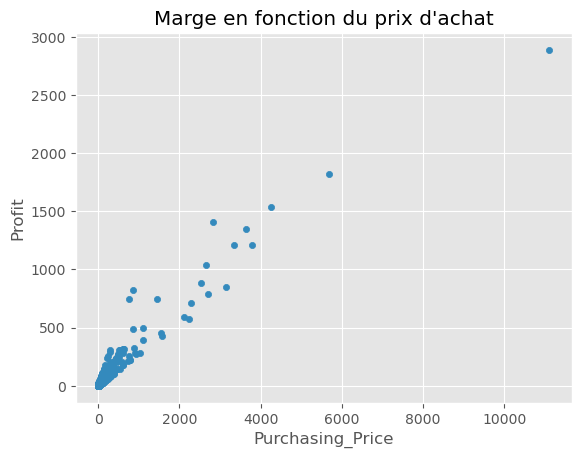

In [94]:
# Création du graphique à paritr d'un troisième type de commande
df_temp.plot(kind = 'scatter',
             x = 'Purchasing_Price',
             y = 'Profit',
             title = "Marge en fonction du prix d'achat");
# Elle dépend donc du prix d'achat. Car plus le prix d'ahcat monte, plus la marge monte aussi

Et est-ce qu'elle dépend du prix de vente ?

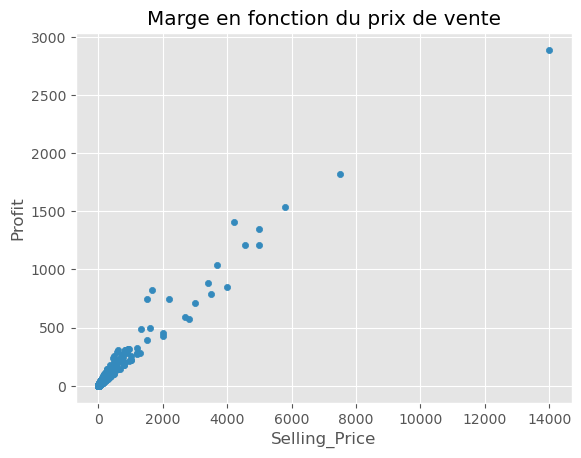

In [95]:
# Création du graphique
df_temp.plot(kind = 'scatter',
             x = 'Selling_Price',
             y = 'Profit',
             title = 'Marge en fonction du prix de vente');
# On observe donc que la marge dépend également du prix de vente

## Graphique résumant l'EDA parmis les fournisseurs

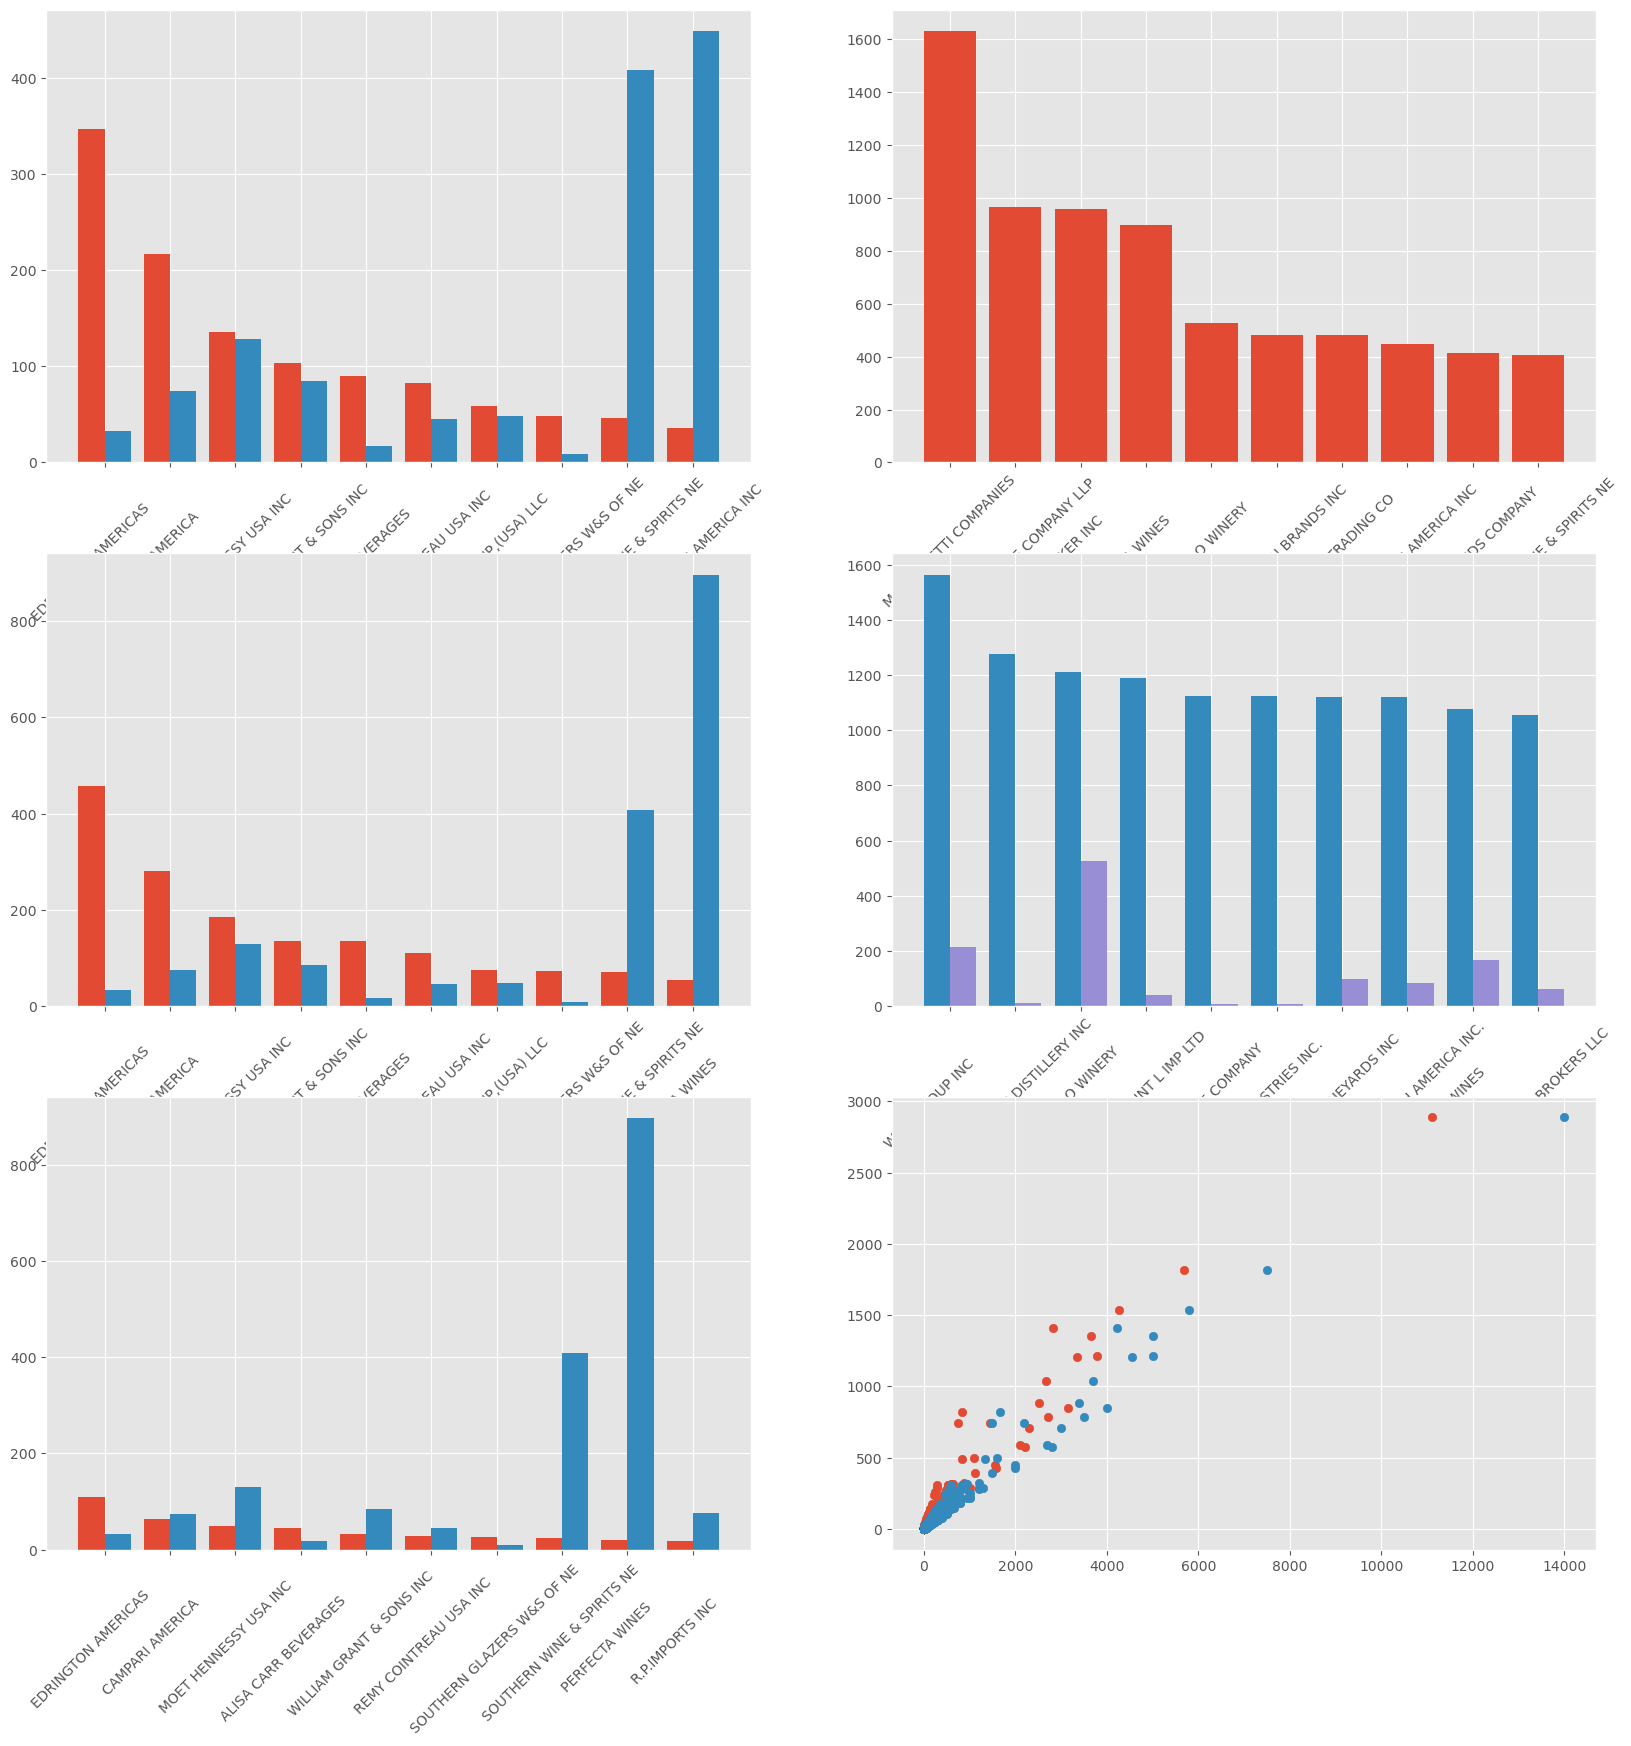

In [96]:
# Création du cadre et set up des gaphriques
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(ncols = 2,
                                                      nrows = 3,
                                                      figsize = (20, 20))


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX D'ACHAT VS FOURNISSEUR
# D'abord il faut créer un df 
df_achat_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_achat_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_achat_fourni['Vendor_Name']))

# Création du graphique
ax0.bar(X_axis - 0.2, df_achat_fourni['mean'], 0.4, label = 'mean')
ax0.bar(X_axis + 0.2, df_achat_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax0.set_xticks(X_axis, df_achat_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX DE VENTE VS FOURNISSEUR
# Le même processus a lieu
df_vente_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_vente_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_vente_fourni['Vendor_Name']))

# Création du graphique
ax2.bar(X_axis - 0.2, df_vente_fourni['mean'], 0.4, label = 'mean')
ax2.bar(X_axis + 0.2, df_vente_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax2.set_xticks(X_axis, df_vente_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS FOURNISSEUR
# Le même processus a lieu
df_marge_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_marge_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_marge_fourni['Vendor_Name']))

# Création du graphique
ax4.bar(X_axis - 0.2, df_marge_fourni['mean'], 0.4, label = 'mean')
ax4.bar(X_axis + 0.2, df_marge_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax4.set_xticks(X_axis, df_marge_fourni['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE NB DE PRODUITS VS FOURNI
# Création du dataframe
df_produits = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Product_ID'] \
    .agg(['count']) \
    .sort_values('count', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index à un colonne
df_produits.reset_index(inplace = True)

# Création du graphique
ax1.bar(df_produits['Vendor_Name'], df_produits['count'])

# On change la rotation des labels afin qu'ils soient lisibles
ax1.set_xticks(df_produits['Vendor_Name'], df_produits['Vendor_Name'], rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
# GRAPHIQUE VOLUME TOTAL MOYEN VS FOURNISSEUR
df_volume = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Total_Volume_ml'] \
    .agg(['mean','count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index à un colonne
df_volume.reset_index(inplace = True)

# Création du graphique
ax3.bar(df_volume['Vendor_Name'], df_volume['count'])

# Création du graphique
ax3.bar(X_axis - 0.2, df_volume['mean'], 0.4, label = 'mean')
ax3.bar(X_axis + 0.2, df_volume['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax3.set_xticks(X_axis, df_volume['Vendor_Name'].values, rotation = 45);


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS PRIX ACHAT ET VENTE
# Création du graphique en fonction du prix d'achat
ax5.scatter(x = df_temp['Purchasing_Price'],
            y = df_temp['Profit']);

# Ajout du graphique en fonction du prix de vente 
ax5.scatter(x = df_temp['Selling_Price'],
            y = df_temp['Profit']);

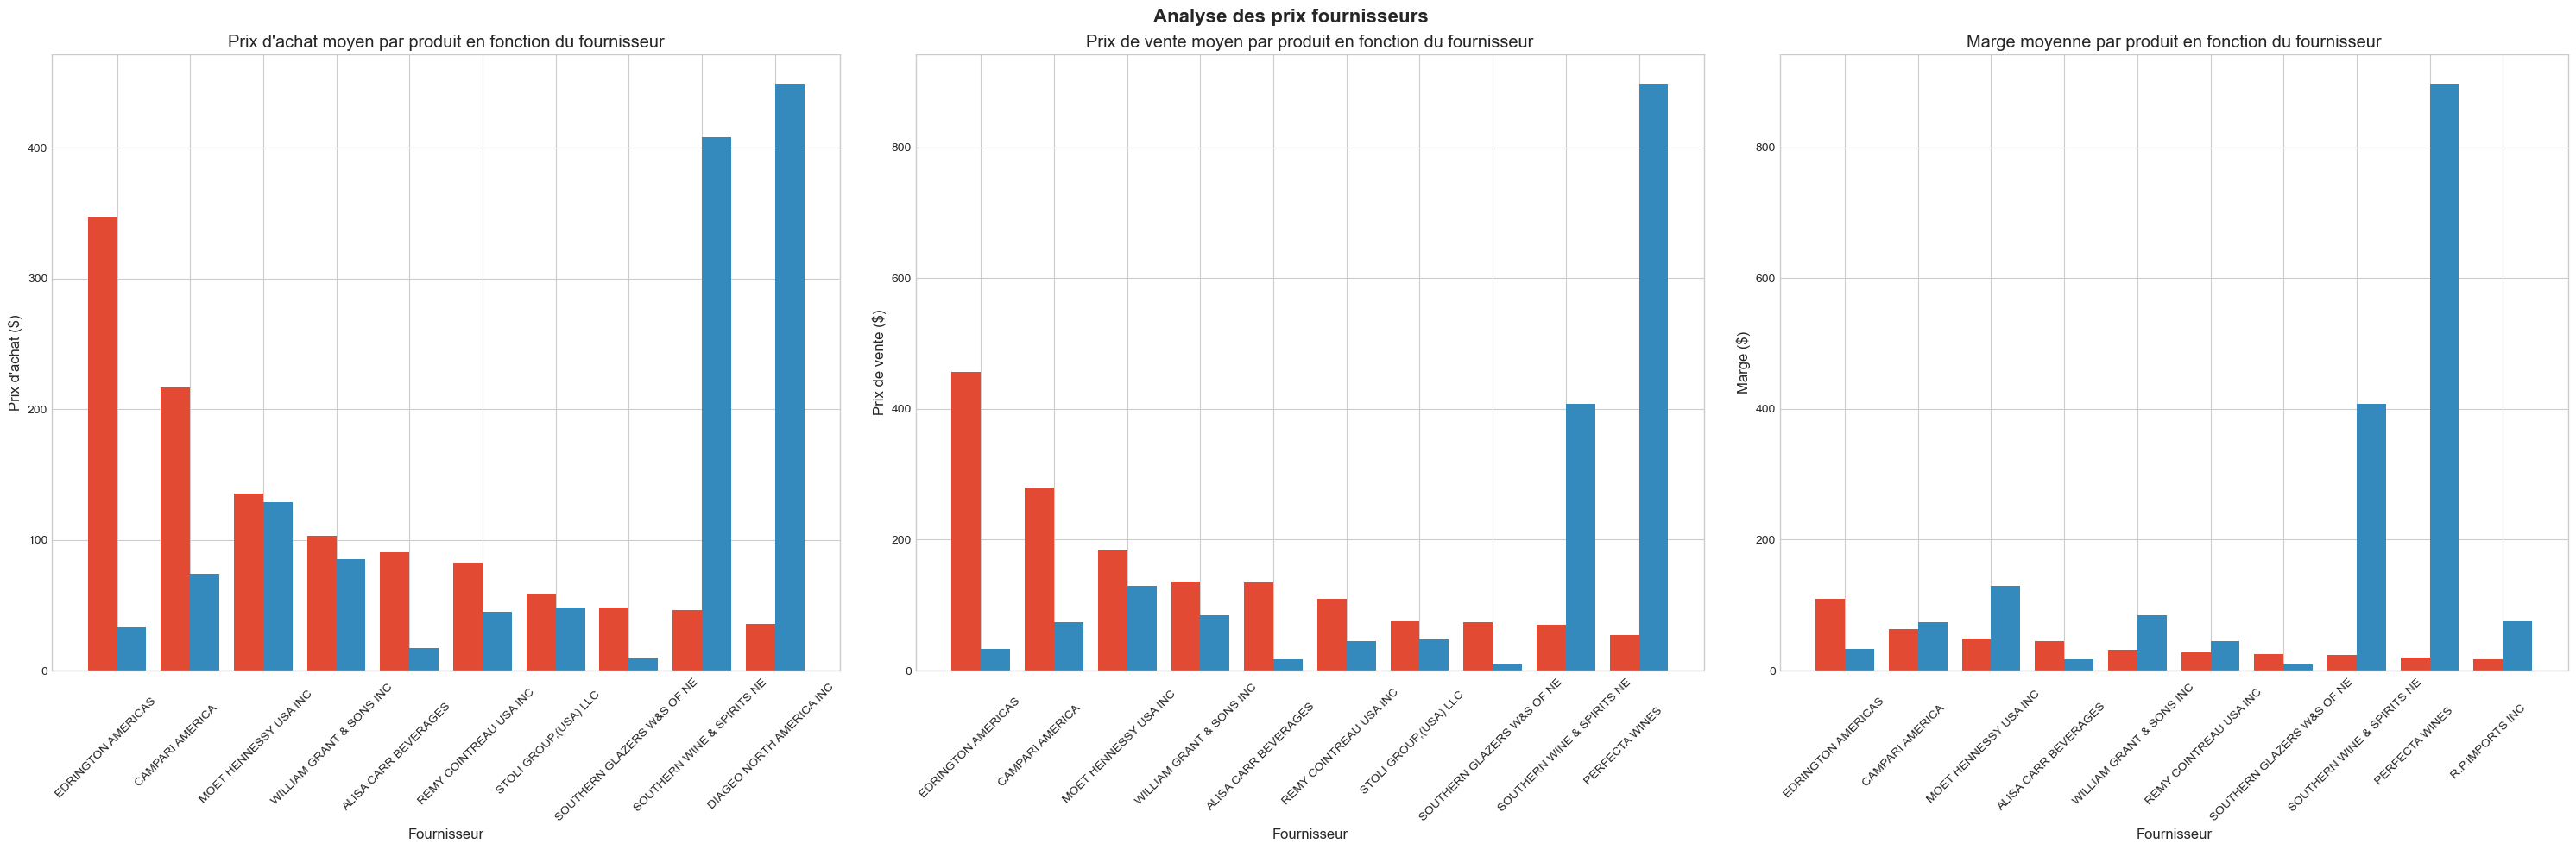

In [97]:
# Style des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
# Création du cadre et set up des gaphriques
fig, (ax0, ax2, ax4) = plt.subplots(ncols = 3,
                                    nrows = 1,
                                    figsize = (30, 10))


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX D'ACHAT VS FOURNISSEUR
# D'abord il faut créer un df 
df_achat_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Purchasing_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_achat_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_achat_fourni['Vendor_Name']))

# Création du graphique
ax0.bar(X_axis - 0.2, df_achat_fourni['mean'], 0.4, label = 'mean')
ax0.bar(X_axis + 0.2, df_achat_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax0.set_xticks(X_axis, df_achat_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax0.set(title = "Prix d'achat moyen par produit en fonction du fournisseur",
        xlabel = 'Fournisseur',
        ylabel = "Prix d'achat ($)")


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE PRIX DE VENTE VS FOURNISSEUR
# Le même processus a lieu
df_vente_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Selling_Price'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_vente_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_vente_fourni['Vendor_Name']))

# Création du graphique
ax2.bar(X_axis - 0.2, df_vente_fourni['mean'], 0.4, label = 'mean')
ax2.bar(X_axis + 0.2, df_vente_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax2.set_xticks(X_axis, df_vente_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax2.set(title = 'Prix de vente moyen par produit en fonction du fournisseur',
        xlabel = 'Fournisseur',
        ylabel = 'Prix de vente ($)')


# ______________________________________________________________________________________________________________________________________________________
## GRAPHIQUE MARGE VS FOURNISSEUR
# Le même processus a lieu
df_marge_fourni = pd.DataFrame(data = df_temp.groupby(by = 'Vendor_Name')['Profit'] \
    .agg(['mean', 'count']) \
    .query('count > 5') \
    .sort_values('mean', ascending = False) \
    .head(10))
# Permet de passer Vendor_Name de l'index du dataframe à une colonne simple
df_marge_fourni.reset_index(inplace = True)

# Création du label sur l'axe X, il a besoin d'être numérique afin de pouvoir faire des bar charts avec de mulitples bars.
X_axis = np.arange(len(df_marge_fourni['Vendor_Name']))

# Création du graphique
ax4.bar(X_axis - 0.2, df_marge_fourni['mean'], 0.4, label = 'mean')
ax4.bar(X_axis + 0.2, df_marge_fourni['count'], 0.4, label = 'count')

# On renomme les labels et on change leur rotation afin de les rendre lisibles 
ax4.set_xticks(X_axis, df_marge_fourni['Vendor_Name'].values, rotation = 45);

# Titre du graphique
ax4.set(title = 'Marge moyenne par produit en fonction du fournisseur',
       xlabel = 'Fournisseur',
       ylabel = 'Marge ($)')



# Titre du graphique
fig.suptitle('Analyse des prix fournisseurs', fontsize = 16, fontweight = 'bold');

plt.tight_layout()
plt.show()

In [98]:
fig.savefig('Analyse des prix fournisseurs.png')

In [99]:
df_sourcing = df_temp.copy()

# Partie II: Gestion des stocks

Dans cette partie nous allons d'abord explorer les différentes bases de données qui pourraient servir à faire une gestion d'inventaire optimale et ensuite nous définirons les stocks optimaux pour l'entreprise²

## Chapitre 1: Invetaires début 2016

### I) Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

In [100]:
# Importation de la base de onnées
df_invdeb = pd.read_csv('Data/BegInvFINAL12312016.csv')
df_invdeb.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [101]:
# Visualisation de comment est structurée la base de données
df_invdeb.shape

(206529, 9)

In [102]:
# Visualisation de la fin des données
df_invdeb.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [103]:
# Visualisation des data types
df_invdeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [104]:
# Importation de la base de données avec la data au bon format 
df_invdeb = pd.read_csv('Data/BegInvFINAL12312016.csv', parse_dates = ['startDate'])
df_invdeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  206529 non-null  object        
 1   Store        206529 non-null  int64         
 2   City         206529 non-null  object        
 3   Brand        206529 non-null  int64         
 4   Description  206529 non-null  object        
 5   Size         206529 non-null  object        
 6   onHand       206529 non-null  int64         
 7   Price        206529 non-null  float64       
 8   startDate    206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.2+ MB


In [105]:
# Visualisation du df
df_invdeb.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [106]:
# description des données
df_invdeb.describe()

,Store,Brand,onHand,Price,startDate
count,206529.000000,206529.000000,206529.000000,206529.000000,206529
mean,42.122457,13761.482320,20.429455,22.253910,2016-01-01 00:00:00
min,1.000000,58.000000,0.000000,0.000000,2016-01-01 00:00:00
25%,22.000000,3746.000000,7.000000,9.990000,2016-01-01 00:00:00
50%,42.000000,8010.000000,12.000000,14.990000,2016-01-01 00:00:00
75%,64.000000,22143.000000,21.000000,21.990000,2016-01-01 00:00:00
max,79.000000,90090.000000,1251.000000,13999.900000,2016-01-01 00:00:00
std,23.191393,13059.429355,31.467342,70.178964,NaN


In [107]:
df_invdeb.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [108]:
# Comprendre chaque colonne
# InventoryID values, normalement toutes devraient être uniques puisque c'est l'unique identifier
df_invdeb['InventoryId'].value_counts()

InventoryId
1_HARDERSFIELD_58         1
56_BEGGAR'S HOLE_43809    1
56_BEGGAR'S HOLE_43225    1
56_BEGGAR'S HOLE_43245    1
56_BEGGAR'S HOLE_43308    1
                         ..
30_CULCHETH_23692         1
30_CULCHETH_23712         1
30_CULCHETH_23739         1
30_CULCHETH_23764         1
79_BALLYMENA_90089        1
Name: count, Length: 206529, dtype: int64

L'inventory ID est composé de l'unique ID de chaque produit qui ici est encore la colonne "brand". Ensuite il  est composé du nom de la ville dans lequel se situe le magasin. Et le chiffre au début est le numéro du magasin

In [109]:
# Stores
df_invdeb['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64)

In [110]:
# Checker pour 1
df_temp = df_invdeb[df_invdeb['Store'] == 1]
df_temp['City'].value_counts()

City
HARDERSFIELD    3255
Name: count, dtype: int64

In [111]:
# Checker le nombre de villes
df_invdeb['City'].value_counts()

City
MOUNTMEND       14264
EANVERNESS      13011
DONCASTER       10356
HORNSEY          9997
GOULCREST        7930
                ...  
AYLESBURY        1370
KNIFE'S EDGE     1343
VERITAS          1323
LUNDY            1291
EASTHAVEN        1225
Name: count, Length: 67, dtype: int64

In [112]:
# CHecker les uniques
df_invdeb['City'].unique()

array(['HARDERSFIELD', 'ASHBORNE', 'HORNSEY', 'EANVERNESS', 'SUTTON',
       'GOULCREST', 'STANMORE', 'ALNERWICK', 'BLACKPOOL', 'CARDEND',
       'LEESIDE', 'TARMSWORTH', 'BROMWICH', 'WANBORNE', 'LUNDY', 'OLDHAM',
       'FURNESS', 'WINTERVALE', 'BREDWARDINE', 'BALERNO', 'SHARNWICK',
       'ARBINGTON', 'PALPERROTH', 'CAERSHIRE', "KNIFE'S EDGE",
       'MOUNTMEND', 'LARNWICK', 'AYLESBURY', 'CULCHETH', 'PITMERDEN',
       'HALIVAARA', 'LEWES', 'PAETHSMOUTH', 'EASTHALLOW', 'BULLMAR',
       'BLACK HOLLOW', 'WOLFORD', 'PORTHCRAWL', 'VERITAS', 'TYWARDREATH',
       "PELLA'S WISH", 'NORFOLK', 'GARIGILL', 'ABERDEEN', 'GRAYCOTT',
       'HILLFAR', 'GUTHRAM', 'DRY GULCH', "BEGGAR'S HOLE", 'LANTEGLOS',
       'HARTLEPOOL', 'CLAETHORPES', 'IRRAGIN', 'AETHELNEY', 'KILMARNOCK',
       'SWORDBREAK', 'CESTERFIELD', 'LUTON', 'SOLARIS', 'KELD',
       'CLARCTON', 'DONCASTER', 'PAENTMARWY', 'BARNCOMBE', 'TAMWORTH',
       'EASTHAVEN', 'BALLYMENA'], dtype=object)

Donc il existe beaucoup de villes, presque autant que de store ID, donc il ne doit pas avoir beaucoup de villes avec plus de 1 boutique.

Brand, size, volume, date, et price on connaît

In [113]:
# Regarder le onhand
df_invdeb['onHand'].value_counts()

onHand
12      11583
6       11244
8       10134
7        9769
11       9364
        ...  
523         1
848         1
583         1
447         1
1163        1
Name: count, Length: 474, dtype: int64

In [114]:
# Type de valeurs
df_invdeb['onHand'].unique()

array([   8,    7,    6,    3,   18,    2,    5,   11,   17,    0,   12,
         24,    1,   13,   14,   29,    4,   28,   10,   25,   57,   27,
         48,   16,   36,   15,   33,    9,   21,   31,   42,   59,   53,
         38,   55,   23,   32,   98,   52,   19,   34,   44,   51,   49,
        135,   85,   46,   26,   60,   56,   22,   92,   20,   66,   39,
        147,   35,   30,   64,   54,  123,   79,  104,   75,   73,   61,
        171,  129,  106,  190,  120,  139,   40,   76,   67,   88,   58,
         47,  229,   90,   82,   93,  122,  100,   43,   71,  138,   63,
         97,  152,   77,  121,  206,  105,  124,   45,   37,   50,   68,
        240,  108,  109,  107,   65,  118,   87,  101,  216,   41,  143,
         94,   95,   78,   72,   70,   62,  284,   81,  201,  132,   74,
        203,   84,  112,   83,   69,  130,  346,  170,  114,   89,  156,
        262,  277,  180,  163,  228,  296,  116,  115,  185,  320,  183,
         96,  144,  126,  215,  158,  167,  220,  1

In [115]:
# Checker quand même pour size
df_invdeb['Size'].unique()

array(['750mL', 'Liter', '1.75L', '50mL', '375mL', '50mL 4 Pk',
       '375mL 2 Pk', '750mL 3 Pk', '375mL 3 Pk', '750mL + 3/',
       '200mL 3 Pk', '50mL 3 Pk', '100mL 4 Pk', '100mL', '50mL 5 Pk',
       '200mL 4 Pk', '250mL 4 Pk', '750mL 2 Pk', '200mL', '3/100mL',
       '1.5L', '5L', '4L', '187mL 4 Pk', '3L', '5.0 Oz', '187mL', '500mL',
       '187mL 3 Pk', '300mL', '50mL 12 Pk', '330mL', '250mL', '18L',
       '750mL + 2/', '180mL', '720mL', '22.0 Oz', '6L', '20L',
       '750mL + 4/'], dtype=object)

## II) Préparation des données

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [116]:
df_invdeb.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [117]:
# Renommer les colonnes
df_invdeb = df_invdeb.rename(columns = {
    'InventoryId' : 'Inventory_ID',
    'Store' : 'Store_ID',
    'Brand' : 'Product_ID',
    'Description' : 'Product_Name',
    'Size' : 'Quantity',
    'onHand' : 'Stock',
    'startDate' : 'Date'}).copy()
df_invdeb.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Stock,Price,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [118]:
# Création d'un base de données temporaire afin d'apporter des modifications sans memttre en danger la base de données originelle
df_temp = df_invdeb.copy()

In [119]:
# Création de la colonne volume per unit
df_temp.insert(6, 'Volume_Per_Unit_(ML)', df_temp['Quantity'].values)

In [120]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Stock,Price,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,750mL,6,34.99,2016-01-01


In [121]:
# Checker les uniques values
df_temp['Volume_Per_Unit_(ML)'].unique()

array(['750mL', 'Liter', '1.75L', '50mL', '375mL', '50mL 4 Pk',
       '375mL 2 Pk', '750mL 3 Pk', '375mL 3 Pk', '750mL + 3/',
       '200mL 3 Pk', '50mL 3 Pk', '100mL 4 Pk', '100mL', '50mL 5 Pk',
       '200mL 4 Pk', '250mL 4 Pk', '750mL 2 Pk', '200mL', '3/100mL',
       '1.5L', '5L', '4L', '187mL 4 Pk', '3L', '5.0 Oz', '187mL', '500mL',
       '187mL 3 Pk', '300mL', '50mL 12 Pk', '330mL', '250mL', '18L',
       '750mL + 2/', '180mL', '720mL', '22.0 Oz', '6L', '20L',
       '750mL + 4/'], dtype=object)

In [122]:
# Enlever le strings de volumer per unit
# Ce n'est la méthoode plus optimale, la plus optimale serait une for loop
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == 'Liter', 'Volume_Per_Unit_(ML)'] = 1000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.75L', 'Volume_Per_Unit_(ML)'] = 1750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 3/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 100
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL', 'Volume_Per_Unit_(ML)'] = 100
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 5 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 250
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3/100mL', 'Volume_Per_Unit_(ML)'] = 300
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.5L', 'Volume_Per_Unit_(ML)'] = 1500
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5L', 'Volume_Per_Unit_(ML)'] = 5000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '4L', 'Volume_Per_Unit_(ML)'] = 4000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3L', 'Volume_Per_Unit_(ML)'] = 3000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5.0 Oz', 'Volume_Per_Unit_(ML)'] = 148
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '500mL', 'Volume_Per_Unit_(ML)'] = 500
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '300mL', 'Volume_Per_Unit_(ML)'] = 300
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 12 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '330mL', 'Volume_Per_Unit_(ML)'] = 330
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL', 'Volume_Per_Unit_(ML)'] = 250
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '18L', 'Volume_Per_Unit_(ML)'] = 18000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 2/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '180mL', 'Volume_Per_Unit_(ML)'] = 180
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '720mL', 'Volume_Per_Unit_(ML)'] = 720
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '22.0 Oz', 'Volume_Per_Unit_(ML)'] = 651
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '6L', 'Volume_Per_Unit_(ML)'] = 6000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '20L', 'Volume_Per_Unit_(ML)'] = 20000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 4/', 'Volume_Per_Unit_(ML)'] = 750

In [123]:
df_temp['Volume_Per_Unit_(ML)'].unique()

array([750, 1000, 1750, 50, 375, 200, 100, 250, 300, 1500, 5000, 4000,
       187, 3000, 148, 500, 330, 18000, 180, 720, 651, 6000, 20000],
      dtype=object)

In [124]:
df_temp['Quantity'].unique()

array(['750mL', 'Liter', '1.75L', '50mL', '375mL', '50mL 4 Pk',
       '375mL 2 Pk', '750mL 3 Pk', '375mL 3 Pk', '750mL + 3/',
       '200mL 3 Pk', '50mL 3 Pk', '100mL 4 Pk', '100mL', '50mL 5 Pk',
       '200mL 4 Pk', '250mL 4 Pk', '750mL 2 Pk', '200mL', '3/100mL',
       '1.5L', '5L', '4L', '187mL 4 Pk', '3L', '5.0 Oz', '187mL', '500mL',
       '187mL 3 Pk', '300mL', '50mL 12 Pk', '330mL', '250mL', '18L',
       '750mL + 2/', '180mL', '720mL', '22.0 Oz', '6L', '20L',
       '750mL + 4/'], dtype=object)

In [125]:
# Modification de certaines valeurs dans la colonne Quantity afin de pouvoir utiliser la fonction créée dans le EDA précedent
df_temp.loc[df_temp['Quantity'] == '3/100mL', 'Quantity'] = '300mL'
df_temp.loc[df_temp['Quantity'] == '5.0 Oz', 'Quantity'] = '148mL'
df_temp.loc[df_temp['Quantity'] == '22.0 Oz', 'Quantity'] = '651mL'

In [126]:
# Modification de la fonction remplacement afin qu'elle ne touche pas à 12 Pk
# Fonction qui remplace les string par la quantité présente dans la commande. Si pas x alors par défaut 1 si x alors la quantité est égal à x
def remplacementV2(dataframe, colonne):
    for c in dataframe[colonne].unique():
        if c == '50mL 12 Pk':
            pass
        else:
            i = 0 
            space = [] 
            while i < len(c):
                if c[i] == ' ' and ord('0') <= ord(c[i + 1]) <= ord('9'):
                    space.append(c)
                    dataframe.replace(c, int(c[i + 1]), inplace = True)
                i += 1
            if c not in space:
                dataframe.replace(c, int(1), inplace = True)

In [127]:
remplacementV2(df_temp, 'Quantity')

In [128]:
# Modification de 12 Pk
df_temp.loc[df_temp['Quantity'] == '50mL 12 Pk', 'Quantity'] = 12
df_temp['Quantity'].value_counts()

Quantity
1     204787
4       1089
3        267
2        207
5        170
12         9
Name: count, dtype: int64

In [129]:
df_temp['Quantity'].value_counts()

Quantity
1     204787
4       1089
3        267
2        207
5        170
12         9
Name: count, dtype: int64

In [130]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Stock,Price,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,6,34.99,2016-01-01


In [131]:
# Checker les data types
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Inventory_ID          206529 non-null  object        
 1   Store_ID              206529 non-null  int64         
 2   City                  206529 non-null  object        
 3   Product_ID            206529 non-null  int64         
 4   Product_Name          206529 non-null  object        
 5   Quantity              206529 non-null  object        
 6   Volume_Per_Unit_(ML)  206529 non-null  object        
 7   Stock                 206529 non-null  int64         
 8   Price                 206529 non-null  float64       
 9   Date                  206529 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 15.8+ MB


In [132]:
df_temp['Volume_Per_Unit_(ML)'].value_counts()

Volume_Per_Unit_(ML)
750      144744
1750      21774
1500      12273
50        10042
375        7478
1000       3671
3000       2386
5000       1534
187         832
500         425
4000        328
200         300
100         235
300         200
250         126
720          51
148          45
330          43
180          26
651           8
18000         6
6000          1
20000         1
Name: count, dtype: int64

In [133]:
# Transformer le Volume per unit en int afin de pouvoir créer la colonne volume total
df_temp['Volume_Per_Unit_(ML)'] = df_temp['Volume_Per_Unit_(ML)'].astype(int)
df_temp.dtypes

Inventory_ID                    object
Store_ID                         int64
City                            object
Product_ID                       int64
Product_Name                    object
Quantity                        object
Volume_Per_Unit_(ML)             int32
Stock                            int64
Price                          float64
Date                    datetime64[ns]
dtype: object

In [134]:
# Création de la colonne volume total
df_temp.insert(7, 'Total_Volume_(ML)', df_temp['Volume_Per_Unit_(ML)'].values * df_temp['Quantity'])
df_temp['Total_Volume_(ML)'].unique()

array([750, 1000, 1750, 50, 375, 200, 2250, 1125, 600, 150, 400, 100, 250,
       800, 1500, 300, 5000, 4000, 748, 3000, 148, 187, 500, 561, 330,
       18000, 180, 720, 651, 6000, 20000], dtype=object)

In [135]:
# Checker si cela a bien fonctionner
df_temp[df_temp['Quantity'] == 3]

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Price,Date
120,1_HARDERSFIELD_1009,1,HARDERSFIELD,1009,Rebel Yell Variety Pack,3,750,2250,1,49.99,2016-01-01
131,1_HARDERSFIELD_1031,1,HARDERSFIELD,1031,Avion Tasting Flight 3/375mL,3,375,1125,5,49.99,2016-01-01
134,1_HARDERSFIELD_1035,1,HARDERSFIELD,1035,Pinnacle Vodka Gift Pak,3,750,2250,4,12.99,2016-01-01
135,1_HARDERSFIELD_1036,1,HARDERSFIELD,1036,Jameson Trilogy Pack,3,200,600,5,39.99,2016-01-01
144,1_HARDERSFIELD_1065,1,HARDERSFIELD,1065,DiSaronno Cavalli Collection,3,50,150,5,12.99,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...
200558,77_TAMWORTH_4105,77,TAMWORTH,4105,Patron XO Cafe Variety 3 Pak,3,50,150,21,6.99,2016-01-01
202556,78_EASTHAVEN_4105,78,EASTHAVEN,4105,Patron XO Cafe Variety 3 Pak,3,50,150,37,6.99,2016-01-01
203443,79_BALLYMENA_1035,79,BALLYMENA,1035,Pinnacle Vodka Gift Pak,3,750,2250,2,12.99,2016-01-01
203444,79_BALLYMENA_1065,79,BALLYMENA,1065,DiSaronno Cavalli Collection,3,50,150,0,12.99,2016-01-01


In [136]:
# Création du volume total stocké
df_temp.insert(9, 'Total_Stock_Volume_(ML)', df_temp['Total_Volume_(ML)'] * df_temp['Stock'])
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Price,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,2016-01-01


In [137]:
# Création de la valeur total dans chaque lighe
df_temp.insert(11, 'Stock_value', df_temp['Price'] * df_temp['Stock'] * df_temp['Quantity'])
df_temp.rename(columns = {'Price' : 'Selling_Price_Per_Unit'})
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Price,Stock_value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,103.92,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,76.93,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,221.94,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,116.97,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,209.94,2016-01-01


In [138]:
# Rename de la colonne avec le inplace (petit oubli)
df_temp.rename(columns = {'Price' : 'Selling_Price_Per_Unit'}, inplace = True)
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,103.92,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,76.93,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,221.94,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,116.97,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,209.94,2016-01-01


In [139]:
# Mal écrit
df_temp.rename(columns = {'Stock_value' : 'Stock_Value'}, inplace = True)

In [140]:
df_temp.groupby(by = 'City')['Stock_Value'] \
    .agg(['sum'])

,sum
City,
ABERDEEN,585944.38
AETHELNEY,1144363.79
ALNERWICK,561135.08
ARBINGTON,1239392.69
ASHBORNE,846364.23
...,...
TYWARDREATH,345757.03
VERITAS,275038.94
WANBORNE,1118298.3


## III) Compréhension des caractéristiques

Dans cette section nous allons créer des graphiques démontrat la distribution des caractéristiques.

In [141]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,103.92,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,76.93,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,221.94,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,116.97,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,209.94,2016-01-01


In [142]:
df_invdeb = df_temp.copy()
df_invdeb.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,103.92,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,76.93,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,221.94,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,116.97,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,209.94,2016-01-01


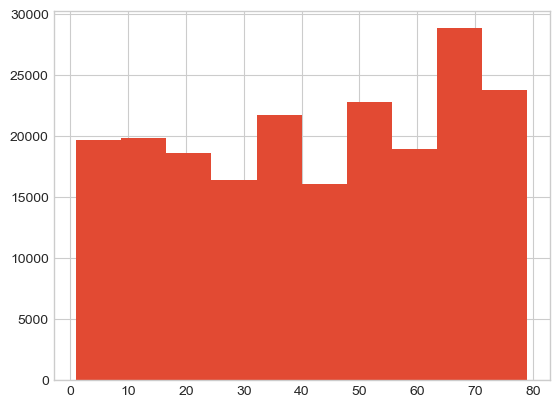

In [143]:
# Nombre de lignes d'inventaire par store id
df_invdeb['Store_ID'].hist();

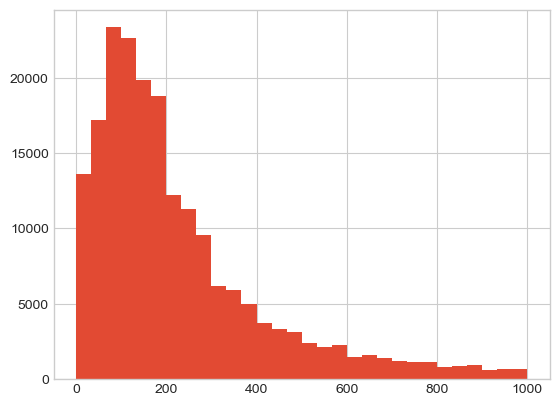

In [144]:
# Histogramme représentatif sans les outliers
hist_stock_value = df_invdeb[df_invdeb['Stock_Value'] < 1000]
hist_stock_value['Stock_Value'].hist(bins = 30);

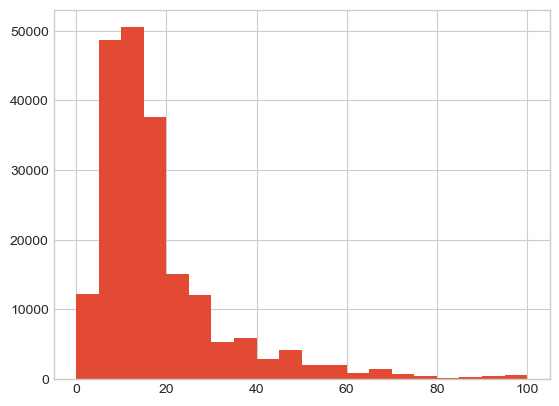

In [145]:
# Distribution du prix de vente sans les outliers
hist_selling_price = df_invdeb[df_invdeb['Selling_Price_Per_Unit'] < 100]
hist_selling_price['Selling_Price_Per_Unit'].hist(bins = 20);

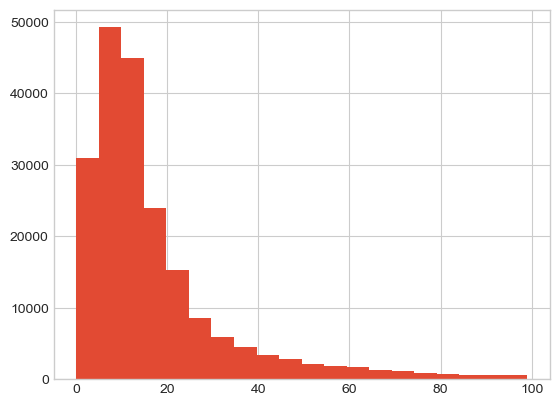

In [146]:
# Distribution du stock disponible sans les outliers
hist_stock = df_invdeb[df_invdeb['Stock'] < 100]
hist_stock['Stock'].hist(bins = 20);

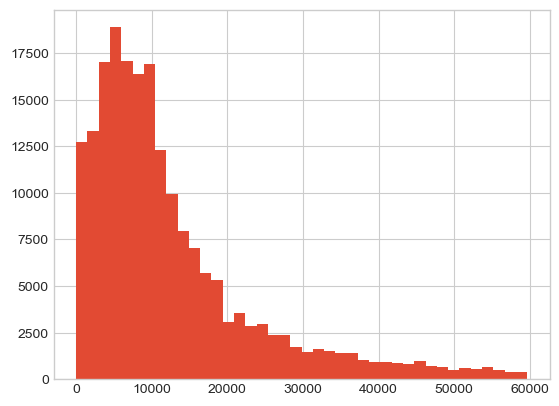

In [147]:
# Total stock volume afin de savoir le volume que prend chaque ligne de stock
total_volume = df_invdeb[df_invdeb['Total_Stock_Volume_(ML)'] < 60000]
total_volume['Total_Stock_Volume_(ML)'].hist(bins = 40);

## IV) Relations entre les caractéristiques

In [148]:
df_invdeb.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,8,6000,12.99,103.92,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,1,750,750,7,5250,10.99,76.93,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,6,4500,36.99,221.94,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,3,2250,38.99,116.97,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,6,4500,34.99,209.94,2016-01-01


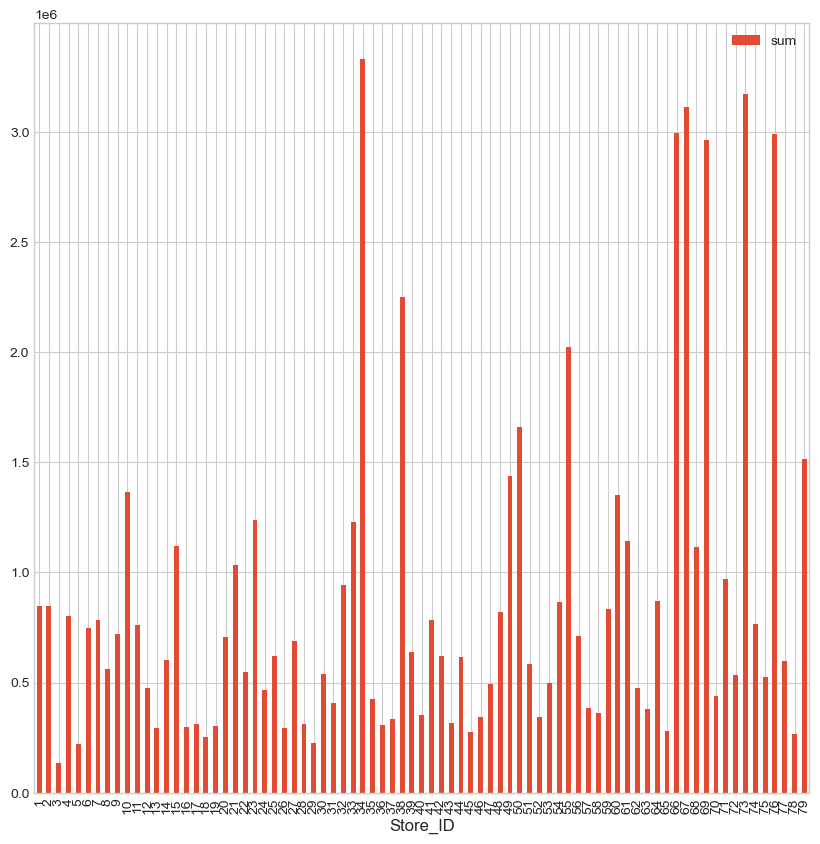

In [149]:
# Graphique avec la valeur du stock par boutique
# Création de la table permettant de créer un graphique
valeur_stock_boutique = pd.DataFrame(data = df_invdeb.groupby(by = 'Store_ID')['Stock_Value'] \
    .agg(['sum']))

# Création du graphique
valeur_stock_boutique.plot.bar(figsize = (10,10))
plt.show()

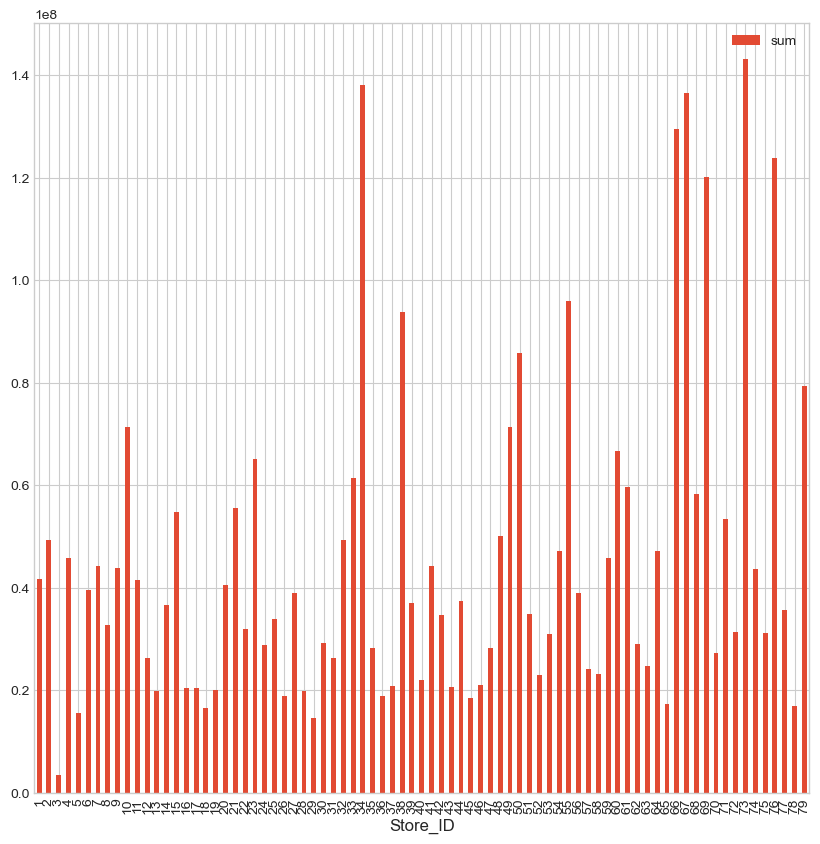

In [150]:
# Graphique avec le volume du stock par boutique
# Création de la table permettant de créer un graphique
volume_stock_boutique = pd.DataFrame(data = df_invdeb.groupby(by = 'Store_ID')['Total_Stock_Volume_(ML)'] \
    .agg(['sum']))

# Création du graphique
volume_stock_boutique.plot.bar(figsize = (10,10))
plt.show()

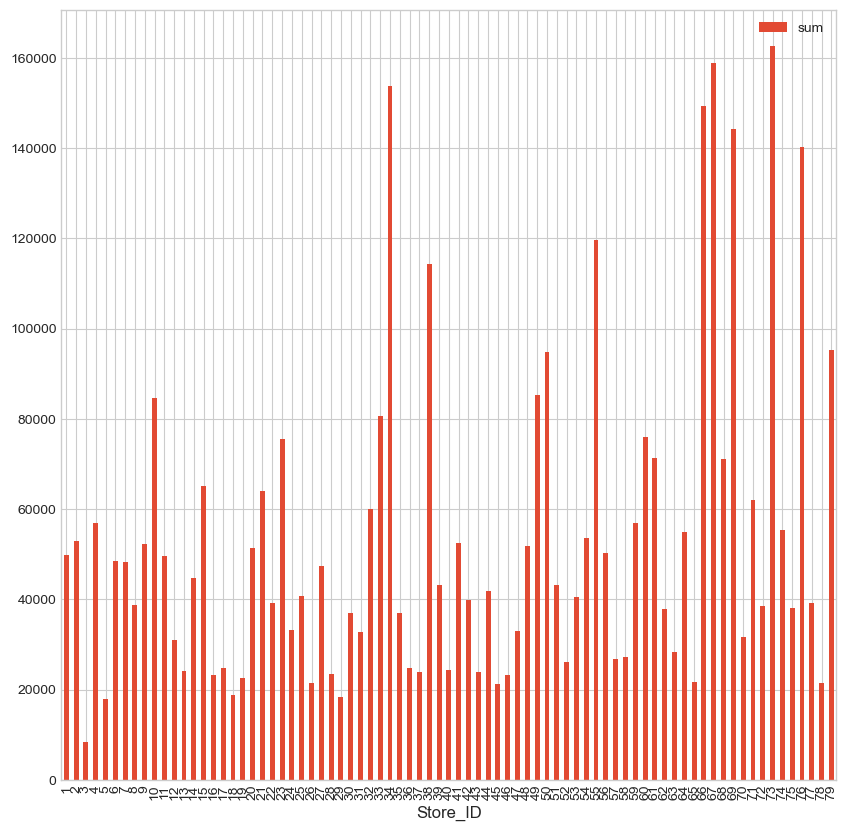

In [151]:
# Graphique avec les nombre de produits en stock par boutique
# Création de la table permettant de créer un graphique
stock_boutique = pd.DataFrame(data = df_invdeb.groupby(by = 'Store_ID')['Stock'] \
    .agg(['sum']))

# Création du graphique
stock_boutique.plot.bar(figsize = (10,10))
plt.show()

## Chapitre 2: Invetaires fin 2016

En soit ça va aller vite parce que c'est exactement la même base de données mais avec des données différentes. On va donc effectuer les même étapes. C'est à la limite un copier coller.

### I) Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

In [152]:
# Importation de la base de onnées
df_invfin = pd.read_csv('Data/EndInvFINAL12312016.csv', parse_dates = ['endDate'])
df_invfin.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [153]:
# Visualisation de comment est structurée la base de données
df_invfin.shape

(224489, 9)

In [154]:
# Visualisation de la fin des données
df_invfin.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31
224488,81_PEMBROKE_90604,81,PEMBROKE,90604,Ch Lynch Bages Pauilac,750mL,2,119.99,2016-12-31


In [155]:
# Visualisation des data types
df_invfin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InventoryId  224489 non-null  object        
 1   Store        224489 non-null  int64         
 2   City         223205 non-null  object        
 3   Brand        224489 non-null  int64         
 4   Description  224489 non-null  object        
 5   Size         224489 non-null  object        
 6   onHand       224489 non-null  int64         
 7   Price        224489 non-null  float64       
 8   endDate      224489 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 15.4+ MB


In [156]:
# Checker s'il existe des valeurs NULL
df_invfin.isna().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [157]:
# Visualisation du df
df_invfin.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [158]:
# description des données
df_invfin.describe()

,Store,Brand,onHand,Price,endDate
count,224489.000000,224489.000000,224489.000000,224489.000000,224489
mean,43.505740,14356.370513,21.763988,23.585583,2016-12-31 00:00:00
min,1.000000,58.000000,0.000000,0.490000,2016-12-31 00:00:00
25%,23.000000,3798.000000,7.000000,9.990000,2016-12-31 00:00:00
50%,44.000000,8259.000000,12.000000,14.990000,2016-12-31 00:00:00
75%,66.000000,23965.000000,22.000000,23.490000,2016-12-31 00:00:00
max,81.000000,90631.000000,3676.000000,13999.900000,2016-12-31 00:00:00
std,23.326415,13118.467851,37.233576,79.202775,NaN


In [159]:
df_invfin['Size'].unique()

array(['750mL', 'Liter', '750mL + 2/', '1.75L', '50mL', '375mL',
       '50mL 4 Pk', '200mL 3 Pk', '50mL 3 Pk', '750mL + 3/', '375mL 2 Pk',
       '100mL 4 Pk', '250mL', '100mL', '50mL 5 Pk', '3/100mL',
       '200mL 4 Pk', '250mL 4 Pk', '200mL', '1.5L', '5L', '4L',
       '187mL 4 Pk', '3L', '5.0 Oz', '187mL 3 Pk', '187mL', '500mL',
       '750mL 3 Pk', '400mL', '300mL', '330mL', '18L', '750mL 2 Pk',
       '5/2 oz', '720mL', '375mL 3 Pk', '750mL + 1/', '180mL',
       '200mL 5 Pk', '6L', '187mL 2 Pk', '750mL 4 Pk', '750mL 6 Pk',
       '750mL + 4/', '25.0', '128.0 Gal'], dtype=object)

## II) Préparation des données

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [160]:
df_invfin.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [161]:
# Renommer les colonnes
df_invfin = df_invfin.rename(columns = {
    'InventoryId' : 'Inventory_ID',
    'Store' : 'Store_ID',
    'Brand' : 'Product_ID',
    'Description' : 'Product_Name',
    'Size' : 'Quantity',
    'onHand' : 'Stock',
    'endDate' : 'Date',
    'Price' : 'Selling_Price_Per_Unit'}).copy()
df_invfin.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Stock,Selling_Price_Per_Unit,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [162]:
# Création d'un base de données temporaire afin d'apporter des modifications sans memttre en danger la base de données originelle
df_temp = df_invfin.copy()

In [163]:
# Création de la colonne volume per unit
df_temp.insert(6, 'Volume_Per_Unit_(ML)', df_temp['Quantity'].values)

In [164]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Stock,Selling_Price_Per_Unit,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,750mL,7,14.99,2016-12-31


In [165]:
# Checker les uniques values
df_temp['Volume_Per_Unit_(ML)'].unique()

array(['750mL', 'Liter', '750mL + 2/', '1.75L', '50mL', '375mL',
       '50mL 4 Pk', '200mL 3 Pk', '50mL 3 Pk', '750mL + 3/', '375mL 2 Pk',
       '100mL 4 Pk', '250mL', '100mL', '50mL 5 Pk', '3/100mL',
       '200mL 4 Pk', '250mL 4 Pk', '200mL', '1.5L', '5L', '4L',
       '187mL 4 Pk', '3L', '5.0 Oz', '187mL 3 Pk', '187mL', '500mL',
       '750mL 3 Pk', '400mL', '300mL', '330mL', '18L', '750mL 2 Pk',
       '5/2 oz', '720mL', '375mL 3 Pk', '750mL + 1/', '180mL',
       '200mL 5 Pk', '6L', '187mL 2 Pk', '750mL 4 Pk', '750mL 6 Pk',
       '750mL + 4/', '25.0', '128.0 Gal'], dtype=object)

In [166]:
# Enlever le strings de volumer per unit
# Ce n'est la méthoode plus optimale, la plus optimale serait une for loop
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == 'Liter', 'Volume_Per_Unit_(ML)'] = 1000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 2/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.75L', 'Volume_Per_Unit_(ML)'] = 1750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 3 PK', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 3/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 100
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL', 'Volume_Per_Unit_(ML)'] = 250
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL', 'Volume_Per_Unit_(ML)'] = 100
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 5 Pk', 'Volume_Per_Unit_(ML)'] = 50
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3/100mL', 'Volume_Per_Unit_(ML)'] = 300
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3L', 'Volume_Per_Unit_(ML)'] = 3000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5.0 Oz', 'Volume_Per_Unit_(ML)'] = 148
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '500mL', 'Volume_Per_Unit_(ML)'] = 500
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 250
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.5L', 'Volume_Per_Unit_(ML)'] = 1500
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5L', 'Volume_Per_Unit_(ML)'] = 5000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '4L', 'Volume_Per_Unit_(ML)'] = 4000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '400mL', 'Volume_Per_Unit_(ML)'] = 400
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '300mL', 'Volume_Per_Unit_(ML)'] = 300
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '330mL', 'Volume_Per_Unit_(ML)'] = 330
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '18L', 'Volume_Per_Unit_(ML)'] = 18000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5/2 oz', 'Volume_Per_Unit_(ML)'] = 74
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '720mL', 'Volume_Per_Unit_(ML)'] = 720
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 375
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 1/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '180mL', 'Volume_Per_Unit_(ML)'] = 180
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 5 Pk', 'Volume_Per_Unit_(ML)'] = 200
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '6L', 'Volume_Per_Unit_(ML)'] = 6000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 187
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 6 Pk', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 4/', 'Volume_Per_Unit_(ML)'] = 750
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '25.0', 'Volume_Per_Unit_(ML)'] = 25000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '128.0 Gal', 'Volume_Per_Unit_(ML)'] = 484533
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 50

In [167]:
df_temp['Volume_Per_Unit_(ML)'].unique()

array([750, 1000, 1750, 50, 375, 200, 100, 250, 300, 1500, 5000, 4000,
       187, 3000, 148, 500, 400, 330, 18000, 74, 720, 180, 6000, 25000,
       484533], dtype=object)

In [168]:
df_temp['Quantity'].unique()

array(['750mL', 'Liter', '750mL + 2/', '1.75L', '50mL', '375mL',
       '50mL 4 Pk', '200mL 3 Pk', '50mL 3 Pk', '750mL + 3/', '375mL 2 Pk',
       '100mL 4 Pk', '250mL', '100mL', '50mL 5 Pk', '3/100mL',
       '200mL 4 Pk', '250mL 4 Pk', '200mL', '1.5L', '5L', '4L',
       '187mL 4 Pk', '3L', '5.0 Oz', '187mL 3 Pk', '187mL', '500mL',
       '750mL 3 Pk', '400mL', '300mL', '330mL', '18L', '750mL 2 Pk',
       '5/2 oz', '720mL', '375mL 3 Pk', '750mL + 1/', '180mL',
       '200mL 5 Pk', '6L', '187mL 2 Pk', '750mL 4 Pk', '750mL 6 Pk',
       '750mL + 4/', '25.0', '128.0 Gal'], dtype=object)

In [169]:
# Modification de certaines valeurs dans la colonne Quantity afin de pouvoir utiliser la fonction créée dans le EDA précedent
df_temp.loc[df_temp['Quantity'] == '3/100mL', 'Quantity'] = '300mL'
df_temp.loc[df_temp['Quantity'] == '5.0 Oz', 'Quantity'] = '148mL'
df_temp.loc[df_temp['Quantity'] == '5/2 oz', 'Quantity'] = '74mL'
df_temp.loc[df_temp['Quantity'] == '128.0 Gal', 'Quantity'] = '484533mL'
df_temp.loc[df_temp['Quantity'] == '25.0', 'Quantity'] = '25000mL'

In [170]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Stock,Selling_Price_Per_Unit,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,750,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,750,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,750,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,750,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,750,7,14.99,2016-12-31


In [171]:
remplacement(df_temp, 'Quantity')

C:\Users\frdi\AppData\Local\Temp\ipykernel_19024\3461201418.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(c, int(1), inplace = True)


In [172]:
df_temp['Quantity'].value_counts()

Quantity
1    222646
4      1193
3       418
2       163
5        68
6         1
Name: count, dtype: int64

In [173]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Stock,Selling_Price_Per_Unit,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,7,14.99,2016-12-31


In [174]:
# Checker les data types
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Inventory_ID            224489 non-null  object        
 1   Store_ID                224489 non-null  int64         
 2   City                    223205 non-null  object        
 3   Product_ID              224489 non-null  int64         
 4   Product_Name            224489 non-null  object        
 5   Quantity                224489 non-null  int64         
 6   Volume_Per_Unit_(ML)    224489 non-null  object        
 7   Stock                   224489 non-null  int64         
 8   Selling_Price_Per_Unit  224489 non-null  float64       
 9   Date                    224489 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 17.1+ MB


In [175]:
df_temp['Volume_Per_Unit_(ML)'].value_counts()

Volume_Per_Unit_(ML)
750       158374
1750       22427
1500       12826
50         11059
375         8439
1000        3783
3000        2647
5000        1673
187         1066
500          539
250          368
4000         336
200          329
300          197
100          196
720           71
148           45
330           38
180           31
400           24
74            10
18000          8
6000           1
25000          1
484533         1
Name: count, dtype: int64

In [176]:
# Changement du data type Volume
df_temp['Volume_Per_Unit_(ML)'] = df_temp['Volume_Per_Unit_(ML)'].astype(int)

In [177]:
# Création de la colonne volume total
df_temp.insert(7, 'Total_Volume_(ML)', df_temp['Volume_Per_Unit_(ML)'].values * df_temp['Quantity'])
df_temp['Total_Volume_(ML)'].unique()

array([   750,   1000,   1500,   1750,     50,    375,    200,    600,
          150,   2250,    400,    250,    100,    300,    800,   5000,
         4000,    748,   3000,    148,    561,    187,    500,    330,
        18000,     74,    720,   1125,    180,   6000,    374,   4500,
        25000, 484533], dtype=int64)

In [178]:
# Checker si cela a bien fonctionner
df_temp[df_temp['Quantity'] == 3]

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Selling_Price_Per_Unit,Date
117,1_HARDERSFIELD_1036,1,HARDERSFIELD,1036,Jameson Trilogy Pack,3,200,600,4,39.99,2016-12-31
120,1_HARDERSFIELD_1065,1,HARDERSFIELD,1065,DiSaronno 3/50mls Pack,3,50,150,1,12.99,2016-12-31
121,1_HARDERSFIELD_1070,1,HARDERSFIELD,1070,Three Olives Vodka w/3 50mls,3,750,2250,26,14.99,2016-12-31
127,1_HARDERSFIELD_1093,1,HARDERSFIELD,1093,Old St Andrew 3 Mini Barrels,3,50,150,16,24.99,2016-12-31
150,1_HARDERSFIELD_1189,1,HARDERSFIELD,1189,Mad River 3 Pack Revolution,3,200,600,10,49.99,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...
219065,79_BALLYMENA_12203,79,BALLYMENA,12203,Cavit Prosecco Lunetta,3,187,561,8,9.99,2016-12-31
220985,81_PEMBROKE_1065,81,PEMBROKE,1065,DiSaronno 3/50mls Pack,3,50,150,2,12.99,2016-12-31
222230,81_PEMBROKE_6477,81,PEMBROKE,6477,Avion Tequila 3/50ml Sampler,3,50,150,8,9.99,2016-12-31
222622,81_PEMBROKE_9116,81,PEMBROKE,9116,KAH Tequila 3/50mLs Pak,3,50,150,14,24.99,2016-12-31


In [179]:
# Création du volume total stocké
df_temp.insert(9, 'Total_Stock_Volume_(ML)', df_temp['Total_Volume_(ML)'] * df_temp['Stock'])
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,11,8250,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,7,5250,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,7,5250,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,4,3000,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,750,7,5250,14.99,2016-12-31


In [180]:
# Création de la valeur total dans chaque ligne
df_temp.insert(11, 'Stock_value', df_temp['Selling_Price_Per_Unit'] * df_temp['Stock'] * df_temp['Quantity'])
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,11,8250,12.99,142.89,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,7,5250,36.99,258.93,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,7,5250,38.99,272.93,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,4,3000,34.99,139.96,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,750,7,5250,14.99,104.93,2016-12-31


In [181]:
# Mal écrit
df_temp.rename(columns = {'Stock_value' : 'Stock_Value'}, inplace = True)

In [182]:
df_temp.groupby(by = 'City')['Stock_Value'] \
    .agg(['sum'])

,sum
City,
ABERDEEN,582124.85
AETHELNEY,1096436.78
ALNERWICK,563826.56
ARBINGTON,1405529.41
ASHBORNE,863050.85
...,...
TARMSWORTH,340717.45
VERITAS,285985.61
WANBORNE,1638215.27


In [183]:
# Check for null values
df_temp.isna().sum()

Inventory_ID                  0
Store_ID                      0
City                       1284
Product_ID                    0
Product_Name                  0
Quantity                      0
Volume_Per_Unit_(ML)          0
Total_Volume_(ML)             0
Stock                         0
Total_Stock_Volume_(ML)       0
Selling_Price_Per_Unit        0
Stock_Value                   0
Date                          0
dtype: int64

In [184]:
# Checker les rangées où les valeurs sont nulls
df_temp[df_temp['City'].isna()]

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,1,750,750,0,0,12.99,0.0,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,1,750,750,0,0,36.99,0.0,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,1,750,750,0,0,38.99,0.0,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,1,750,750,0,0,14.99,0.0,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,1,1000,1000,0,0,4.49,0.0,2016-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,1,750,750,0,0,10.99,0.0,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,1,750,750,0,0,15.99,0.0,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,1,750,750,0,0,9.99,0.0,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,1,750,750,0,0,11.99,0.0,2016-12-31


In [185]:
# Checker si le stock est toujours = à 0
test = df_temp[df_temp['City'].isna()]
test['Stock'].value_counts()

Stock
0    1284
Name: count, dtype: int64

In [186]:
df_temp.shape

(224489, 13)

In [187]:
# Suppression des colonnes NA
df_temp = df_temp[df_temp['City'].notna()]

In [188]:
df_temp.shape

(223205, 13)

## III) Compréhension des caractéristiques

Dans cette section nous allons créer des graphiques démontrat la distribution des caractéristiques.

In [189]:
df_temp.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,11,8250,12.99,142.89,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,7,5250,36.99,258.93,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,7,5250,38.99,272.93,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,4,3000,34.99,139.96,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,750,7,5250,14.99,104.93,2016-12-31


In [190]:
df_invfin = df_temp.copy()

In [191]:
df_invfin.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,11,8250,12.99,142.89,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,7,5250,36.99,258.93,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,7,5250,38.99,272.93,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,4,3000,34.99,139.96,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,750,7,5250,14.99,104.93,2016-12-31


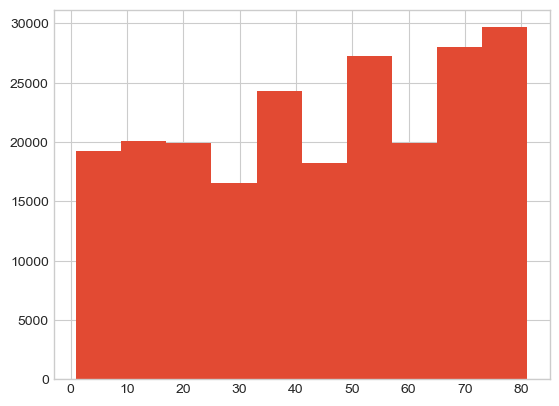

In [192]:
# Nombre de lignes d'inventaire par store id
df_invfin['Store_ID'].hist();

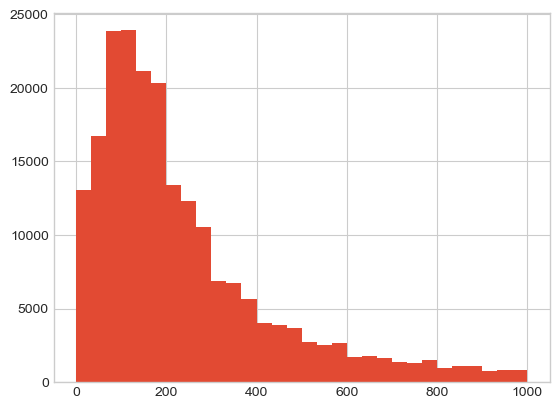

In [193]:
# Histogramme représentatif sans les outliers
hist_stock_value_fin = df_invfin[df_invfin['Stock_Value'] < 1000]
hist_stock_value_fin['Stock_Value'].hist(bins = 30);

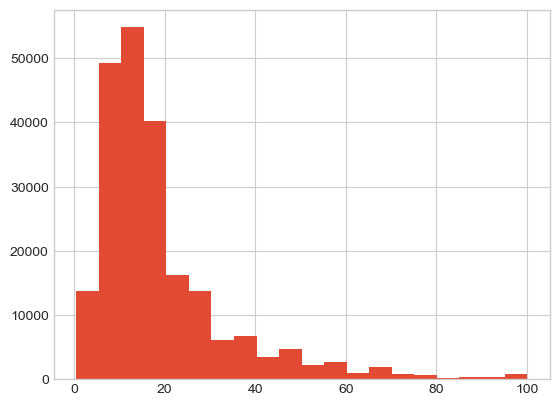

In [194]:
# Distribution du prix de vente sans les outliers
hist_selling_price_fin = df_invfin[df_invfin['Selling_Price_Per_Unit'] < 100]
hist_selling_price_fin['Selling_Price_Per_Unit'].hist(bins = 20);

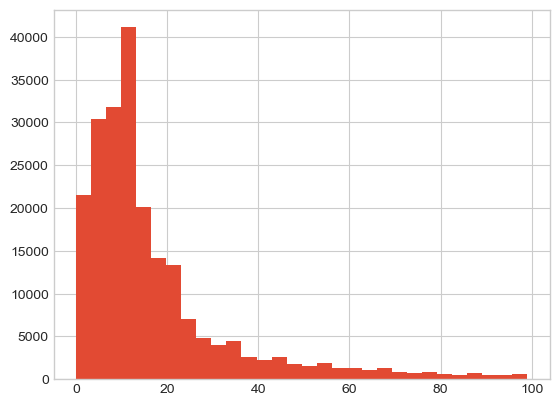

In [195]:
# Distribution du stock disponible sans les outliers
hist_stock_fin = df_invfin[df_invfin['Stock'] < 100]
hist_stock_fin['Stock'].hist(bins = 30);

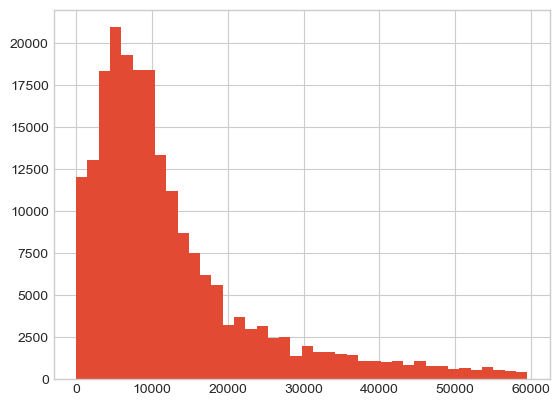

In [196]:
# Total stock volume afin de savoir le volume que prend chaque ligne de stock
total_volume_fin = df_invfin[df_invfin['Total_Stock_Volume_(ML)'] < 60000]
total_volume_fin['Total_Stock_Volume_(ML)'].hist(bins = 40);

## IV) Relations entre les caractéristiques

In [197]:
df_invfin.head()

,Inventory_ID,Store_ID,City,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Stock,Total_Stock_Volume_(ML),Selling_Price_Per_Unit,Stock_Value,Date
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,1,750,750,11,8250,12.99,142.89,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,1,750,750,7,5250,36.99,258.93,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,1,750,750,7,5250,38.99,272.93,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,1,750,750,4,3000,34.99,139.96,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,1,750,750,7,5250,14.99,104.93,2016-12-31


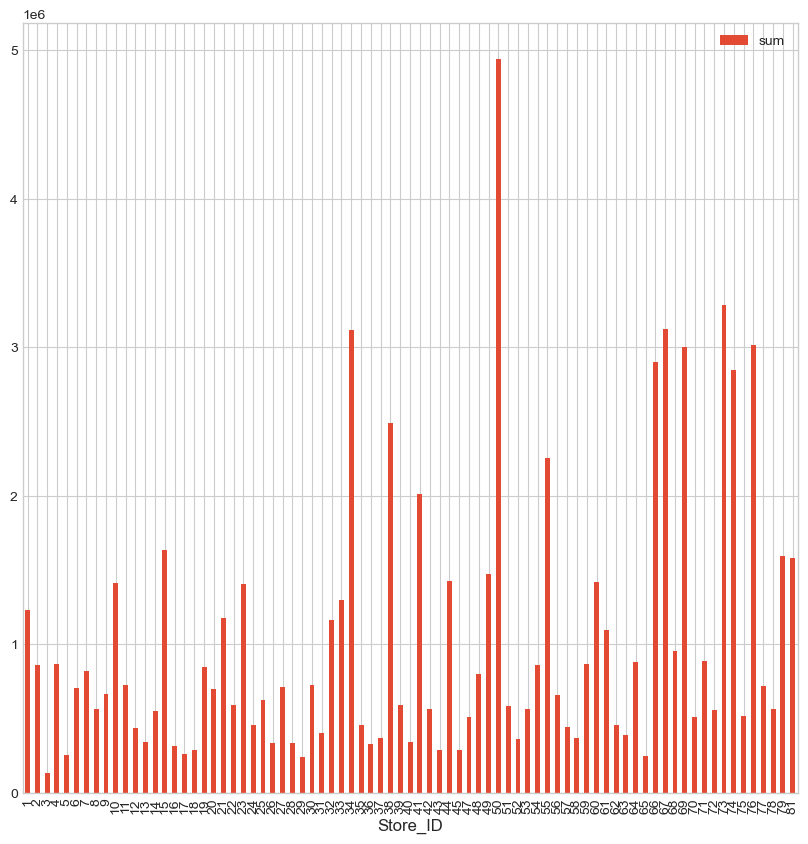

In [198]:
# Graphique avec la valeur du stock par boutique
# Création de la table permettant de créer un graphique
valeur_stock_boutique_fin = pd.DataFrame(data = df_invfin.groupby(by = 'Store_ID')['Stock_Value'] \
    .agg(['sum']))

# Création du graphique
valeur_stock_boutique_fin.plot.bar(figsize = (10,10))
plt.show()

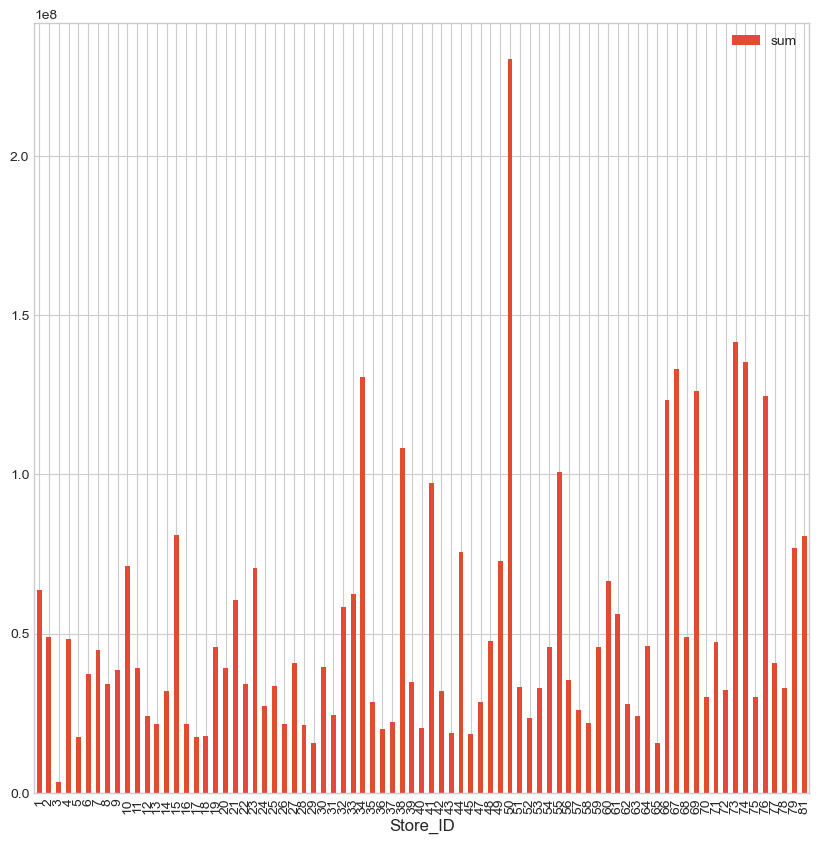

In [199]:
# Graphique avec le volume du stock par boutique
# Création de la table permettant de créer un graphique
volume_stock_boutique_fin = pd.DataFrame(data = df_invfin.groupby(by = 'Store_ID')['Total_Stock_Volume_(ML)'] \
    .agg(['sum']))

# Création du graphique
volume_stock_boutique_fin.plot.bar(figsize = (10,10))
plt.show()

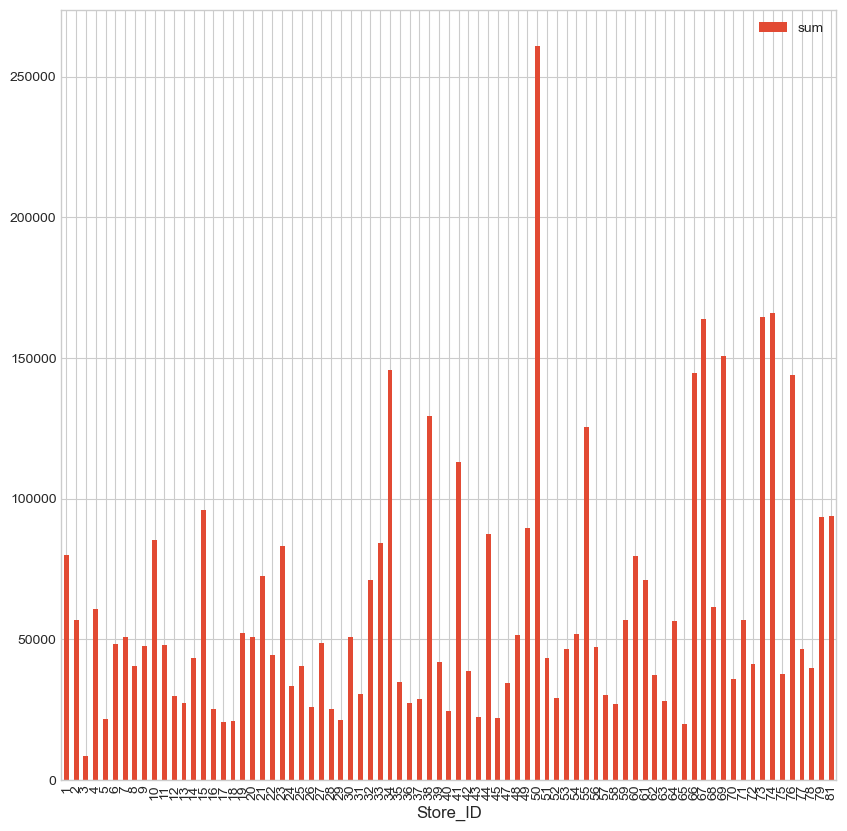

In [200]:
# Graphique avec les nombre de produits en stock par boutique
# Création de la table permettant de créer un graphique
stock_boutique_fin = pd.DataFrame(data = df_invfin.groupby(by = 'Store_ID')['Stock'] \
    .agg(['sum']))

# Création du graphique
stock_boutique_fin.plot.bar(figsize = (10,10))
plt.show()

## Chapitre 3: Relations entre les stocks de début et fin d'année

In [201]:
df_invdeb['Stock_Value'].sum()

68786431.31000124

In [202]:
df_invfin['Stock_Value'].sum()

80610137.91

In [203]:
df_invdeb['Total_Stock_Volume_(ML)'].sum()

3569791748

In [204]:
df_invfin['Total_Stock_Volume_(ML)'].sum()

4048357040

In [205]:
df_invdeb['Stock'].sum()

4219275

In [206]:
df_invfin['Stock'].sum()

4885776

In [207]:
# Création du df
columns = ['Stock_Value', 'Total_Stock_Volume_(ML)', 'Stock']
data = [(68821961, 3569361841, 4219275), (80656751, 4048229576, 4885776)]
comparaison_inventaire = pd.DataFrame(data = data, columns = columns)
comparaison_inventaire

,Stock_Value,Total_Stock_Volume_(ML),Stock
0,68821961,3569361841,4219275
1,80656751,4048229576,4885776


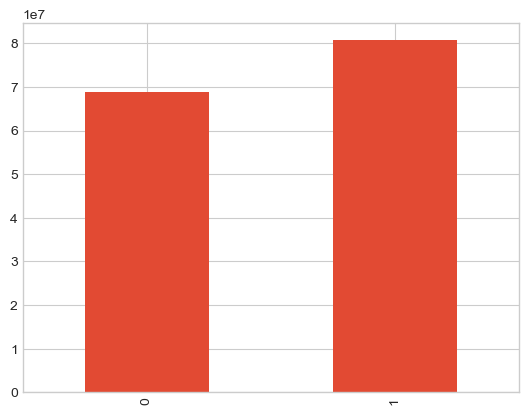

In [208]:
# Graphique pour la valeur de l'inventaire
comparaison_inventaire['Stock_Value'].plot.bar();

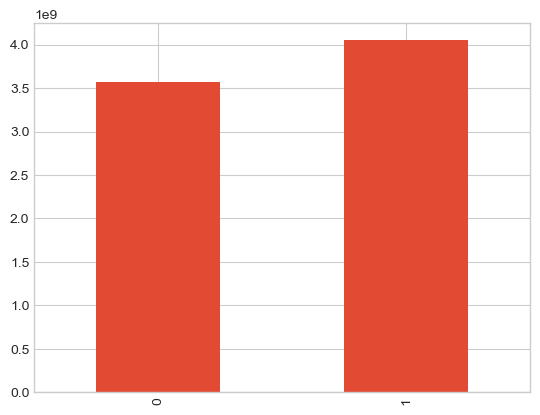

In [209]:
# Graphique pour le volume total d'inventaire
comparaison_inventaire['Total_Stock_Volume_(ML)'].plot.bar();

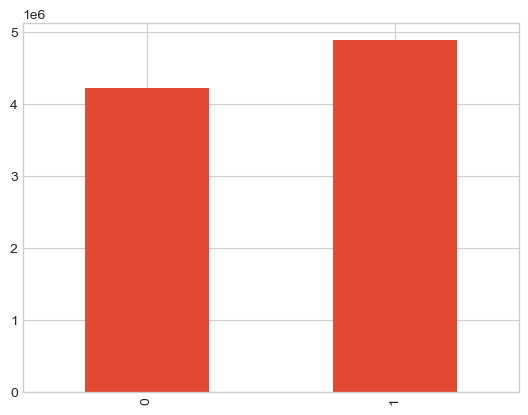

In [210]:
# Graphique pour le stock total 
comparaison_inventaire['Stock'].plot.bar();

## Chapitre 3 : Liste des achats 2016

### I) Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

In [211]:
# Importation de la base de données
df_purfin = pd.read_csv('Data/PurchasesFINAL12312016.csv')

In [212]:
# forme de la base données
df_purfin.shape

(2372474, 16)

In [213]:
# Visualisation de la base de onnées
df_purfin.head(10)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1
5,5_SUTTON_3348,5,3348,Bombay Sapphire Gin,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,22.38,6,134.28,1
6,1_HARDERSFIELD_8358,1,8358,Bacardi 151 Proof,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,14.49,12,173.88,1
7,30_CULCHETH_4903,30,4903,Bacardi Superior Rum,200mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,2.87,48,137.76,1
8,34_PITMERDEN_3782,34,3782,Grey Goose Le Citron Vodka,750mL,480,BACARDI USA INC,8106,2015-12-20,2016-01-02,2016-01-12,2016-02-05,18.89,5,94.45,1
9,1_HARDERSFIELD_4233,1,4233,Castillo Silver Label Rum,1.75L,480,BACARDI USA INC,8106,2015-12-20,2016-01-01,2016-01-12,2016-02-05,7.87,23,181.01,1


In [214]:
# Colonnes présentes
df_purfin.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

Pour la plupart des colonnes, nous connaissons déjà. Nous avons traités les colonnes jusqu'à VendorName dans les précédentes EDA.

De PoNumber à PayDate c'est ce qui traite la facture selon moi.

Ensuite, PurchasePrice, Quantity, Dollars c'est ce qui concerne les informations de la commande.

In [215]:
# Data types
df_purfin.dtypes

InventoryId        object
Store               int64
Brand               int64
Description        object
Size               object
VendorNumber        int64
VendorName         object
PONumber            int64
PODate             object
ReceivingDate      object
InvoiceDate        object
PayDate            object
PurchasePrice     float64
Quantity            int64
Dollars           float64
Classification      int64
dtype: object

De POData à PayData ce son des dates

In [216]:
# Transformation de ces colonnes là
df_purfin = pd.read_csv('Data/PurchasesFINAL12312016.csv', parse_dates = ['PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate'])
df_purfin.dtypes

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
VendorNumber               int64
VendorName                object
PONumber                   int64
PODate            datetime64[ns]
ReceivingDate     datetime64[ns]
InvoiceDate       datetime64[ns]
PayDate           datetime64[ns]
PurchasePrice            float64
Quantity                   int64
Dollars                  float64
Classification             int64
dtype: object

In [217]:
# Visualisation des changements 
df_purfin.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [218]:
# Analyse descriptive de certaines données
df_purfin.describe()

,Store,Brand,VendorNumber,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
count,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06,2372474,2372474,2372474,2372474,2.372474e+06,2.372474e+06,2.372474e+06,2.372474e+06
mean,4.465133e+01,1.241864e+04,6.886436e+03,1.104094e+04,2016-07-04 13:34:14.973836544,2016-07-12 04:28:06.818402048,2016-07-21 01:24:37.535094784,2016-08-25 17:13:18.406053120,1.205005e+01,1.415585e+01,1.356815e+02,1.443520e+00
min,1.000000e+00,5.800000e+01,2.000000e+00,8.106000e+03,2015-12-20 00:00:00,2016-01-01 00:00:00,2016-01-04 00:00:00,2016-02-04 00:00:00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.500000e+01,3.639000e+03,3.252000e+03,9.761000e+03,2016-04-12 00:00:00,2016-04-20 00:00:00,2016-04-29 00:00:00,2016-06-02 00:00:00,6.120000e+00,6.000000e+00,4.926000e+01,1.000000e+00
50%,4.800000e+01,6.523000e+03,4.425000e+03,1.110300e+04,2016-07-07 00:00:00,2016-07-15 00:00:00,2016-07-25 00:00:00,2016-08-29 00:00:00,9.220000e+00,1.000000e+01,8.393000e+01,1.000000e+00
75%,6.700000e+01,1.887700e+04,9.552000e+03,1.239700e+04,2016-09-30 00:00:00,2016-10-07 00:00:00,2016-10-17 00:00:00,2016-11-24 00:00:00,1.449000e+01,1.200000e+01,1.405200e+02,2.000000e+00
max,8.100000e+01,9.063100e+04,2.013590e+05,1.366100e+04,2016-12-23 00:00:00,2016-12-31 00:00:00,2017-01-10 00:00:00,2017-02-19 00:00:00,5.681810e+03,3.816000e+03,5.017570e+04,2.000000e+00
std,2.351245e+01,1.255728e+04,8.066694e+03,1.565340e+03,NaN,NaN,NaN,NaN,1.794510e+01,2.344616e+01,2.816649e+02,4.967999e-01


In [219]:
# Check missing values
df_purfin.isna().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              3
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       0
PayDate           0
PurchasePrice     0
Quantity          0
Dollars           0
Classification    0
dtype: int64

In [220]:
df_purfin.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [221]:
# InventoryId
df_purfin['InventoryId'].describe(), df_purfin['InventoryId'].value_counts(), df_purfin['InventoryId'].unique()

(count               2372474
 unique               245907
 top       73_DONCASTER_8068
 freq                    180
 Name: InventoryId, dtype: object,
 InventoryId
 73_DONCASTER_8068        180
 73_DONCASTER_3545        178
 76_DONCASTER_1233        175
 76_DONCASTER_5364        174
 67_EANVERNESS_3545       171
                         ... 
 56_BEGGAR'S HOLE_3947      1
 39_EASTHALLOW_1927         1
 20_BREDWARDINE_1927        1
 76_DONCASTER_42601         1
 62_KILMARNOCK_24953        1
 Name: count, Length: 245907, dtype: int64,
 array(['69_MOUNTMEND_8412', '30_CULCHETH_5255', '34_PITMERDEN_5215', ...,
        '49_GARIGILL_23860', '60_IRRAGIN_46662', '62_KILMARNOCK_24953'],
       dtype=object))

In [222]:
# Store
df_purfin['Store'].describe(), df_purfin['Store'].value_counts(), df_purfin['Store'].unique()

(count    2.372474e+06
 mean     4.465133e+01
 std      2.351245e+01
 min      1.000000e+00
 25%      2.500000e+01
 50%      4.800000e+01
 75%      6.700000e+01
 max      8.100000e+01
 Name: Store, dtype: float64,
 Store
 76    121123
 73     96794
 38     93412
 34     92113
 66     82699
        ...  
 36      6666
 46      5777
 29      5379
 26      3974
 3       1806
 Name: count, Length: 80, dtype: int64,
 array([69, 30, 34,  1, 76,  5, 78, 22, 38, 67, 50, 15,  7, 18, 47, 54, 52,
        23, 66, 37, 16, 79, 60, 29, 40, 33, 68, 48, 64, 42,  9, 26, 36, 53,
        73, 74, 43, 14, 46, 77, 20, 71, 10, 51, 72, 44,  6, 75, 32, 25, 55,
        49, 61, 12, 31, 13, 41, 56, 63, 28, 59, 24,  8, 27, 62, 19, 17, 21,
        58, 45,  3, 57, 11, 39,  4,  2, 35, 70, 65, 81], dtype=int64))

In [223]:
# Brand
df_purfin['Brand'].describe(), df_purfin['Brand'].value_counts(), df_purfin['Brand'].unique()

(count    2.372474e+06
 mean     1.241864e+04
 std      1.255728e+04
 min      5.800000e+01
 25%      3.639000e+03
 50%      6.523000e+03
 75%      1.887700e+04
 max      9.063100e+04
 Name: Brand, dtype: float64,
 Brand
 8068     7359
 3893     7166
 4261     6774
 1233     6584
 3405     6506
          ... 
 41375       1
 16455       1
 28148       1
 24438       1
 25020       1
 Name: count, Length: 10664, dtype: int64,
 array([ 8412,  5255,  5215, ...,  1073,  1071, 27051], dtype=int64))

In [224]:
# Description
df_purfin['Description'].describe(), df_purfin['Description'].value_counts(), df_purfin['Description'].unique()

(count                   2372474
 unique                     9652
 top       Tito's Handmade Vodka
 freq                      16442
 Name: Description, dtype: object,
 Description
 Tito's Handmade Vodka           16442
 Jack Daniels No 7 Black         14864
 Capt Morgan Spiced Rum          14783
 Absolut 80 Proof                14625
 Bacardi Superior Rum            12808
                                 ...  
 Ch Haut-BrionPessac-Leo Gr C        1
 Toschi Pnt Nr                       1
 B & G Pouilly Fuisse                1
 Ch Godeau St Emilion 10 Cru         1
 Ch de Pierreux Brouilly Rsv         1
 Name: count, Length: 9652, dtype: int64,
 array(['Tequila Ocho Plata Fresno', 'TGI Fridays Ultimte Mudslide',
        'TGI Fridays Long Island Iced', ..., 'Straw Boys Poitin',
        'Straw Boys Vodka', 'Killibinbin Sneaky Shiraz'], dtype=object))

In [225]:
# Size
df_purfin['Size'].describe(), df_purfin['Size'].value_counts(), df_purfin['Size'].unique()

(count     2372471
 unique         51
 top         750mL
 freq      1207700
 Name: Size, dtype: object,
 Size
 750mL         1207700
 1.75L          593298
 1.5L           229841
 50mL            73333
 375mL           70385
 3L              55911
 5L              53490
 Liter           47520
 187mL 4 Pk      12604
 4L               6138
 500mL            5780
 187mL            3086
 250mL 4 Pk       1613
 200mL 4 Pk       1397
 100mL            1287
 187mL 3 Pk       1267
 100mL 4 Pk       1039
 300mL             931
 50mL 4 Pk         843
 200mL             799
 250mL             607
 50mL 5 Pk         563
 750mL + 1/        489
 720mL             327
 5.0 Oz            294
 200mL 3 Pk        249
 18L               226
 50mL 3 Pk         225
 375mL 2 Pk        216
 330mL             183
 750mL + 2/        168
 750mL + 3/        141
 400mL             131
 180mL              89
 3/100mL            79
 750mL 2 Pk         59
 750mL 3 Pk         46
 25.0               36
 375mL 3 Pk     

In [226]:
# VendorNumber
df_purfin['VendorNumber'].describe(), df_purfin['VendorNumber'].value_counts(), df_purfin['VendorNumber'].unique()

(count    2.372474e+06
 mean     6.886436e+03
 std      8.066694e+03
 min      2.000000e+00
 25%      3.252000e+03
 50%      4.425000e+03
 75%      9.552000e+03
 max      2.013590e+05
 Name: VendorNumber, dtype: float64,
 VendorNumber
 3960      243326
 12546     189832
 1392      185574
 4425      176781
 3252      162567
            ...  
 9099           1
 201359         1
 4901           1
 1439           1
 54             1
 Name: count, Length: 126, dtype: int64,
 array([   105,   4466,    388,    480,    516,   2396,   1128,   1189,
          1273,  11567,  90046,   1485,   2876,   4380,   1392,  90047,
          2242,   1590,   3960,   2555,   2450,   2496,   3252,   2561,
          1655,  17031,  90011,   9744,   3924,   3950,  90053,  17032,
         12546,   4550,   4692,  90032,   4848,   4950,   8352,   9552,
         10000,   5455,   4425,   5992,   6213,   8112,   6215,   6355,
          6359,   6785,  10754,  17035,   9206,   7153,  90027,   7154,
          7245,   7255

In [227]:
# VendorName
df_purfin['VendorName'].describe(), df_purfin['VendorName'].value_counts(), df_purfin['VendorName'].unique()

(count                         2372474
 unique                            129
 top       DIAGEO NORTH AMERICA INC   
 freq                           243326
 Name: VendorName, dtype: object,
 VendorName
 DIAGEO NORTH AMERICA INC       243326
 JIM BEAM BRANDS COMPANY        189832
 CONSTELLATION BRANDS INC       185574
 MARTIGNETTI COMPANIES          176487
 E & J GALLO WINERY             162567
                                 ...  
 CAPSTONE INTERNATIONAL              1
 LAUREATE IMPORTS CO                 1
 FLAVOR ESSENCE INC                  1
 TRUETT HURST                        1
 AAPER ALCOHOL & CHEMICAL CO         1
 Name: count, Length: 129, dtype: int64,
 array(['ALTAMAR BRANDS LLC         ', 'AMERICAN VINTAGE BEVERAGE  ',
        'ATLANTIC IMPORTING COMPANY ', 'BACARDI USA INC            ',
        'BANFI PRODUCTS CORP        ', 'BLACK PRINCE DISTILLERY INC',
        'BROWN-FORMAN CORP          ', 'BULLY BOY DISTILLERS       ',
        'CALEDONIA SPIRITS INC      ', 'CAMPARI 

In [228]:
# PONumber
df_purfin['PONumber'].describe(), df_purfin['PONumber'].value_counts(), df_purfin['PONumber'].unique()

(count    2.372474e+06
 mean     1.104094e+04
 std      1.565340e+03
 min      8.106000e+03
 25%      9.761000e+03
 50%      1.110300e+04
 75%      1.239700e+04
 max      1.366100e+04
 Name: PONumber, dtype: float64,
 PONumber
 10936    6108
 13487    5594
 13597    5532
 11300    5532
 11191    5529
          ... 
 9229        1
 9243        1
 12564       1
 12550       1
 8124        1
 Name: count, Length: 5543, dtype: int64,
 array([ 8124,  8137,  8169, ..., 13569, 13661, 13593], dtype=int64))

In [229]:
# PODate
df_purfin['PODate'].describe(), df_purfin['PODate'].value_counts(), df_purfin['PODate'].unique()

(count                          2372474
 mean     2016-07-04 13:34:14.973836544
 min                2015-12-20 00:00:00
 25%                2016-04-12 00:00:00
 50%                2016-07-07 00:00:00
 75%                2016-09-30 00:00:00
 max                2016-12-23 00:00:00
 Name: PODate, dtype: object,
 PODate
 2016-06-27    24752
 2016-12-02    22318
 2016-10-31    21681
 2016-12-23    18285
 2016-05-19    17458
               ...  
 2015-12-22     1196
 2016-10-16     1166
 2015-12-25      947
 2015-12-21      415
 2016-10-24      346
 Name: count, Length: 319, dtype: int64,
 <DatetimeArray>
 ['2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-24 00:00:00',
  '2015-12-20 00:00:00', '2015-12-25 00:00:00', '2015-12-23 00:00:00',
  '2015-12-29 00:00:00', '2015-12-27 00:00:00', '2016-01-01 00:00:00',
  '2015-12-30 00:00:00',
  ...
  '2016-12-13 00:00:00', '2016-12-16 00:00:00', '2016-12-14 00:00:00',
  '2016-12-15 00:00:00', '2016-12-20 00:00:00', '2016-12-21 00:00:00',
  '2016

In [230]:
# ReceivingDate
df_purfin['ReceivingDate'].describe(), df_purfin['ReceivingDate'].value_counts(), df_purfin['ReceivingDate'].unique()

(count                          2372474
 mean     2016-07-12 04:28:06.818402048
 min                2016-01-01 00:00:00
 25%                2016-04-20 00:00:00
 50%                2016-07-15 00:00:00
 75%                2016-10-07 00:00:00
 max                2016-12-31 00:00:00
 Name: ReceivingDate, dtype: object,
 ReceivingDate
 2016-07-05    19640
 2016-09-29    18912
 2016-07-06    15992
 2016-08-17    15845
 2016-12-27    14837
               ...  
 2016-02-28       15
 2016-04-09       15
 2016-05-08       15
 2016-05-14       15
 2016-11-24        1
 Name: count, Length: 364, dtype: int64,
 <DatetimeArray>
 ['2016-01-02 00:00:00', '2016-01-01 00:00:00', '2016-01-03 00:00:00',
  '2016-01-04 00:00:00', '2016-01-07 00:00:00', '2016-01-05 00:00:00',
  '2016-01-08 00:00:00', '2016-01-06 00:00:00', '2016-01-09 00:00:00',
  '2016-01-10 00:00:00',
  ...
  '2016-12-24 00:00:00', '2016-12-22 00:00:00', '2016-12-20 00:00:00',
  '2016-12-23 00:00:00', '2016-12-29 00:00:00', '2016-12-28 00:0

In [231]:
# InvoiceDate
df_purfin['InvoiceDate'].describe(), df_purfin['InvoiceDate'].value_counts(), df_purfin['InvoiceDate'].unique()

(count                          2372474
 mean     2016-07-21 01:24:37.535094784
 min                2016-01-04 00:00:00
 25%                2016-04-29 00:00:00
 50%                2016-07-25 00:00:00
 75%                2016-10-17 00:00:00
 max                2017-01-10 00:00:00
 Name: InvoiceDate, dtype: object,
 InvoiceDate
 2016-08-16    29989
 2016-10-25    25231
 2016-12-19    22080
 2016-09-13    22057
 2016-06-06    22040
               ...  
 2016-03-26      438
 2016-08-20      315
 2016-01-04      148
 2016-05-14      104
 2016-08-05       60
 Name: count, Length: 373, dtype: int64,
 <DatetimeArray>
 ['2016-01-04 00:00:00', '2016-01-07 00:00:00', '2016-01-09 00:00:00',
  '2016-01-12 00:00:00', '2016-01-08 00:00:00', '2016-01-06 00:00:00',
  '2016-01-05 00:00:00', '2016-01-11 00:00:00', '2016-01-10 00:00:00',
  '2016-01-17 00:00:00',
  ...
  '2017-01-02 00:00:00', '2016-12-29 00:00:00', '2017-01-01 00:00:00',
  '2017-01-05 00:00:00', '2017-01-04 00:00:00', '2017-01-06 00:00:00

In [232]:
# PayDate
df_purfin['PayDate'].describe(), df_purfin['PayDate'].value_counts(), df_purfin['PayDate'].unique()

(count                          2372474
 mean     2016-08-25 17:13:18.406053120
 min                2016-02-04 00:00:00
 25%                2016-06-02 00:00:00
 50%                2016-08-29 00:00:00
 75%                2016-11-24 00:00:00
 max                2017-02-19 00:00:00
 Name: PayDate, dtype: object,
 PayDate
 2016-09-10    19713
 2017-02-02    18077
 2016-10-16    17693
 2017-01-21    16964
 2016-08-26    16310
               ...  
 2016-02-08      305
 2016-02-04      259
 2017-02-19      111
 2016-02-07      110
 2017-02-15       70
 Name: count, Length: 382, dtype: int64,
 <DatetimeArray>
 ['2016-02-16 00:00:00', '2016-02-21 00:00:00', '2016-02-05 00:00:00',
  '2016-02-12 00:00:00', '2016-02-06 00:00:00', '2016-02-19 00:00:00',
  '2016-02-04 00:00:00', '2016-02-15 00:00:00', '2016-02-20 00:00:00',
  '2016-02-10 00:00:00',
  ...
  '2017-02-10 00:00:00', '2017-02-06 00:00:00', '2017-02-09 00:00:00',
  '2017-02-18 00:00:00', '2017-02-15 00:00:00', '2017-02-14 00:00:00',
  '20

In [233]:
# PurchasePrice
df_purfin['PurchasePrice'].describe(), df_purfin['PurchasePrice'].value_counts(), df_purfin['PurchasePrice'].unique()

(count    2.372474e+06
 mean     1.205005e+01
 std      1.794510e+01
 min      0.000000e+00
 25%      6.120000e+00
 50%      9.220000e+00
 75%      1.449000e+01
 max      5.681810e+03
 Name: PurchasePrice, dtype: float64,
 PurchasePrice
 5.84      21743
 7.93      18223
 7.68      13385
 9.62      13252
 9.08      13191
           ...  
 85.13         1
 98.68         1
 85.71         1
 234.48        1
 517.00        1
 Name: count, Length: 2151, dtype: int64,
 array([  35.71,    9.35,    9.41, ...,   39.59,   42.46, 2222.21]))

In [234]:
# Quantity
df_purfin['Quantity'].describe(), df_purfin['Quantity'].value_counts(), df_purfin['Quantity'].unique()

(count    2.372474e+06
 mean     1.415585e+01
 std      2.344616e+01
 min      1.000000e+00
 25%      6.000000e+00
 50%      1.000000e+01
 75%      1.200000e+01
 max      3.816000e+03
 Name: Quantity, dtype: float64,
 Quantity
 12      627805
 6       499448
 11      171280
 5       160343
 4       129921
          ...  
 655          1
 1239         1
 577          1
 558          1
 563          1
 Name: count, Length: 686, dtype: int64,
 array([   6,    4,    5,   12,   48,   23,   35,   18,  247,    1,   54,
          84,   39,    9,   29,   10,  263,   11,   21,   14,  155,   24,
         117,   16,    3,   72,   95,   68,   28,   47,    8,    2,   45,
         462,   38,   46,  738,   36,   30,    7,   22,  236,   55,   58,
         118,   20,   60,   73,   83,  299,   25,  120, 1080,   32,   96,
          19,  150,   13,   17,  114,   71,  180,   70,  108,  132,  119,
          15,   33,   26,   59,   50,  112,   64,   65,  107,   62,  110,
          52,   44,   77,   76,   98, 

In [235]:
# Dollars
df_purfin['Dollars'].describe(), df_purfin['Dollars'].value_counts(), df_purfin['Dollars'].unique()

(count    2.372474e+06
 mean     1.356815e+02
 std      2.816649e+02
 min      0.000000e+00
 25%      4.926000e+01
 50%      8.393000e+01
 75%      1.405200e+02
 max      5.017570e+04
 Name: Dollars, dtype: float64,
 Dollars
 39.96       7595
 63.12       7404
 85.68       6978
 78.36       6320
 72.84       5885
             ... 
 9647.06        1
 1018.24        1
 21047.02       1
 4755.24        1
 464.60         1
 Name: count, Length: 33567, dtype: int64,
 array([214.26,  37.4 ,  47.05, ..., 466.14, 418.6 , 464.6 ]))

## II) Préparation des données

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [236]:
df.columns

Index(['Product_ID', 'Product_Name', 'Selling_Price', 'Quantity',
       'Volume_Per_Unit', 'Classification', 'Purchasing_Price', 'Vendor_ID',
       'Vendor_Name'],
      dtype='object')

In [237]:
df_invfin.columns

Index(['Inventory_ID', 'Store_ID', 'City', 'Product_ID', 'Product_Name',
       'Quantity', 'Volume_Per_Unit_(ML)', 'Total_Volume_(ML)', 'Stock',
       'Total_Stock_Volume_(ML)', 'Selling_Price_Per_Unit', 'Stock_Value',
       'Date'],
      dtype='object')

In [238]:
df_purfin.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

In [239]:
# Renommer les colonnes
df_purfin = df_purfin.rename(columns = {
    'InventoryId' : 'Inventory_ID', 
    'Store' : 'Store_ID', 
    'Brand' : 'Product_ID', 
    'Description' : 'Product_Name', 
    'Size' : 'Quantity', 
    'VendorNumber' : 'Vendor_ID',
    'VendorName' : 'Vendor_Name', 
    'PONumber' : 'Purchase_Number', 
    'PODate' : 'Purchase_Date', 
    'ReceivingDate' : 'Receiving_Date', 
    'InvoiceDate' : 'Invoice_Date',
    'PayDate' : 'Pay_Date', 
    'PurchasePrice' : 'Purchasing_Price', 
    'Quantity' : 'Number_Of_Items', 
    'Dollars' : 'Order_Price',
}).copy()
df_purfin.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [240]:
# On ne va pas se servir de la colonnes classification donc on va la drop
df_purfin.drop('Classification', axis = 1, inplace = True)

In [241]:
df_purfin.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60


In [242]:
# Création de la base temporaire car modifications importantes
df_temp = df_purfin.copy()

In [243]:
# Formatage du volume et de la quantité des produits. Même chose que les 3 dernières EDA
df_temp['Quantity'].value_counts()

Quantity
750mL         1207700
1.75L          593298
1.5L           229841
50mL            73333
375mL           70385
3L              55911
5L              53490
Liter           47520
187mL 4 Pk      12604
4L               6138
500mL            5780
187mL            3086
250mL 4 Pk       1613
200mL 4 Pk       1397
100mL            1287
187mL 3 Pk       1267
100mL 4 Pk       1039
300mL             931
50mL 4 Pk         843
200mL             799
250mL             607
50mL 5 Pk         563
750mL + 1/        489
720mL             327
5.0 Oz            294
200mL 3 Pk        249
18L               226
50mL 3 Pk         225
375mL 2 Pk        216
330mL             183
750mL + 2/        168
750mL + 3/        141
400mL             131
180mL              89
3/100mL            79
750mL 2 Pk         59
750mL 3 Pk         46
25.0               36
375mL 3 Pk         34
5/2 oz             11
200mL 5 Pk          9
750mL 4 Pk          8
19.5L               4
6L                  4
20L                 4
2

In [244]:
# Création de la colonne volume 
df_temp.insert(5,'Volume_Per_Unit_(ML)', df_purfin['Quantity'].values)
df_temp['Volume_Per_Unit_(ML)'].value_counts()

Volume_Per_Unit_(ML)
750mL         1207700
1.75L          593298
1.5L           229841
50mL            73333
375mL           70385
3L              55911
5L              53490
Liter           47520
187mL 4 Pk      12604
4L               6138
500mL            5780
187mL            3086
250mL 4 Pk       1613
200mL 4 Pk       1397
100mL            1287
187mL 3 Pk       1267
100mL 4 Pk       1039
300mL             931
50mL 4 Pk         843
200mL             799
250mL             607
50mL 5 Pk         563
750mL + 1/        489
720mL             327
5.0 Oz            294
200mL 3 Pk        249
18L               226
50mL 3 Pk         225
375mL 2 Pk        216
330mL             183
750mL + 2/        168
750mL + 3/        141
400mL             131
180mL              89
3/100mL            79
750mL 2 Pk         59
750mL 3 Pk         46
25.0               36
375mL 3 Pk         34
5/2 oz             11
200mL 5 Pk          9
750mL 4 Pk          8
19.5L               4
6L                  4
20L        

In [245]:
df_temp.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60


In [246]:
df_temp['Volume_Per_Unit_(ML)'].unique()

array(['750mL', '1.75L', '200mL', '1.5L', '50mL', 'Liter', '375mL',
       '100mL', '750mL 2 Pk', '3L', '187mL 4 Pk', '250mL 4 Pk', '500mL',
       '187mL', '100mL 4 Pk', '5L', '4L', '375mL 2 Pk', '187mL 3 Pk',
       '250mL', '180mL', '50mL 5 Pk', '200mL 4 Pk', '5.0 Oz', '18L',
       '300mL', '720mL', '50mL 3 Pk', '50mL 4 Pk', '330mL', '750mL 3 Pk',
       '3/100mL', '750mL + 2/', '750mL 4 Pk', '200mL 3 Pk', '375mL 3 Pk',
       '50mL 12 Pk', '22.0 Oz', '750mL + 3/', '200mL 5 Pk', '750mL + 1/',
       '5/2 oz', '6L', '20L', '400mL', nan, '25.0', '187mL 2 Pk', '19.5L',
       '750mL 6 Pk', '9L', '128.0 Gal'], dtype=object)

In [247]:
# Changement des valeurs à l'intérieur de la colonne volume, toujours pas le plus optimal mais ça fait l'affaire
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == 'nan', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '25.0', 'Volume_Per_Unit_(ML)'] = 25000 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 187 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '19.5L', 'Volume_Per_Unit_(ML)'] = 19500 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 6 Pk', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '9L', 'Volume_Per_Unit_(ML)'] = 9000 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '128.0 Gal', 'Volume_Per_Unit_(ML)'] = 484533 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.75L', 'Volume_Per_Unit_(ML)'] = 1750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL', 'Volume_Per_Unit_(ML)'] = 200 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '1.5L', 'Volume_Per_Unit_(ML)'] = 1500 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL', 'Volume_Per_Unit_(ML)'] = 50 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == 'Liter', 'Volume_Per_Unit_(ML)'] = 1000 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL', 'Volume_Per_Unit_(ML)'] = 375 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL', 'Volume_Per_Unit_(ML)'] = 100 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3L', 'Volume_Per_Unit_(ML)'] = 3000 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 187 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 250 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '500mL', 'Volume_Per_Unit_(ML)'] = 500 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL', 'Volume_Per_Unit_(ML)'] = 187 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '100mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 100
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5L', 'Volume_Per_Unit_(ML)'] = 5000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '4L', 'Volume_Per_Unit_(ML)'] = 4000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 2 Pk', 'Volume_Per_Unit_(ML)'] = 375 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '187mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 187 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '250mL', 'Volume_Per_Unit_(ML)'] = 250 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '180mL', 'Volume_Per_Unit_(ML)'] = 180 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 5 Pk', 'Volume_Per_Unit_(ML)'] = 50 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 200 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5.0 Oz', 'Volume_Per_Unit_(ML)'] = 148
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '18L', 'Volume_Per_Unit_(ML)'] = 18000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '300mL', 'Volume_Per_Unit_(ML)'] = 300 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '720mL', 'Volume_Per_Unit_(ML)'] = 720 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 50 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 50 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '330mL', 'Volume_Per_Unit_(ML)'] = 330 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '3/100mL', 'Volume_Per_Unit_(ML)'] = 300 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 2/', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL 4 Pk', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 200 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '375mL 3 Pk', 'Volume_Per_Unit_(ML)'] = 375 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '50mL 12 Pk', 'Volume_Per_Unit_(ML)'] = 50 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '22.0 Oz', 'Volume_Per_Unit_(ML)'] = 651 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 3/', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '200mL 5 Pk', 'Volume_Per_Unit_(ML)'] = 200 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '750mL + 1/', 'Volume_Per_Unit_(ML)'] = 750 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '5/2 oz', 'Volume_Per_Unit_(ML)'] = 74
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '6L', 'Volume_Per_Unit_(ML)'] = 6000
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '20L', 'Volume_Per_Unit_(ML)'] = 20000 
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'] == '400mL', 'Volume_Per_Unit_(ML)'] = 400 

In [248]:
# Visualisation des valeurs
df_temp['Volume_Per_Unit_(ML)'].value_counts()

Volume_Per_Unit_(ML)
750       1208612
1750       593298
1500       229841
50          74965
375         70635
3000        55911
5000        53490
1000        47520
187         16958
4000         6138
500          5780
200          2454
100          2326
250          2220
300          1010
720           327
148           294
18000         226
330           183
400           131
180            89
25000          36
74             11
6000            4
20000           4
19500           4
651             2
9000            1
484533          1
Name: count, dtype: int64

In [249]:
# Check le data type
df_temp.dtypes

Inventory_ID                    object
Store_ID                         int64
Product_ID                       int64
Product_Name                    object
Quantity                        object
Volume_Per_Unit_(ML)            object
Vendor_ID                        int64
Vendor_Name                     object
Purchase_Number                  int64
Purchase_Date           datetime64[ns]
Receiving_Date          datetime64[ns]
Invoice_Date            datetime64[ns]
Pay_Date                datetime64[ns]
Purchasing_Price               float64
Number_Of_Items                  int64
Order_Price                    float64
dtype: object

In [250]:
df_temp.loc[df_temp['Volume_Per_Unit_(ML)'].isna(), 'Volume_Per_Unit_(ML)'] = '750'

In [251]:
# Changement du dtype
df_temp['Volume_Per_Unit_(ML)'] = df_temp['Volume_Per_Unit_(ML)'].astype(int)

In [252]:
# Changement des valeurs dans quantité
df_temp['Quantity'].unique()

array(['750mL', '1.75L', '200mL', '1.5L', '50mL', 'Liter', '375mL',
       '100mL', '750mL 2 Pk', '3L', '187mL 4 Pk', '250mL 4 Pk', '500mL',
       '187mL', '100mL 4 Pk', '5L', '4L', '375mL 2 Pk', '187mL 3 Pk',
       '250mL', '180mL', '50mL 5 Pk', '200mL 4 Pk', '5.0 Oz', '18L',
       '300mL', '720mL', '50mL 3 Pk', '50mL 4 Pk', '330mL', '750mL 3 Pk',
       '3/100mL', '750mL + 2/', '750mL 4 Pk', '200mL 3 Pk', '375mL 3 Pk',
       '50mL 12 Pk', '22.0 Oz', '750mL + 3/', '200mL 5 Pk', '750mL + 1/',
       '5/2 oz', '6L', '20L', '400mL', nan, '25.0', '187mL 2 Pk', '19.5L',
       '750mL 6 Pk', '9L', '128.0 Gal'], dtype=object)

In [253]:
# Remplacement des valeurs qui vont poser problème dans la fonction "remplacement"
df_temp.loc[df_temp['Quantity'] == '5.0 Oz', 'Quantity'] = '750'
df_temp.loc[df_temp['Quantity'] == '3/100mL', 'Quantity'] = '300mL'
df_temp.loc[df_temp['Quantity'] == '22.0 Oz', 'Quantity'] = '750'
df_temp.loc[df_temp['Quantity'] == '5/2 oz', 'Quantity'] = '750'
df_temp.loc[df_temp['Quantity'].isna(), 'Quantity'] = '750'
df_temp.loc[df_temp['Quantity'] == '128.0 Gal', 'Quantity'] = '750'
df_temp['Quantity'].unique()

array(['750mL', '1.75L', '200mL', '1.5L', '50mL', 'Liter', '375mL',
       '100mL', '750mL 2 Pk', '3L', '187mL 4 Pk', '250mL 4 Pk', '500mL',
       '187mL', '100mL 4 Pk', '5L', '4L', '375mL 2 Pk', '187mL 3 Pk',
       '250mL', '180mL', '50mL 5 Pk', '200mL 4 Pk', '750', '18L', '300mL',
       '720mL', '50mL 3 Pk', '50mL 4 Pk', '330mL', '750mL 3 Pk',
       '750mL + 2/', '750mL 4 Pk', '200mL 3 Pk', '375mL 3 Pk',
       '50mL 12 Pk', '750mL + 3/', '200mL 5 Pk', '750mL + 1/', '6L',
       '20L', '400mL', '25.0', '187mL 2 Pk', '19.5L', '750mL 6 Pk', '9L'],
      dtype=object)

In [254]:
# Remplacement des valeurs via la fonction
remplacementV2(df_temp, 'Quantity')
df_temp['Quantity'].value_counts()

Quantity
1             2351990
4               17504
3                1962
5                 572
2                 444
50mL 12 Pk          1
6                   1
Name: count, dtype: int64

In [255]:
# Modification de 12 Pk
df_temp.loc[df_temp['Quantity'] == '50mL 12 Pk', 'Quantity'] = 12
df_temp['Quantity'].value_counts()

Quantity
1     2351990
4       17504
3        1962
5         572
2         444
12          1
6           1
Name: count, dtype: int64

In [256]:
# Vérification des changements mis en place
df_temp.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60


In [257]:
# Création de la colonne Volume Total 
df_temp.insert(6, 'Total_Volume_(ML)', df_temp['Quantity'] * df_temp['Volume_Per_Unit_(ML)'])
df_temp.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60


In [258]:
# Check si ça marche
df_temp[df_temp['Quantity'] == 3]

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price
5267,67_EANVERNESS_12203,67,12203,Cavit Prosecco Lunetta,3,187,561,6785,PALM BAY INTERNATIONAL INC,8114,2015-12-20,2016-01-02,2016-01-08,2016-02-14,6.84,7,47.88
7488,1_HARDERSFIELD_4105,1,4105,Patron XO Cafe Variety 3 Pak,3,50,150,9165,ULTRA BEVERAGE COMPANY LLP,8203,2015-12-25,2016-01-01,2016-01-07,2016-02-13,5.07,20,101.40
20694,66_EANVERNESS_1065,66,1065,DiSaronno Cavalli Collection,3,50,150,2555,DISARONNO INTERNATIONAL LLC,8237,2015-12-29,2016-01-08,2016-01-12,2016-02-16,10.07,3,30.21
35633,33_HORNSEY_12203,33,12203,Cavit Prosecco Lunetta,3,187,561,6785,PALM BAY INTERNATIONAL INC,8225,2015-12-28,2016-01-08,2016-01-15,2016-02-20,6.84,8,54.72
35722,55_DRY GULCH_12203,55,12203,Cavit Prosecco Lunetta,3,187,561,6785,PALM BAY INTERNATIONAL INC,8225,2015-12-28,2016-01-07,2016-01-15,2016-02-20,6.84,7,47.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371811,10_HORNSEY_25901,10,25901,Cupcake Prosecco,3,187,561,9815,WINE GROUP INC,13661,2016-12-23,2016-12-29,2017-01-09,2017-02-08,6.45,8,51.60
2372023,68_SOLARIS_25901,68,25901,Cupcake Prosecco,3,187,561,9815,WINE GROUP INC,13661,2016-12-23,2016-12-26,2017-01-09,2017-02-08,6.45,8,51.60
2372114,60_IRRAGIN_25901,60,25901,Cupcake Prosecco,3,187,561,9815,WINE GROUP INC,13661,2016-12-23,2016-12-29,2017-01-09,2017-02-08,6.45,7,45.15
2372307,51_ABERDEEN_25901,51,25901,Cupcake Prosecco,3,187,561,9815,WINE GROUP INC,13661,2016-12-23,2016-12-26,2017-01-09,2017-02-08,6.45,8,51.60


In [259]:
# Création du volume total de la commande
df_temp.insert(17, 'Order_Volume_(ML)', df_temp['Number_Of_Items'] * df_temp['Total_Volume_(ML)'])
df_temp.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,3750


In [260]:
# Check les nouveaux data types
df_temp.dtypes

Inventory_ID                    object
Store_ID                         int64
Product_ID                       int64
Product_Name                    object
Quantity                        object
Volume_Per_Unit_(ML)             int32
Total_Volume_(ML)               object
Vendor_ID                        int64
Vendor_Name                     object
Purchase_Number                  int64
Purchase_Date           datetime64[ns]
Receiving_Date          datetime64[ns]
Invoice_Date            datetime64[ns]
Pay_Date                datetime64[ns]
Purchasing_Price               float64
Number_Of_Items                  int64
Order_Price                    float64
Order_Volume_(ML)               object
dtype: object

In [261]:
df_temp.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,3750


## III) Compréhension des caractéristiques

Dans cette section nous allons créer des graphiques démontrat la distribution des caractéristiques.

In [262]:
df_purfin = df_temp.copy()
df_purfin.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,3750


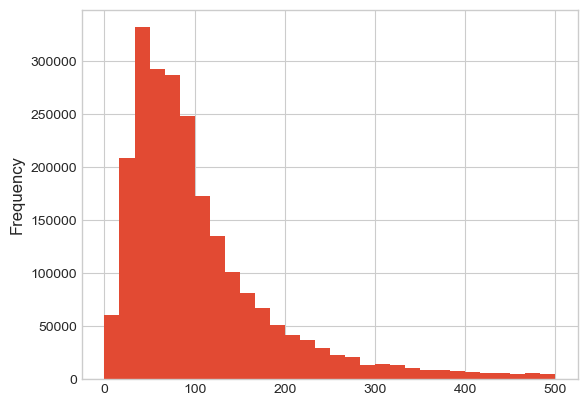

In [263]:
# Distribution des prix de commandes
order_price = df_purfin[df_purfin['Order_Price'] < 500]
order_price['Order_Price'].plot.hist(bins = 30);

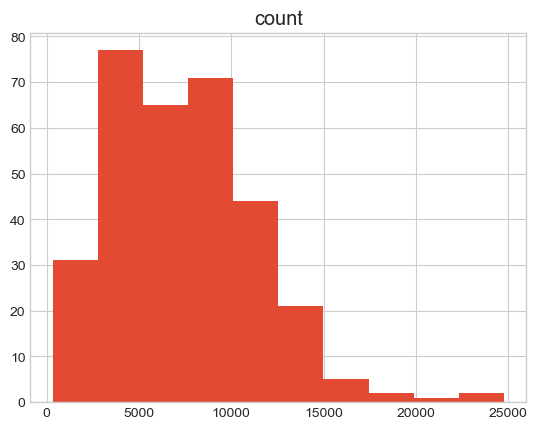

In [264]:
# Distribution du nombre de commandes
nombre_command = df_purfin.groupby(by = 'Purchase_Date')['Pay_Date'] \
    .agg(['count'])
nombre_command.hist();

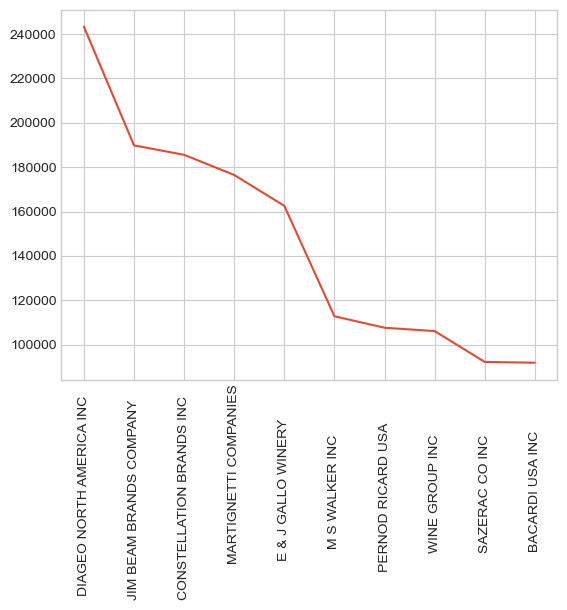

In [265]:
# Nombre de commandes par fournisseur
vendors_order = df_purfin.groupby(by = 'Vendor_Name')['Order_Price'] \
    .agg(['count']) \
    .sort_values('count', ascending = False) \
    .head(10)

vendors_order.reset_index(inplace = True)
plt.plot(vendors_order['Vendor_Name'], vendors_order['count'])
plt.xticks(rotation=90);

## IV) Relations entre les caractéristiques

In [266]:
df_purfin.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,1,750,750,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,4500
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,7000
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,8750
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1,1750,1750,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,10500
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,1,750,750,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,3750


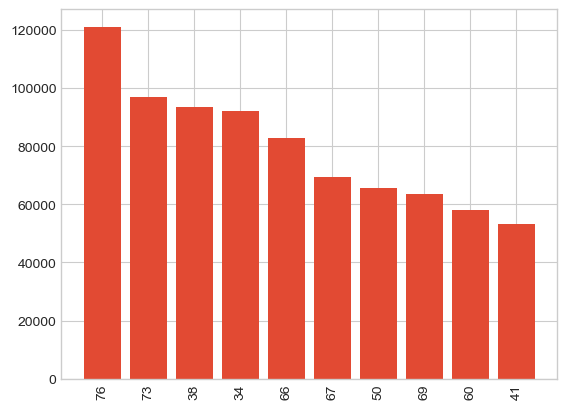

In [267]:
# Graphique du nombre de commandes en fonction de la boutique et de la somme total dépensée
# Création du tableau
boutique = df_purfin.groupby(by = 'Store_ID')['Order_Price'] \
    .agg(['count', 'sum']) \
    .sort_values('count', ascending = False) \
    .head(10)

boutique.reset_index(inplace = True)
boutique['Store_ID'] = boutique['Store_ID'].astype(str)
plt.bar(boutique['Store_ID'], boutique['count'])
plt.xticks(rotation = 90);

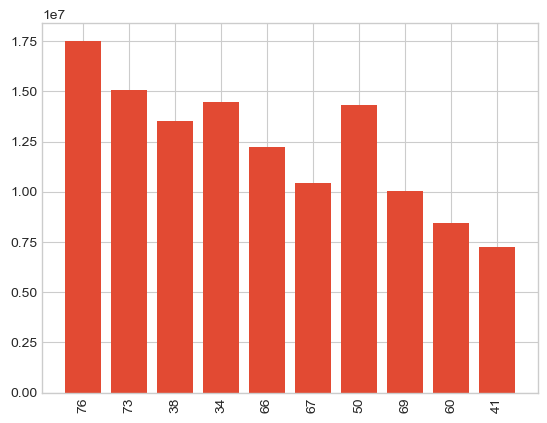

In [268]:
plt.bar(boutique['Store_ID'], boutique['sum'])
plt.xticks(rotation = 90);

### Sous chapitre : Analyse des 8 premiers fournisseurs

In [269]:
df_purfin['Vendor_Name'].unique()

array(['ALTAMAR BRANDS LLC         ', 'AMERICAN VINTAGE BEVERAGE  ',
       'ATLANTIC IMPORTING COMPANY ', 'BACARDI USA INC            ',
       'BANFI PRODUCTS CORP        ', 'BLACK PRINCE DISTILLERY INC',
       'BROWN-FORMAN CORP          ', 'BULLY BOY DISTILLERS       ',
       'CALEDONIA SPIRITS INC      ', 'CAMPARI AMERICA            ',
       'CANDIA VINEYARDS           ', 'CASTLE BRANDS CORP.        ',
       'CENTEUR IMPORTS LLC        ', 'CHARLES JACQUIN ET CIE INC ',
       'CONSTELLATION BRANDS INC   ', 'CRUSH WINES                ',
       'DELICATO VINEYARDS INC     ', 'DIAGEO CHATEAU ESTATE WINES',
       'DIAGEO NORTH AMERICA INC   ', 'DISARONNO INTERNATIONAL LLC',
       'DJINN SPIRITS LLC          ', 'DUGGANS DISTILLED PRODUCTS ',
       'E & J GALLO WINERY         ', 'EDRINGTON AMERICAS         ',
       'FABRIZIA SPIRITS LLC       ', 'FLAG HILL WINERY & VINEYARD',
       'FORTUNE WINE BROKERS LLC   ', 'FREDERICK WILDMAN & SONS   ',
       'HEAVEN HILL DISTILLERIES  

Changement des valeurs concernant le vendeur MARTIGNETTI COMPANIES car il était divisé en deux catégories alors que c'est le même vendeur

In [270]:
df_purfin.loc[df_purfin['Vendor_Name'] == 'MARTIGNETTI COMPANIES ', 'Vendor_Name'] = 'MARTIGNETTI COMPANIES'
df_purfin.loc[df_purfin['Vendor_Name'] == 'MARTIGNETTI COMPANIES']

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
4295,52_GRAYCOTT_17754,52,17754,Chocolate Shop Red,1,750,750,4425,MARTIGNETTI COMPANIES,8160,2015-12-23,2016-01-02,2016-01-06,2016-02-06,8.05,12,96.60,9000
4296,37_PAETHSMOUTH_42735,37,42735,Magnificent Wine Co House Re,1,750,750,4425,MARTIGNETTI COMPANIES,8160,2015-12-23,2016-01-02,2016-01-06,2016-02-06,8.10,12,97.20,9000
4297,25_CAERSHIRE_26181,25,26181,Jaume Serra Cristalino Brut,1,750,750,4425,MARTIGNETTI COMPANIES,8159,2015-12-23,2016-01-03,2016-01-05,2016-02-13,4.57,2,9.14,1500
4298,67_EANVERNESS_25562,67,25562,Elvio Cogno Barolo Ravera,1,750,750,4425,MARTIGNETTI COMPANIES,8159,2015-12-23,2016-01-02,2016-01-05,2016-02-13,45.75,18,823.50,13500
4299,69_MOUNTMEND_25337,69,25337,Ch Francs Brdx CdFrancs,1,750,750,4425,MARTIGNETTI COMPANIES,8159,2015-12-23,2016-01-02,2016-01-05,2016-02-13,11.18,36,402.48,27000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350308,15_WANBORNE_523,15,523,Castello Del Poggio Moscato,1,750,750,4425,MARTIGNETTI COMPANIES,13652,2016-12-23,2016-12-29,2017-01-09,2017-02-18,7.09,12,85.08,9000
2350309,61_AETHELNEY_11219,61,11219,Josh Cellars Cab Svgn Sonoma,1,750,750,4425,MARTIGNETTI COMPANIES,13652,2016-12-23,2016-12-28,2017-01-09,2017-02-18,8.44,34,286.96,25500
2350310,49_GARIGILL_44944,49,44944,Sanford Santa Rita Pnt Nr,1,750,750,4425,MARTIGNETTI COMPANIES,13652,2016-12-23,2016-12-27,2017-01-09,2017-02-18,14.93,12,179.16,9000
2350311,76_DONCASTER_19948,76,19948,Josh Cellars Pnt Nr,1,750,750,4425,MARTIGNETTI COMPANIES,13652,2016-12-23,2016-12-28,2017-01-09,2017-02-18,10.06,12,120.72,9000


In [271]:
vendors_order

,Vendor_Name,count
0,DIAGEO NORTH AMERICA INC,243326
1,JIM BEAM BRANDS COMPANY,189832
2,CONSTELLATION BRANDS INC,185574
3,MARTIGNETTI COMPANIES,176487
4,E & J GALLO WINERY,162567
5,M S WALKER INC,112792
6,PERNOD RICARD USA,107612
7,WINE GROUP INC,106106
8,SAZERAC CO INC,92210
9,BACARDI USA INC,91846


In [272]:
df_purfin['Vendor_Name'].unique()

array(['ALTAMAR BRANDS LLC         ', 'AMERICAN VINTAGE BEVERAGE  ',
       'ATLANTIC IMPORTING COMPANY ', 'BACARDI USA INC            ',
       'BANFI PRODUCTS CORP        ', 'BLACK PRINCE DISTILLERY INC',
       'BROWN-FORMAN CORP          ', 'BULLY BOY DISTILLERS       ',
       'CALEDONIA SPIRITS INC      ', 'CAMPARI AMERICA            ',
       'CANDIA VINEYARDS           ', 'CASTLE BRANDS CORP.        ',
       'CENTEUR IMPORTS LLC        ', 'CHARLES JACQUIN ET CIE INC ',
       'CONSTELLATION BRANDS INC   ', 'CRUSH WINES                ',
       'DELICATO VINEYARDS INC     ', 'DIAGEO CHATEAU ESTATE WINES',
       'DIAGEO NORTH AMERICA INC   ', 'DISARONNO INTERNATIONAL LLC',
       'DJINN SPIRITS LLC          ', 'DUGGANS DISTILLED PRODUCTS ',
       'E & J GALLO WINERY         ', 'EDRINGTON AMERICAS         ',
       'FABRIZIA SPIRITS LLC       ', 'FLAG HILL WINERY & VINEYARD',
       'FORTUNE WINE BROKERS LLC   ', 'FREDERICK WILDMAN & SONS   ',
       'HEAVEN HILL DISTILLERIES  

In [273]:
# Création d'une base de données avec les 8 premiers fournisseurs
top8= df_purfin.loc[(df_purfin['Vendor_Name'] == 'DIAGEO NORTH AMERICA INC   ') | 
                    (df_purfin['Vendor_Name'] == 'JIM BEAM BRANDS COMPANY    ') |
                    (df_purfin['Vendor_Name'] == 'CONSTELLATION BRANDS INC   ') |
                    (df_purfin['Vendor_Name'] == 'MARTIGNETTI COMPANIES') |
                    (df_purfin['Vendor_Name'] == 'E & J GALLO WINERY         ') |
                    (df_purfin['Vendor_Name'] == 'M S WALKER INC             ') |
                    (df_purfin['Vendor_Name'] == 'PERNOD RICARD USA          ') |
                    (df_purfin['Vendor_Name'] == 'WINE GROUP INC             ')]

In [274]:
top8.head()

,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Vendor_ID,Vendor_Name,Purchase_Number,Purchase_Date,Receiving_Date,Invoice_Date,Pay_Date,Purchasing_Price,Number_Of_Items,Order_Price,Order_Volume_(ML)
852,38_GOULCREST_7254,38,7254,Cribari Marsala,1,750,750,1392,CONSTELLATION BRANDS INC,8108,2015-12-20,2016-01-01,2016-01-11,2016-02-10,5.36,12,64.32,9000
853,30_CULCHETH_38502,30,38502,Ruffino Lumina Pnt Grigio,1,750,750,1392,CONSTELLATION BRANDS INC,8108,2015-12-20,2016-01-01,2016-01-11,2016-02-10,4.57,12,54.84,9000
854,16_LUNDY_17748,16,17748,Black Box Pnt Grigio,1,500,500,1392,CONSTELLATION BRANDS INC,8108,2015-12-20,2016-01-03,2016-01-11,2016-02-10,2.75,12,33.00,6000
855,15_WANBORNE_6650,15,6650,Simi Chard,1,750,750,1392,CONSTELLATION BRANDS INC,8108,2015-12-20,2016-01-01,2016-01-11,2016-02-10,7.38,36,265.68,27000
856,15_WANBORNE_19486,15,19486,Franciscan Equilibrium White,1,750,750,1392,CONSTELLATION BRANDS INC,8108,2015-12-20,2016-01-01,2016-01-11,2016-02-10,11.76,6,70.56,4500


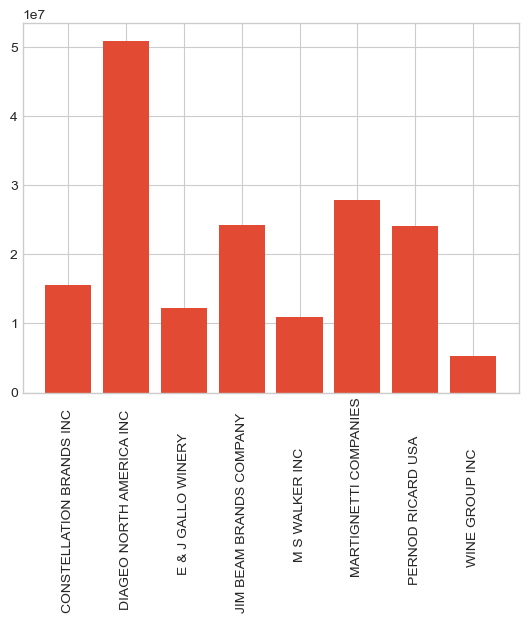

In [275]:
# Graphique concernant les prix de commande
# Création du tableau
top8_prix = top8.groupby(by = 'Vendor_Name')['Order_Price'].agg(['sum'])
top8_prix.reset_index(inplace = True)

plt.bar(top8_prix['Vendor_Name'], top8_prix['sum'])
plt.xticks(rotation = 90);

## Chapitre 4: Ventes 2016

### I) Compréhension des données

* Dataframe shape
* Head and tail
* Dtypes
* Describe

In [276]:
# Importation de la base de données
df_sales = pd.read_csv('Data/SalesFINAL12312016.csv')

In [277]:
# forme du dataframe
df_sales.shape

(1048575, 14)

In [278]:
df_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [279]:
# Importation de la base de données avec les dates au bon format
df_sales = pd.read_csv('Data/SalesFINAL12312016.csv', parse_dates = ['SalesDate'])

In [280]:
# Data types
df_sales.dtypes

InventoryId               object
Store                      int64
Brand                      int64
Description               object
Size                      object
SalesQuantity              int64
SalesDollars             float64
SalesPrice               float64
SalesDate         datetime64[ns]
Volume                     int64
Classification             int64
ExciseTax                float64
VendorNo                   int64
VendorName                object
dtype: object

In [281]:
# Description de la base
df_sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,2016-01-19 21:59:18.574636288,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,2016-01-01 00:00:00,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,2016-01-10 00:00:00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,2016-01-19 00:00:00,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,2016-01-28 00:00:00,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2016-02-29 00:00:00,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,NaN,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03


In [282]:
# Missing values
df_sales.isna().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     0
SalesDollars      0
SalesPrice        0
SalesDate         0
Volume            0
Classification    0
ExciseTax         0
VendorNo          0
VendorName        0
dtype: int64

In [283]:
df_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [284]:
df_sales['InventoryId'].value_counts()

InventoryId
13_TARMSWORTH_8064       57
13_TARMSWORTH_3837       56
14_BROMWICH_8910         56
13_TARMSWORTH_1892       56
10_HORNSEY_4798          56
                         ..
56_BEGGAR'S HOLE_5462     1
15_WANBORNE_38103         1
56_BEGGAR'S HOLE_5507     1
56_BEGGAR'S HOLE_5525     1
55_DRY GULCH_6638         1
Name: count, Length: 170131, dtype: int64

In [285]:
df_sales['Store'].value_counts()

Store
15    38637
10    35130
1     34975
34    33780
76    32456
      ...  
36     3690
37     3419
29     2639
26     1798
3      1219
Name: count, Length: 79, dtype: int64

In [286]:
df_sales['Brand'].value_counts()

Brand
3606     2077
8111     2064
1892     2016
4261     1969
5111     1962
         ... 
11774       1
1173        1
13478       1
44394       1
18948       1
Name: count, Length: 7658, dtype: int64

In [287]:
df_sales['Description'].value_counts()

Description
Smirnoff 80 Proof               7123
Capt Morgan Spiced Rum          7057
Jack Daniels No 7 Black         7014
Jagermeister Liqueur            6763
Kahlua                          6527
                                ... 
Dom Poujol Rose Coteaux du         1
Loft Chard                         1
44* North Magic Valley Vodka       1
Il Poggione Rosso Franceschi       1
Austin Hope 10 Syrah               1
Name: count, Length: 6890, dtype: int64

In [288]:
df_sales['Size'].value_counts()

Size
750mL         593098
1.75L         172222
50mL          101816
1.5L           67189
375mL          52659
Liter          18946
5L             12362
3L             11005
187mL 4 Pk      2906
500mL           2543
200mL           2267
100mL           2238
4L              1486
50mL 5 Pk       1411
187mL           1234
100mL 4 Pk       988
50mL 4 Pk        725
750mL 2 Pk       420
300mL            414
50mL 3 Pk        384
3/100mL          356
200mL 4 Pk       309
5.0 Oz           223
187mL 3 Pk       204
250mL 4 Pk       175
375mL 2 Pk       175
720mL            170
330mL            122
750mL + 2/       107
250mL            105
200mL 3 Pk        86
180mL             55
750mL 3 Pk        49
750mL + 3/        48
18L               27
50mL 12 Pk        21
375mL 3 Pk        18
750mL 4 Pk         8
22.0 Oz            3
20L                1
Name: count, dtype: int64

In [289]:
df_sales['SalesQuantity'].value_counts()

SalesQuantity
1      602910
2      210212
3       83221
4       47634
5       24668
        ...  
78          1
143         1
137         1
135         1
243         1
Name: count, Length: 141, dtype: int64

In [290]:
df_sales['SalesDollars'].value_counts()

SalesDollars
9.99       56393
10.99      35956
12.99      34011
13.99      29784
14.99      29682
           ...  
701.61         1
2375.01        1
62.51          1
1099.50        1
281.88         1
Name: count, Length: 3426, dtype: int64

In [291]:
df_sales['SalesPrice'].value_counts()

SalesPrice
9.99      99359
10.99     59269
12.99     56127
0.99      53486
11.99     47838
          ...  
999.99        1
439.99        1
699.99        1
654.99        1
178.99        1
Name: count, Length: 273, dtype: int64

In [292]:
df_sales['SalesDate'].value_counts()

SalesDate
2016-01-29    54142
2016-01-30    47256
2016-01-23    44792
2016-01-22    44276
2016-01-15    43946
2016-01-09    43639
2016-01-16    41359
2016-01-08    41249
2016-01-02    38449
2016-01-21    30204
2016-01-31    30164
2016-01-28    29699
2016-01-17    29329
2016-01-14    28649
2016-01-24    27798
2016-01-07    27027
2016-01-27    24352
2016-01-01    24282
2016-01-20    24146
2016-01-06    23277
2016-01-03    23217
2016-01-13    23213
2016-01-12    23116
2016-01-18    22575
2016-01-10    22487
2016-01-19    22325
2016-01-26    22149
2016-01-11    21353
2016-01-25    19928
2016-01-05    19614
2016-01-04    19584
2016-02-12     6218
2016-02-13     6176
2016-02-06     5891
2016-02-19     5752
2016-02-26     5515
2016-02-27     5414
2016-02-20     5227
2016-02-05     4876
2016-02-11     4047
2016-02-18     3652
2016-02-04     3599
2016-02-25     3566
2016-02-07     3540
2016-02-14     3465
2016-02-17     3288
2016-02-23     3230
2016-02-10     3117
2016-02-28     3109
2016-02-02

In [293]:
df_sales['Volume'].value_counts()

Volume
750      593730
1750     172222
50       104357
1500      67189
375       52852
1000      18946
5000      12362
3000      11005
187        4344
100        3226
200        2662
500        2543
4000       1486
300         770
250         280
150         223
720         170
330         122
180          55
18000        27
650           3
20000         1
Name: count, dtype: int64

In [294]:
df_sales['ExciseTax'].value_counts()

ExciseTax
0.79      196877
0.11      189592
0.22      107235
1.84       93605
1.57       48871
           ...  
101.59         1
185.59         1
159.86         1
89.77          1
191.36         1
Name: count, Length: 468, dtype: int64

In [295]:
df_sales['VendorNo'].value_counts()

VendorNo
3960      125869
12546      94057
4425       76625
1392       70792
3252       65240
           ...  
172662         1
9710           1
1265           1
2              1
1002           1
Name: count, Length: 116, dtype: int64

In [296]:
df_sales['VendorName'].value_counts()

VendorName
DIAGEO NORTH AMERICA INC                   125869
JIM BEAM BRANDS COMPANY                     94057
MARTIGNETTI COMPANIES                       76251
CONSTELLATION BRANDS INC                    70792
E & J GALLO WINERY                          65240
                                            ...  
WHYTE & MACKAY                                  1
BLACK ROCK SPIRITS LLC                          1
SWEETWATER FARM                                 1
IRA GOLDMAN AND WILLIAMS, LLP                   1
BERNIKO LLC                                     1
Name: count, Length: 117, dtype: int64

### II) Préparation des données

* Enlever des colonnes ou rangées inutiles s'il y en a
* Identifier les doublons
* Renommer des colonnes
* Créer des caractéristiques s'il le faut

In [297]:
df_sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [298]:
# Création d'une base de données temporaire afin de faire les changements
df_temp = df_sales.copy() 

In [299]:
# Réorganiser les colonnes
# Volume
df_temp.insert(5, 'Volume_Per_Unit_(ML)', df_temp['Volume'].values)
df_temp.drop('Volume', axis = 1, inplace = True)

# SalesPrice
df_temp.insert(7, 'Selling_Price', df_temp['SalesPrice'].values)
df_temp.drop('SalesPrice', axis = 1, inplace = True)

# Sales_date
df_temp.insert(0, 'Purchase_Date', df_temp['SalesDate'].values)
df_temp.drop('SalesDate', axis = 1, inplace = True)

In [300]:
# Renommer les colonnes
df_temp = df_temp.rename(columns = {
    'InventoryId' : 'Inventory_ID',
    'Store' : 'Store_ID',
    'Brand' : 'Product_ID',
    'Description' : 'Product_Name',
    'Size' : 'Quantity',
    'SalesQuantity': 'Purchase_Quantity',
    'SalesDollars' : 'Purchase_Amount',
    'ExciseTax' : 'Excise_Tax',
    'VendorNo' : 'Vendor_ID',
    'VendorName' : 'Vendor_Name'
}).copy()
df_temp.head()

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Classification,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,16.49,16.49,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-02,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,2,16.49,32.98,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,2016-01-03,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,16.49,16.49,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,2016-01-08,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,14.49,14.49,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,2016-01-09,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,375,2,34.99,69.98,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [301]:
# Drop de la colonne qui ne sert à rien
df_temp.drop('Classification', axis = 1, inplace = True)
df_temp.head()

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-02,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,2,16.49,32.98,1.57,12546,JIM BEAM BRANDS COMPANY
2,2016-01-03,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
3,2016-01-08,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,14.49,14.49,0.79,12546,JIM BEAM BRANDS COMPANY
4,2016-01-09,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,375,2,34.99,69.98,0.79,12546,JIM BEAM BRANDS COMPANY


In [302]:
# Réordonner la base de données en fonction du jour
df_temp.sort_values(by = 'Purchase_Date', inplace = True)
df_temp.reset_index(inplace = True)
df_temp.drop('index', axis = 1, inplace = True)
df_temp

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1.5L,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1.5L,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,750mL,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,750mL,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2016-02-29,17_OLDHAM_36771,17,36771,Yellow Tail Merlot Ausl,1.5L,1500,2,8.95,17.90,0.45,4425,MARTIGNETTI COMPANIES
1048571,2016-02-29,16_LUNDY_26463,16,26463,Ravenswood Vints Blend Znfdl,750mL,750,1,7.99,7.99,0.11,1392,CONSTELLATION BRANDS INC
1048572,2016-02-29,10_HORNSEY_18106,10,18106,Barefoot Cellars Pink Moscat,1.5L,1500,2,11.99,23.98,0.45,3252,E & J GALLO WINERY
1048573,2016-02-29,1_HARDERSFIELD_14701,1,14701,Cupcake Red Velvet,750mL,750,6,7.99,47.94,0.68,9815,WINE GROUP INC


In [303]:
# Changement de quantity
df_temp['Quantity'].unique()

array(['750mL', '1.5L', '375mL', '1.75L', '3L', '50mL', '187mL 4 Pk',
       '500mL', '50mL 4 Pk', 'Liter', '200mL', '100mL 4 Pk', '5L',
       '100mL', '187mL', '300mL', '50mL 5 Pk', '375mL 2 Pk', '187mL 3 Pk',
       '750mL 2 Pk', '50mL 3 Pk', '5.0 Oz', '250mL 4 Pk', '720mL',
       '3/100mL', '4L', '330mL', '750mL + 2/', '200mL 4 Pk', '750mL + 3/',
       '750mL 3 Pk', '50mL 12 Pk', '200mL 3 Pk', '18L', '180mL', '250mL',
       '375mL 3 Pk', '22.0 Oz', '750mL 4 Pk', '20L'], dtype=object)

In [304]:
# Modification des valeurs qui vont poser problème
df_temp.loc[df_temp['Quantity'] == 'Liter', 'Quantity'] = '750mL'
df_temp.loc[df_temp['Quantity'] == '3/100mL', 'Quantity'] = '300mL'
df_temp.loc[df_temp['Quantity'] == '5.0 Oz', 'Quantity'] = '148mL'
df_temp.loc[df_temp['Quantity'] == '22.0 Oz', 'Quantity'] = '651mL'
df_temp['Quantity'].unique()

array(['750mL', '1.5L', '375mL', '1.75L', '3L', '50mL', '187mL 4 Pk',
       '500mL', '50mL 4 Pk', '200mL', '100mL 4 Pk', '5L', '100mL',
       '187mL', '300mL', '50mL 5 Pk', '375mL 2 Pk', '187mL 3 Pk',
       '750mL 2 Pk', '50mL 3 Pk', '148mL', '250mL 4 Pk', '720mL', '4L',
       '330mL', '750mL + 2/', '200mL 4 Pk', '750mL + 3/', '750mL 3 Pk',
       '50mL 12 Pk', '200mL 3 Pk', '18L', '180mL', '250mL', '375mL 3 Pk',
       '651mL', '750mL 4 Pk', '20L'], dtype=object)

In [305]:
df_temp.loc[df_temp['Quantity'] == '50mL 12 Pk']

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
10911,2016-01-01,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,2,9.99,19.98,0.10,8352,LUXCO INC
32962,2016-01-02,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,4,9.99,39.96,0.21,8352,LUXCO INC
52981,2016-01-02,3_HORNSEY_1007,3,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
66164,2016-01-03,72_HARDERSFIELD_1007,72,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
103678,2016-01-04,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
108929,2016-01-05,53_HILLFAR_1007,53,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
137097,2016-01-06,4_EANVERNESS_1007,4,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
242729,2016-01-09,25_CAERSHIRE_1007,25,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
254791,2016-01-09,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC
283021,2016-01-11,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,50mL 12 Pk,50,1,9.99,9.99,0.05,8352,LUXCO INC


In [306]:
remplacementV2(df_temp, 'Quantity')
df_temp['Quantity'].value_counts()

Quantity
1             1040541
4                5111
5                1411
3                 789
2                 702
50mL 12 Pk         21
Name: count, dtype: int64

In [307]:
# Modification de 12 Pk
df_temp.loc[df_temp['Quantity'] == '50mL 12 Pk', 'Quantity'] = 12
df_temp['Quantity'].value_counts()

Quantity
1     1040541
4        5111
5        1411
3         789
2         702
12         21
Name: count, dtype: int64

In [308]:
df_temp.head()

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC


In [309]:
# Création de volume total (le classico)
df_temp.insert(7, 'Total_Volume_(ML)', df_temp['Quantity'] * df_temp['Volume_Per_Unit_(ML)'])
df_temp.head()

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC


In [310]:
# Vérif
df_temp.loc[df_temp['Quantity'] == 12]

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
10911,2016-01-01,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,12,50,600,2,9.99,19.98,0.10,8352,LUXCO INC
32962,2016-01-02,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,12,50,600,4,9.99,39.96,0.21,8352,LUXCO INC
52981,2016-01-02,3_HORNSEY_1007,3,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
66164,2016-01-03,72_HARDERSFIELD_1007,72,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
103678,2016-01-04,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
108929,2016-01-05,53_HILLFAR_1007,53,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
137097,2016-01-06,4_EANVERNESS_1007,4,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
242729,2016-01-09,25_CAERSHIRE_1007,25,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
254791,2016-01-09,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC
283021,2016-01-11,76_DONCASTER_1007,76,1007,12 Days of Pearls Gift Set,12,50,600,1,9.99,9.99,0.05,8352,LUXCO INC


In [311]:
df_temp.head()

,Purchase_Date,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC


In [312]:
# Amélioration de la date
df_temp.insert(1, 'Purchase_Year_Day', df_temp.Purchase_Date.dt.dayofyear) 
df_temp.insert(2, 'Purchase_Month', df_temp.Purchase_Date.dt.month)
df_temp.insert(3, 'Purchase_Month_Day', df_temp.Purchase_Date.dt.day)
df_temp.insert(4, 'Purchase_Week', df_temp.Purchase_Date.dt.isocalendar().week)
df_temp.insert(5, 'Purchase_Week_Day', df_temp.Purchase_Date.dt.dayofweek)
df_temp

,Purchase_Date,Purchase_Year_Day,Purchase_Month,Purchase_Month_Day,Purchase_Week,Purchase_Week_Day,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1,1,1,53,4,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,1,1,1,53,4,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,1,1,1,53,4,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,1,1,1,53,4,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,1,1,1,53,4,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2016-02-29,60,2,29,9,0,17_OLDHAM_36771,17,36771,Yellow Tail Merlot Ausl,1,1500,1500,2,8.95,17.90,0.45,4425,MARTIGNETTI COMPANIES
1048571,2016-02-29,60,2,29,9,0,16_LUNDY_26463,16,26463,Ravenswood Vints Blend Znfdl,1,750,750,1,7.99,7.99,0.11,1392,CONSTELLATION BRANDS INC
1048572,2016-02-29,60,2,29,9,0,10_HORNSEY_18106,10,18106,Barefoot Cellars Pink Moscat,1,1500,1500,2,11.99,23.98,0.45,3252,E & J GALLO WINERY
1048573,2016-02-29,60,2,29,9,0,1_HARDERSFIELD_14701,1,14701,Cupcake Red Velvet,1,750,750,6,7.99,47.94,0.68,9815,WINE GROUP INC


In [313]:
df_temp['Purchase_Week'].value_counts()

Purchase_Week
4     227690
3     216116
2     210965
1     196877
53     85948
6      28446
5      26649
8      26527
7      26512
9       2845
Name: count, dtype: Int64

In [314]:
df_sales = df_temp.copy()
df_sales.head()

,Purchase_Date,Purchase_Year_Day,Purchase_Month,Purchase_Month_Day,Purchase_Week,Purchase_Week_Day,Inventory_ID,Store_ID,Product_ID,Product_Name,Quantity,Volume_Per_Unit_(ML),Total_Volume_(ML),Purchase_Quantity,Selling_Price,Purchase_Amount,Excise_Tax,Vendor_ID,Vendor_Name
0,2016-01-01,1,1,1,53,4,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,1,750,750,1,16.49,16.49,0.79,12546,JIM BEAM BRANDS COMPANY
1,2016-01-01,1,1,1,53,4,66_EANVERNESS_13795,66,13795,Yellow Tail Tree Free Chard,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
2,2016-01-01,1,1,1,53,4,66_EANVERNESS_13793,66,13793,Yellow Tail Svgn Bl,1,1500,1500,1,9.99,9.99,0.22,4425,MARTIGNETTI COMPANIES
3,2016-01-01,1,1,1,53,4,28_LARNWICK_3877,28,3877,Smirnoff Green Apple Vodka,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC
4,2016-01-01,1,1,1,53,4,28_LARNWICK_3878,28,3878,Smirnoff 80 Proof,1,750,750,1,12.99,12.99,0.79,3960,DIAGEO NORTH AMERICA INC


In [315]:
# df_sales.to_csv('Sales2016Clean.csv')

In [316]:
# Exportation des bases de données clean
# df_purfin.to_csv('Purchases2016Clean.csv')
# df_invdeb.to_csv('InventoryDeb2016Clean.csv')
# df_invfin.to_csv('InventoryFin2016Clean.csv')

In [318]:
# Exportation sourcing
# df_sourcing.to_csv('Sourcing2017Clean.csv')